# 📈 **Решение задачи Линейной регрессии (Linear Regression)**

# 📤 Импорт и установка библиотек

In [1]:
# Useful libraries
import warnings

# Load data libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O
from sklearn.model_selection import train_test_split


# For visualizations
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Data preparation
from sklearn.preprocessing import RobustScaler, StandardScaler, LabelEncoder
from datetime import datetime
import math

# Modeling
# XGBOOST
from xgboost import XGBRegressor
import xgboost as xgb

# RandomForestBoost
from sklearn.ensemble import RandomForestRegressor

# GradientBOOST
from sklearn.datasets import make_regression
from sklearn.ensemble import GradientBoostingRegressor

#SklModels
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV, LinearRegression

# Tree
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingClassifier


# Evaluation
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, f1_score, r2_score, precision_score, recall_score, classification_report, confusion_matrix, mean_squared_log_error, log_loss, roc_auc_score

warnings.filterwarnings('ignore')

## 🔗 Проверка подключения к Google Диску

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


## 📂 Чтение файлов из Google Диска

In [3]:
import os
print(os.listdir('./gdrive/MyDrive/SHIFT_LETO_24/'))

['test.csv', 'train.csv', '27.csv', '271.csv', 'submission_ver_4.csv', 'outpu1.csv', 'submission_test_4.csv', '27en.csv', '27en0.xlsx', '27en0.csv', 'subme1.xlsx', 'subme1.csv', 'test12.csv', 'test13.csv', 'subme2.csv', 'subme21.csv', 'subme22.csv', 'submission3.csv', 'ex0.csv', 'ex1.csv', '27en1.csv', 'try.csv', 'submission_test_2.csv', 'newtry1.csv', 'newtry11.csv', 'test14.csv', 'test141.csv', 't0.csv', 't1.csv', 'FabConvert.com_ex0.csv', 'FabConvert.com_ex1.csv', 'FabConvert.com_27en0.csv', 'FabConvert.com_27en1.csv', 'submission_test_5.csv', 'starting_k', 'subme.csv', 'submission.csv']


##💿 Чтение датасета

In [4]:
%%time
df = pd.read_csv('./gdrive/MyDrive/SHIFT_LETO_24/train.csv', index_col=0)
df

CPU times: user 411 ms, sys: 78.9 ms, total: 490 ms
Wall time: 978 ms


full_sq  floor  build_year  num_room  kitch_sq  state  product_type  \
0           43   24.0      2014.0       1.0      10.0    1.0             1   
1           66    3.0      1979.0       3.0      10.0    3.0             0   
2           55    5.0      1979.0       2.0       6.0    2.0             0   
3           45    7.0      1970.0       2.0       6.0    2.0             0   
4           43    4.0      1968.0       2.0       6.0    2.0             0   
...        ...    ...         ...       ...       ...    ...           ...   
21324       56   19.0      1979.0       2.0       1.0    1.0             1   
21325       42    5.0      1977.0       1.0       8.0    3.0             0   
21326       32    3.0      1979.0       2.0       6.0    2.0             0   
21327       43    4.0      1969.0       2.0       5.0    2.0             0   
21328       32    1.0      1979.0       2.0       6.0    2.0             0   

       raion_popul  indust_part  sport_objects_raion  ...  \
0         8.294300     0.007122                    0  ...   
1        11.314231     0.232205                    4  ...   
2        11.718817     0.000170                    5  ...   
3        11.331032     0.428826                    4  ...   
4        11.538769     0.136330                    6  ...   
...            ...          ...                  ...  ...   
21324    11.655744     0.049637                    6  ...   
21325    11.718817     0.000170                    5  ...   
21326    11.719940     0.000000                    4  ...   
21327    11.331032     0.428826                    4  ...   
21328    11.793198     0.130618                   12  ...   

       cafe_count_1000_price_high  cafe_sum_1500_min_price_avg  \
0                               0                     6.907755   
1                               0                     6.626122   
2                               0                     6.368753   
3                               0                     6.753601   
4                               0                     6.636603   
...                           ...                          ...   
21324                           0                     6.492240   
21325                           0                     6.502295   
21326                           0                     6.572814   
21327                           0                     6.586172   
21328                           0                     6.536692   

       green_part_2000  cafe_sum_2000_min_price_avg  mosque_count_3000  \
0             3.710396                     6.725430                  0   
1             2.764431                     6.479615                  1   
2             3.511844                     6.192138                  0   
3             1.814825                     6.551080                  0   
4             2.257588                     6.646507                  1   
...                ...                          ...                ...   
21324         2.711378                     6.816188                  0   
21325         3.802208                     6.291569                  0   
21326         3.062456                     6.583520                  1   
21327         2.408745                     6.563982                  0   
21328         1.726332                     6.543538                  0   

       prom_part_5000  cafe_sum_5000_min_price_avg  mosque_count_5000  year  \
0            1.803359                     6.616560                  0  2014   
1            2.631169                     6.469948                  1  2013   
2            1.363537                     6.462171                  0  2012   
3            2.732418                     6.458229                  0  2014   
4            2.020222                     6.634778                  2  2014   
...               ...                          ...                ...   ...   
21324        3.297317                     6.536155                  0  2014   
21325        1.442202  

In [ ]:
df.shape

(21329, 51)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21329 entries, 0 to 21328
Data columns (total 51 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   full_sq                      21329 non-null  int64  
 1   floor                        21329 non-null  float64
 2   build_year                   21329 non-null  float64
 3   num_room                     21329 non-null  float64
 4   kitch_sq                     21329 non-null  float64
 5   state                        21329 non-null  float64
 6   product_type                 21329 non-null  int64  
 7   raion_popul                  21329 non-null  float64
 8   indust_part                  21329 non-null  float64
 9   sport_objects_raion          21329 non-null  int64  
 10  shopping_centers_raion       21329 non-null  int64  
 11  radiation_raion              21329 non-null  int64  
 12  build_count_block            21329 non-null  float64
 13  build_count_brick    

In [ ]:
df.describe()

full_sq         floor    build_year      num_room      kitch_sq  \
count  21329.000000  21329.000000  2.132900e+04  21329.000000  21329.000000   
mean      54.088799      7.660509  2.864657e+03      1.938300      6.292184   
std       42.559522      5.319822  1.372879e+05      0.710045     23.847677   
min        0.000000      0.000000  0.000000e+00      0.000000      0.000000   
25%       38.000000      3.000000  1.976000e+03      2.000000      5.000000   
50%       49.000000      6.500000  1.979000e+03      2.000000      6.000000   
75%       63.000000     11.000000  1.983000e+03      2.000000      8.000000   
max     5326.000000     77.000000  2.005201e+07     19.000000   2013.000000   

              state  product_type   raion_popul   indust_part  \
count  21329.000000  21329.000000  21329.000000  21329.000000   
mean       2.061606      0.359276     10.899731      0.119305   
std        0.667929      0.479800      1.151518      0.119186   
min        1.000000      0.000000      7.842279      0.000000   
25%        2.000000      0.000000      9.990536      0.019509   
50%        2.000000      0.000000     11.332626      0.072158   
75%        2.000000      1.000000     11.718817      0.195781   
max       33.000000      1.000000     12.419041      0.521867   

       sport_objects_raion  ...  cafe_count_1000_price_high  \
count         21329.000000  ...                21329.000000   
mean              6.581884  ...                    0.059028   
std               6.514278  ...                    0.325858   
min               0.000000  ...                    0.000000   
25%               1.000000  ...                    0.000000   
50%               5.000000  ...                    0.000000   
75%              10.000000  ...                    0.000000   
max              29.000000  ...                    6.000000   

       cafe_sum_1500_min_price_avg  green_part_2000  \
count                 21329.000000     21329.000000   
mean                      6.535018         2.749243   
std                       0.252222         0.870977   
min                       5.703782        -4.605170   
25%                       6.402862         2.314514   
50%                       6.540034         2.865054   
75%                       6.668863         3.341447   
max                       7.824046         4.321480   

       cafe_sum_2000_min_price_avg  mosque_count_3000  prom_part_5000  \
count                 21329.000000       21329.000000    21329.000000   
mean                      6.545043           0.197900        2.170806   
std                       0.244766           0.445642        0.619349   
min                       5.703782           0.000000       -1.560648   
25%                       6.422240           0.000000        1.801710   
50%                       6.526978           0.000000        2.195000   
75%                       6.659294           0.000000        2.636912   
max                       7.680947           2.000000        3.352007   

       cafe_sum_5000_min_price_avg  mosque_count_5000          year  \
count                 21329.000000       21329.000000  21329.000000   
mean                      6.622740           0.442496   2013.449388   
std                       0.177794           0.607982      0.961555   
min                       5.703782           0.000000   2011.000000   
25%                       6.509022           0.000000   2013.000000   
50%                       6.581665           0.000000   2014.000000   
75%                       6.703654           1.000000   2014.000000   
max                       7.536364           2.000000   2015.000000   

          price_doc  
count  2.132900e+04  
mean   7.117599e+06  
std    4.706342e+06  
min    1.000000e+05  
25%    4.745995e+06  
50%    6.255454e+06  
75%    8.300000e+06  
max    8.077744e+07  

[8 rows x 51 columns]

In [ ]:
sns.set(
    rc = {  # параметры графика
        'figure.figsize': (14, 8),  # (ширина, высота)
    },
    font_scale=0.8,  # размер шрифта
)

<Axes: >

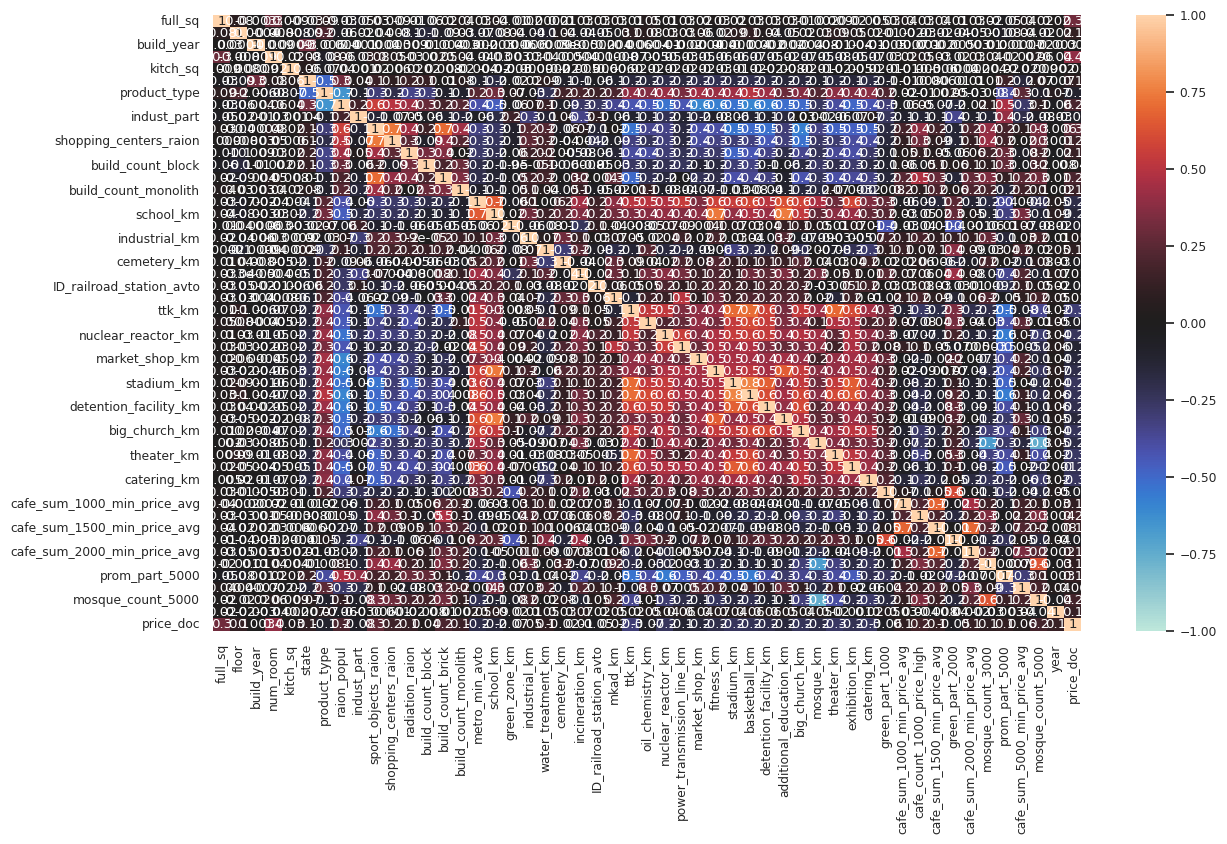

In [ ]:
df_num_data = df._get_numeric_data()  # числовые данные
df_corr = df_num_data.corr()  # коэффициенты корреляции
sns.heatmap(
    df_corr,  # датасет
    annot=True,  # вывод значений в ячейках
    fmt='.1g',  # формат значений
    vmin=-1,  # нижнее значение цветовой гаммы
    vmax=1,  # верхнее значение цветовой гаммы
    center=0,  # среднее значение цветовой гаммы
)



```
# Выбран кодовый формат
```

##🗂️ Разделение выборки для тренировки и теста

In [6]:
# Split the data into train and test
train_data, test_data = train_test_split(df, test_size=0.2, random_state=1)

In [7]:
print("Train set size:",len(train_data))
print("Test set size:",len(test_data))

Train set size: 17063
Test set size: 4266


In [8]:
train_data.describe()

full_sq         floor    build_year      num_room      kitch_sq  \
count  17063.000000  17063.000000  17063.000000  17063.000000  17063.000000   
mean      53.927328      7.638077   1924.914318      1.943328      6.372971   
std       21.936471      5.280166    333.369444      0.701414     26.592567   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%       38.000000      3.000000   1976.000000      2.000000      5.000000   
50%       50.000000      6.500000   1979.000000      2.000000      6.000000   
75%       63.000000     11.000000   1984.000000      2.000000      8.000000   
max      729.000000     44.000000   2017.000000     17.000000   2013.000000   

              state  product_type   raion_popul   indust_part  \
count  17063.000000  17063.000000  17063.000000  17063.000000   
mean       2.059720      0.358847     10.902387      0.118952   
std        0.636858      0.479676      1.152922      0.119282   
min        1.000000      0.000000      7.842279      0.000000   
25%        2.000000      0.000000      9.990536      0.018578   
50%        2.000000      0.000000     11.332626      0.072158   
75%        2.000000      1.000000     11.718817      0.195781   
max        4.000000      1.000000     12.419041      0.521867   

       sport_objects_raion  ...  cafe_count_1000_price_high  \
count         17063.000000  ...                17063.000000   
mean              6.595265  ...                    0.056965   
std               6.522276  ...                    0.316638   
min               0.000000  ...                    0.000000   
25%               1.000000  ...                    0.000000   
50%               5.000000  ...                    0.000000   
75%              10.000000  ...                    0.000000   
max              29.000000  ...                    6.000000   

       cafe_sum_1500_min_price_avg  green_part_2000  \
count                 17063.000000     17063.000000   
mean                      6.534450         2.755784   
std                       0.252520         0.863634   
min                       5.703782        -4.605170   
25%                       6.396930         2.321407   
50%                       6.540034         2.870169   
75%                       6.668863         3.342508   
max                       7.824046         4.321480   

       cafe_sum_2000_min_price_avg  mosque_count_3000  prom_part_5000  \
count                 17063.000000       17063.000000    17063.000000   
mean                      6.545153           0.197035        2.173507   
std                       0.245402           0.445452        0.618731   
min                       5.703782           0.000000       -1.078810   
25%                       6.422240           0.000000        1.803359   
50%                       6.526978           0.000000        2.196113   
75%                       6.659294           0.000000        2.641910   
max                       7.680947           2.000000        3.351307   

       cafe_sum_5000_min_price_avg  mosque_count_5000          year  \
count                 17063.000000       17063.000000  17063.000000   
mean                      6.622877           0.441657   2013.450566   
std                       0.177530           0.607637      0.964073   
min                       5.703782           0.000000   2011.000000   
25%                       6.509216           0.000000   2013.000000   
50%                       6.581665           0.000000   2014.000000   
75%                       6.703654           1.000000   2014.000000   
max                       7.536364           2.000000   2015.000000   

          price_doc  
count  1.706300e+04  
mean   7.145325e+06  
std    4.740813e+06  
min    1.000000e+05  
25%    4.756130e+06  
50%    6.296600e+06  
75%    8.300000e+06  
max    7.880225e+07  

[8 rows x 51 columns]

In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17063 entries, 14966 to 235
Data columns (total 51 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   full_sq                      17063 non-null  int64  
 1   floor                        17063 non-null  float64
 2   build_year                   17063 non-null  float64
 3   num_room                     17063 non-null  float64
 4   kitch_sq                     17063 non-null  float64
 5   state                        17063 non-null  float64
 6   product_type                 17063 non-null  int64  
 7   raion_popul                  17063 non-null  float64
 8   indust_part                  17063 non-null  float64
 9   sport_objects_raion          17063 non-null  int64  
 10  shopping_centers_raion       17063 non-null  int64  
 11  radiation_raion              17063 non-null  int64  
 12  build_count_block            17063 non-null  float64
 13  build_count_br

In [ ]:
train_data.shape

(17063, 51)

##📊 Визуализация данных

KeyboardInterrupt: 

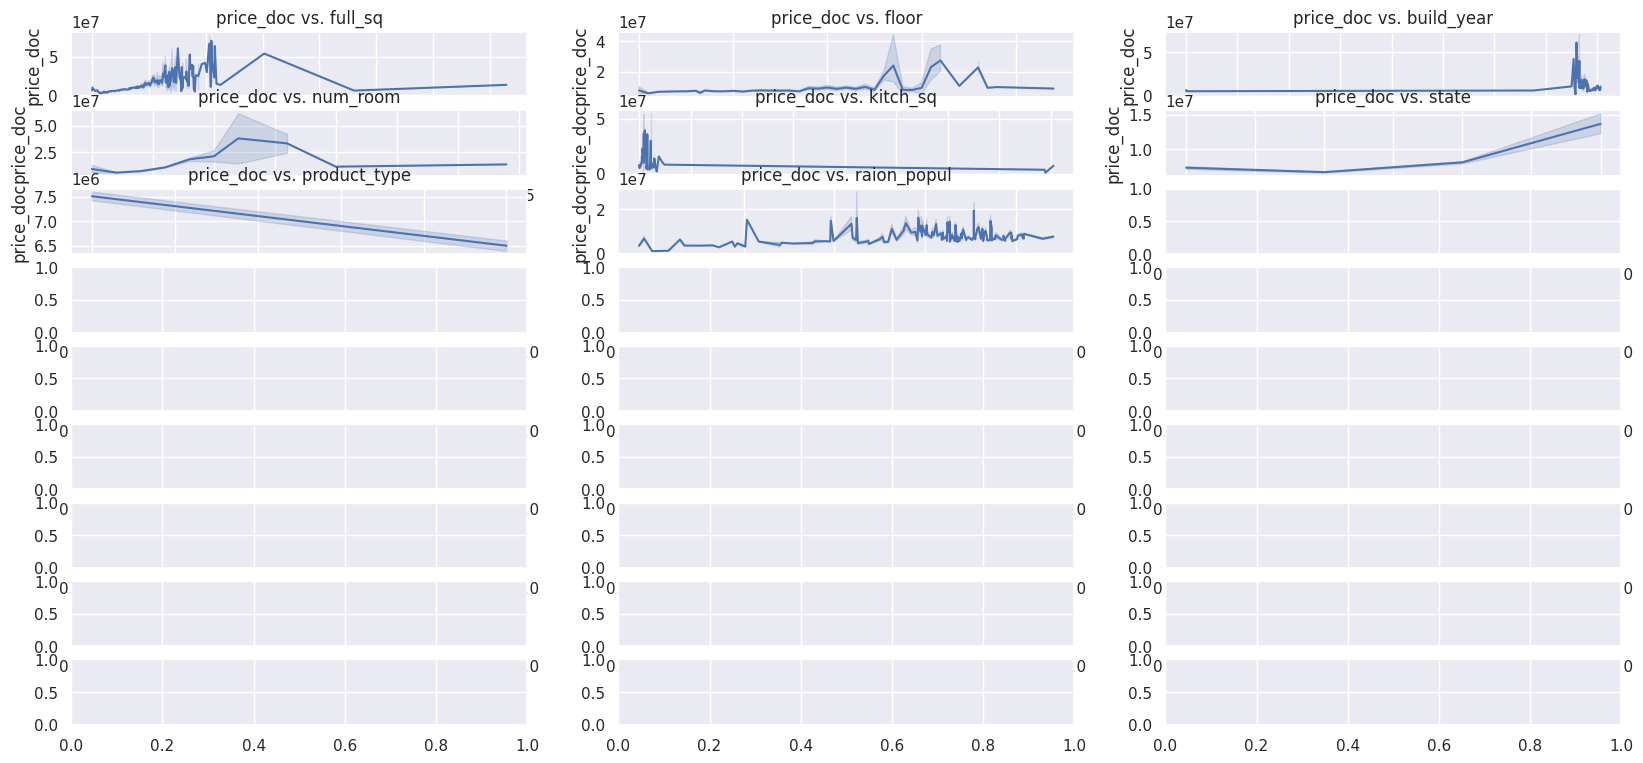

In [ ]:
# First let's visualize the features against the price

fig, ax = plt.subplots(9, 3, figsize=(20, 9))
ax = ax.flatten()

sns.set()
sns.lineplot(data=train_data, x="full_sq", y="price_doc", ax=ax[0])
ax[0].set_title("price_doc vs. full_sq")

sns.lineplot(data=train_data, x="floor", y="price_doc", ax=ax[1])
ax[1].set_title("price_doc vs. floor")

sns.lineplot(data=train_data, x="build_year", y="price_doc", ax=ax[2])
ax[2].set_title("price_doc vs. build_year")

sns.lineplot(data=train_data, x="num_room", y="price_doc", ax=ax[3])
ax[3].set_title("price_doc vs. num_room")

sns.lineplot(data=train_data, x="kitch_sq", y="price_doc", ax=ax[4])
ax[4].set_title("price_doc vs. kitch_sq")

sns.lineplot(data=train_data, x="state", y="price_doc", ax=ax[5])
ax[5].set_title("price_doc vs. state")

sns.lineplot(data=train_data, x="product_type", y="price_doc", ax=ax[6])
ax[6].set_title("price_doc vs. product_type")

sns.lineplot(data=train_data, x="raion_popul", y="price_doc", ax=ax[7])
ax[7].set_title("price_doc vs. raion_popul")

sns.lineplot(data=train_data, x="indust_part", y="price_doc", ax=ax[8])
ax[8].set_title("price_doc vs. indust_part")

sns.lineplot(data=train_data, x="sport_objects_raion", y="price_doc", ax=ax[9])
ax[9].set_title("price_doc vs. sport_objects_raion")

sns.lineplot(data=train_data, x="shopping_centers_raion", y="price_doc", ax=ax[10])
ax[10].set_title("price_doc vs. shopping_centers_raion")

sns.lineplot(data=train_data, x="radiation_raion", y="price_doc", ax=ax[11])
ax[11].set_title("price_doc vs. radiation_raion")

sns.lineplot(data=train_data, x="build_count_block", y="price_doc", ax=ax[12])
ax[12].set_title("price_doc vs. build_count_block")

sns.lineplot(data=train_data, x="build_count_brick", y="price_doc", ax=ax[13])
ax[13].set_title("price_doc vs. build_count_brick")

sns.lineplot(data=train_data, x="build_count_monolith", y="price_doc", ax=ax[14])
ax[14].set_title("price_doc vs. build_count_monolith")

sns.lineplot(data=train_data, x="metro_min_avto", y="price_doc", ax=ax[15])
ax[15].set_title("price_doc vs. metro_min_avto")

sns.lineplot(data=train_data, x="school_km", y="price_doc", ax=ax[16])
ax[16].set_title("price_doc vs. school_km")

sns.lineplot(data=train_data, x="green_zone_km", y="price_doc", ax=ax[17])
ax[17].set_title("price_doc vs. green_zone_km")

sns.lineplot(data=train_data, x="industrial_km", y="price_doc", ax=ax[18])
ax[18].set_title("price_doc vs. industrial_km")

sns.lineplot(data=train_data, x="water_treatment_km", y="price_doc", ax=ax[19])
ax[19].set_title("price_doc vs. water_treatment_km")

sns.lineplot(data=train_data, x="cemetery_km", y="price_doc", ax=ax[20])
ax[20].set_title("price_doc vs. cemetery_km")

sns.lineplot(data=train_data, x="incineration_km", y="price_doc", ax=ax[21])
ax[21].set_title("price_doc vs. incineration_km")

sns.lineplot(data=train_data, x="ID_railroad_station_avto", y="price_doc", ax=ax[22])
ax[22].set_title("price_doc vs. ID_railroad_station_avto")

sns.lineplot(data=train_data, x="mkad_km", y="price_doc", ax=ax[23])
ax[23].set_title("price_doc vs. mkad_km")

sns.lineplot(data=train_data, x="ttk_km", y="price_doc", ax=ax[24])
ax[24].set_title("price_doc vs. ttk_km")

sns.lineplot(data=train_data, x="oil_chemistry_km", y="price_doc", ax=ax[25])
ax[25].set_title("price_doc vs. oil_chemistry_km")

sns.lineplot(data=train_data, x="nuclear_reactor_km", y="price_doc", ax=ax[26])
ax[26].set_title("price_doc vs. nuclear_reactor_km")

# set the spacing between subplots
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=2.9,
                    wspace=0.4,
                    hspace=0.4)
plt.show()

In [ ]:
sns.lineplot(data=train_data, x="power_transmission_line_km", y="price_doc", ax=ax[27])
ax[27].set_title("price_doc vs. power_transmission_line_km")

sns.lineplot(data=train_data, x="market_shop_km", y="price_doc", ax=ax[28])
ax[28].set_title("price_doc vs. market_shop_km")

sns.lineplot(data=train_data, x="fitness_km", y="price_doc", ax=ax[29])
ax[29].set_title("price_doc vs. fitness_km")

sns.lineplot(data=train_data, x="stadium_km", y="price_doc", ax=ax[30])
ax[30].set_title("price_doc vs. stadium_km")

sns.lineplot(data=train_data, x="basketball_km", y="price_doc", ax=ax[31])
ax[31].set_title("price_doc vs. basketball_km")

sns.lineplot(data=train_data, x="detention_facility_km", y="price_doc", ax=ax[32])
ax[32].set_title("price_doc vs. detention_facility_kmm")

sns.lineplot(data=train_data, x="additional_education_km", y="price_doc", ax=ax[33])
ax[33].set_title("price_doc vs. additional_education_km")

sns.lineplot(data=train_data, x="big_church_km", y="price_doc", ax=ax[34])
ax[34].set_title("price_doc vs. big_church_km")

sns.lineplot(data=train_data, x="mosque_km", y="price_doc", ax=ax[35])
ax[35].set_title("price_doc vs. mosque_km")

sns.lineplot(data=train_data, x="theater_km", y="price_doc", ax=ax[36])
ax[36].set_title("price_doc vs. theater_km")

sns.lineplot(data=train_data, x="exhibition_km", y="price_doc", ax=ax[37])
ax[37].set_title("price_doc vs. exhibition_km")

sns.lineplot(data=train_data, x="catering_km", y="price_doc", ax=ax[38])
ax[38].set_title("price_doc vs. catering_km")

sns.lineplot(data=train_data, x="green_part_1000", y="price_doc", ax=ax[39])
ax[39].set_title("price_doc vs. green_part_1000")

sns.lineplot(data=train_data, x="cafe_sum_1000_min_price_avg", y="price_doc", ax=ax[40])
ax[40].set_title("price_doc vs. cafe_sum_1000_min_price_avg")

sns.lineplot(data=train_data, x="cafe_count_1000_price_high", y="price_doc", ax=ax[41])
ax[41].set_title("price_doc vs. cafe_count_1000_price_high")

sns.lineplot(data=train_data, x="cafe_sum_1500_min_price_avg", y="price_doc", ax=ax[42])
ax[42].set_title("price_doc vs. cafe_sum_1500_min_price_avg")

sns.lineplot(data=train_data, x="green_part_2000", y="price_doc", ax=ax[43])
ax[43].set_title("price_doc vs. green_part_2000")

sns.lineplot(data=train_data, x="cafe_sum_2000_min_price_avg", y="price_doc", ax=ax[44])
ax[44].set_title("price_doc vs. cafe_sum_2000_min_price_avg")

sns.lineplot(data=train_data, x="mosque_count_3000", y="price_doc", ax=ax[45])
ax[45].set_title("price_doc vs. mosque_count_3000")

sns.lineplot(data=train_data, x="prom_part_5000", y="price_doc", ax=ax[46])
ax[46].set_title("price_doc vs. prom_part_5000")

sns.lineplot(data=train_data, x="cafe_sum_5000_min_price_avg", y="price_doc", ax=ax[47])
ax[47].set_title("price_doc vs. cafe_sum_5000_min_price_avg")

sns.lineplot(data=train_data, x="mosque_count_5000", y="price_doc", ax=ax[48])
ax[48].set_title("price_doc vs. mosque_count_5000")

sns.lineplot(data=train_data, x="year", y="price_doc", ax=ax[49])
ax[49].set_title("price_doc vs. year")

# set the spacing between subplots
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=2.9,
                    wspace=0.4,
                    hspace=0.4)
plt.show()

IndexError: index 28 is out of bounds for axis 0 with size 27

## 😂 Начало веселья

In [9]:
df.price_doc.describe()

count    2.132900e+04
mean     7.117599e+06
std      4.706342e+06
min      1.000000e+05
25%      4.745995e+06
50%      6.255454e+06
75%      8.300000e+06
max      8.077744e+07
Name: price_doc, dtype: float64

KeyboardInterrupt: 

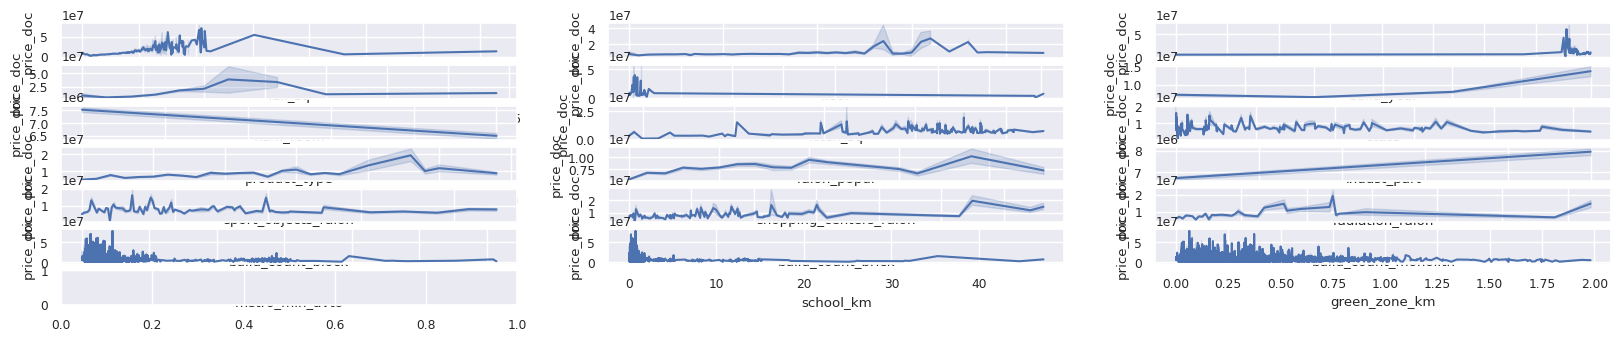

In [ ]:
fig = plt.figure(figsize=(20,9))
for index,col in enumerate(train_data):
    plt.subplot(17,3,index+1)
    sns.lineplot(train_data.dropna(), x=col, y="price_doc");
fig.tight_layout(pad=1.0)

plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=2.9,
                    wspace=0.4,
                    hspace=0.4)
plt.show()

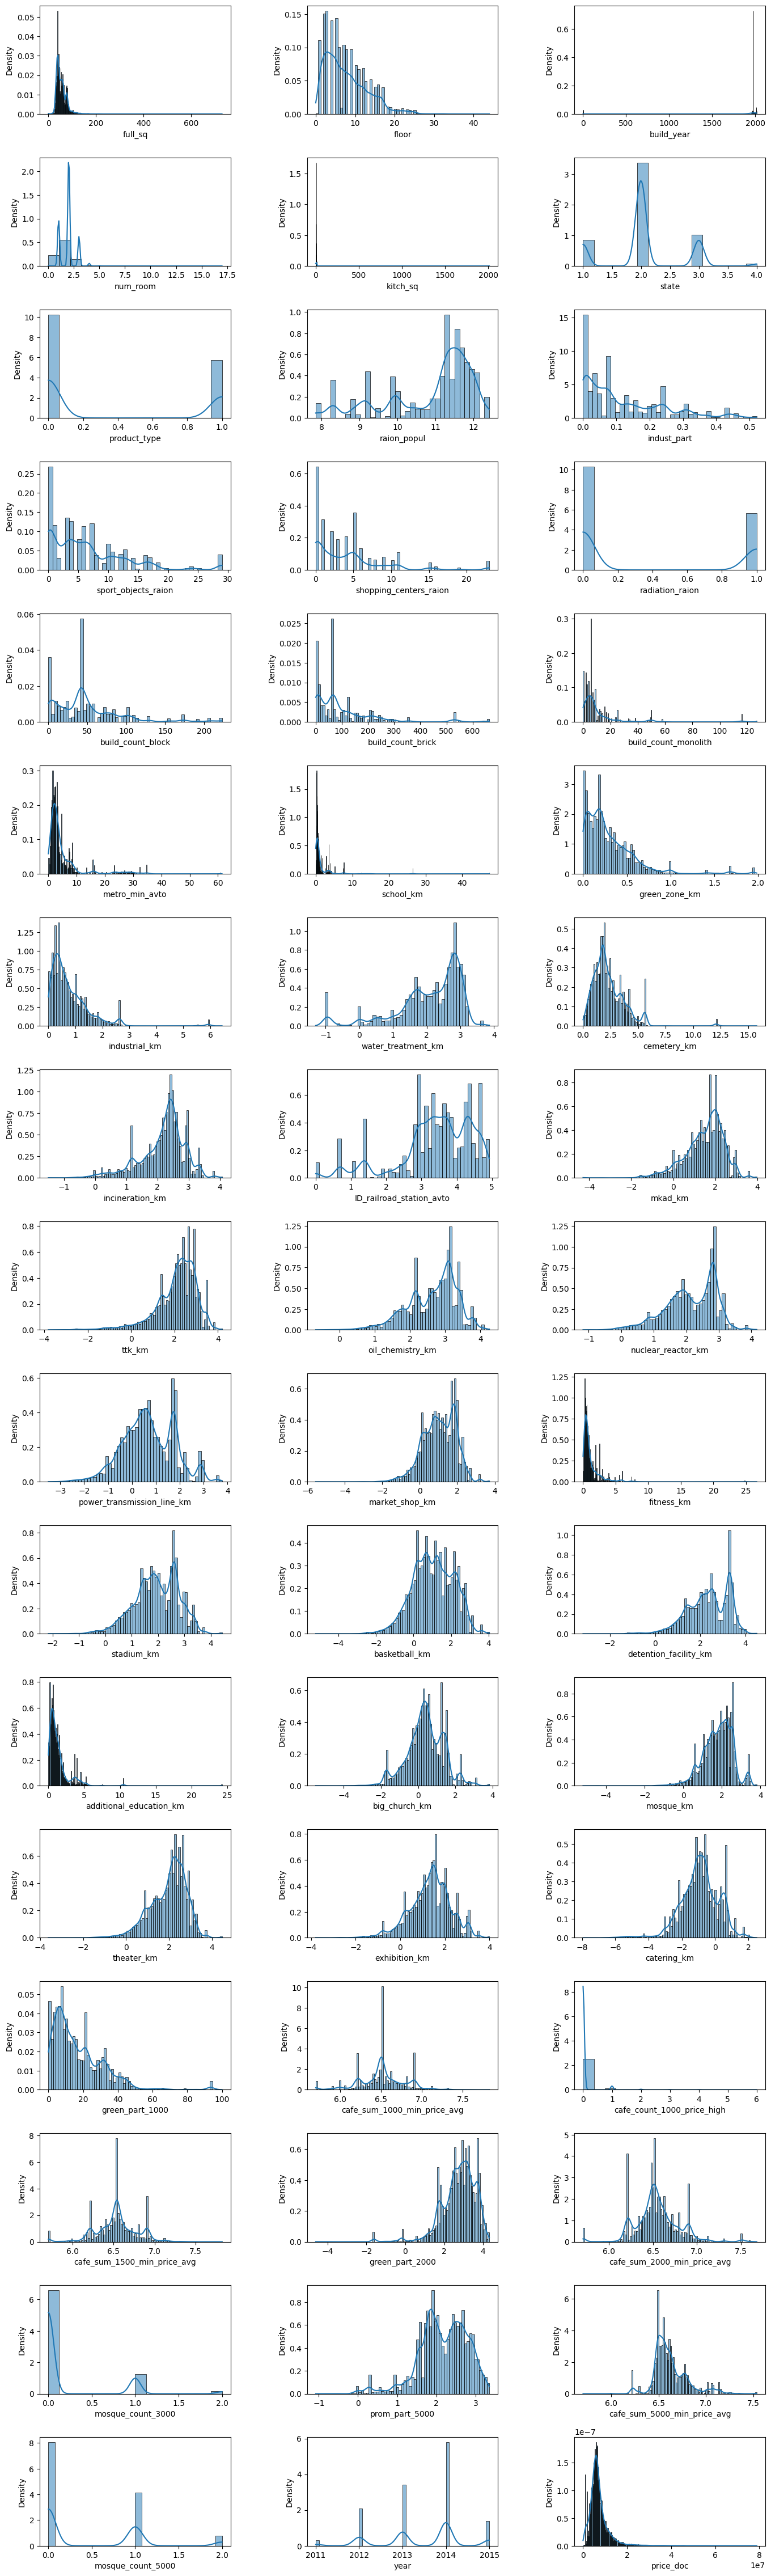

In [ ]:
# Let's take a look at the outliers
# Histograms
fig = plt.figure(figsize=(16,16))
for index,col in enumerate(train_data):
    plt.subplot(17,3,index+1)
    sns.histplot(train_data.loc[:,col].dropna(), kde=True, stat="density", linewidth=0.5);
fig.tight_layout(pad=1.0);

plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=2.9,
                    wspace=0.4,
                    hspace=0.4)
plt.show()

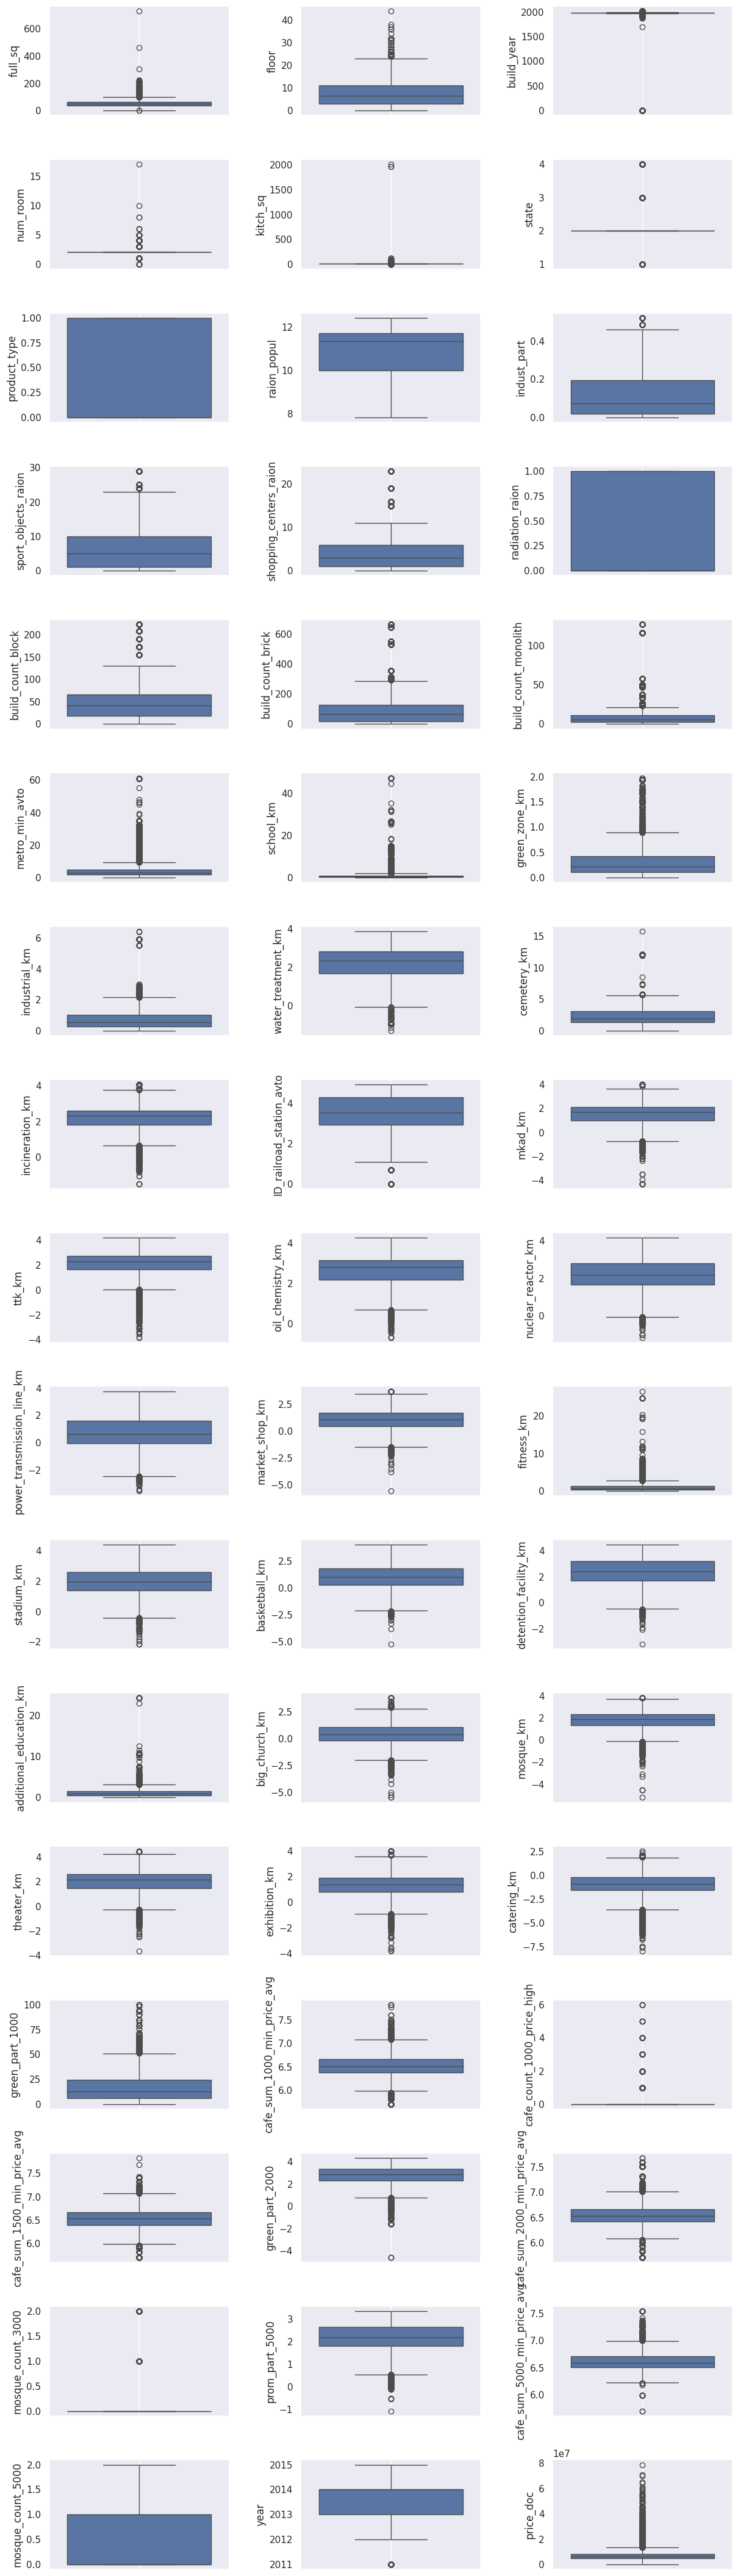

In [ ]:
# Check outliers
# Boxplot
fig = plt.figure(figsize=(14,15))
for index,col in enumerate(train_data):
    plt.subplot(17,3,index+1)
    sns.boxplot(y=col, data=train_data.dropna())
    plt.grid()
fig.tight_layout(pad=1.0)

plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=2.9,
                    wspace=0.4,
                    hspace=0.4)
plt.show()

In [10]:
test_data = df[['full_sq', 'kitch_sq','product_type','indust_part','radiation_raion','metro_min_avto','school_km','green_zone_km','mkad_km','market_shop_km','fitness_km','additional_education_km','big_church_km','green_part_1000','cafe_sum_1000_min_price_avg','cafe_sum_1500_min_price_avg','cafe_sum_2000_min_price_avg','mosque_count_3000','mosque_count_5000', 'price_doc' ]]
# test_data = df[['full_sq', 'kitch_sq','product_type','indust_part','radiation_raion','metro_min_avto','school_km','green_zone_km','cemetery_km','mkad_km','market_shop_km','fitness_km','additional_education_km','big_church_km','green_part_1000','cafe_sum_1000_min_price_avg','cafe_sum_1500_min_price_avg','cafe_sum_2000_min_price_avg','mosque_count_3000','mosque_count_5000', 'price_doc' ]]
test_data.info()


<class 'pandas.core.frame.DataFrame'>
Index: 21329 entries, 0 to 21328
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   full_sq                      21329 non-null  int64  
 1   kitch_sq                     21329 non-null  float64
 2   product_type                 21329 non-null  int64  
 3   indust_part                  21329 non-null  float64
 4   radiation_raion              21329 non-null  int64  
 5   metro_min_avto               21329 non-null  float64
 6   school_km                    21329 non-null  float64
 7   green_zone_km                21329 non-null  float64
 8   mkad_km                      21329 non-null  float64
 9   market_shop_km               21329 non-null  float64
 10  fitness_km                   21329 non-null  float64
 11  additional_education_km      21329 non-null  float64
 12  big_church_km                21329 non-null  float64
 13  green_part_1000      

In [11]:
condition = (test_data['full_sq']>=0)&(test_data['full_sq']<200)

n = test_data.loc[condition, 'full_sq']

test_data.full_sq.describe()

count    21329.000000
mean        54.088799
std         42.559522
min          0.000000
25%         38.000000
50%         49.000000
75%         63.000000
max       5326.000000
Name: full_sq, dtype: float64

In [12]:
df.price_doc.describe().apply(lambda x: format(x, 'f'))

count       21329.000000
mean      7117599.307516
std       4706342.297460
min        100000.000000
25%       4745995.000000
50%       6255454.000000
75%       8300000.000000
max      80777440.000000
Name: price_doc, dtype: object

In [13]:
test_data = test_data[(test_data['full_sq'] > 0) & (test_data['full_sq'] < 100)]
test_data = test_data[(test_data['kitch_sq'] < 15)&(test_data['kitch_sq'] >= 0)]
test_data = test_data[test_data['indust_part'] < .4]
test_data = test_data[test_data['metro_min_avto'] < 5]
test_data = test_data[test_data['school_km'] < .71]
test_data = test_data[test_data['green_zone_km'] < .5]
# test_data = test_data[test_data['cemetery_km'] < 5]
test_data = test_data[(test_data['mkad_km'] < 4)&(test_data['mkad_km'] > -.5)]
test_data = test_data[(test_data['market_shop_km'] < 2.5)&(test_data['market_shop_km'] >-1.1)]
test_data = test_data[test_data['fitness_km'] < .5]
test_data = test_data[test_data['additional_education_km'] < .5]
test_data = test_data[test_data['big_church_km'].abs() < 2.5]
test_data = test_data[test_data['green_part_1000'] < 33]
test_data = test_data[(test_data['cafe_sum_1000_min_price_avg'] < 7)&(test_data['cafe_sum_1000_min_price_avg'] > 6)]
test_data = test_data[(test_data['cafe_sum_1500_min_price_avg'] < 7)&(test_data['cafe_sum_1500_min_price_avg'] > 6)]
test_data = test_data[(test_data['cafe_sum_2000_min_price_avg'] < 7)&(test_data['cafe_sum_2000_min_price_avg'] > 6)]


In [14]:
test_data['full_sq'].describe()

count    1713.000000
mean       51.582020
std        16.060137
min        13.000000
25%        38.000000
50%        49.000000
75%        62.000000
max        99.000000
Name: full_sq, dtype: float64

###🪝 Получение выборки с ключевыми признаками

In [15]:
# test_data = df[['full_sq', 'kitch_sq','product_type','indust_part','radiation_raion','metro_min_avto','school_km','green_zone_km','market_shop_km','fitness_km','additional_education_km','green_part_1000','cafe_sum_1000_min_price_avg','cafe_sum_1500_min_price_avg','cafe_sum_2000_min_price_avg', 'price_doc' ]]
test_data = df[['full_sq', 'kitch_sq','product_type','indust_part','radiation_raion','metro_min_avto','school_km','green_zone_km','cemetery_km','market_shop_km','fitness_km','additional_education_km','big_church_km','green_part_1000','cafe_sum_1000_min_price_avg','cafe_sum_1500_min_price_avg','cafe_sum_2000_min_price_avg','mosque_count_3000','mosque_count_5000', 'price_doc' ]]
# test_data = df[['full_sq', 'kitch_sq','product_type','indust_part','radiation_raion','metro_min_avto','school_km','green_zone_km','mkad_km','market_shop_km','fitness_km','additional_education_km','big_church_km','green_part_1000','cafe_sum_1000_min_price_avg','cafe_sum_1500_min_price_avg','cafe_sum_2000_min_price_avg','mosque_count_3000','mosque_count_5000', 'price_doc' ]]
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21329 entries, 0 to 21328
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   full_sq                      21329 non-null  int64  
 1   kitch_sq                     21329 non-null  float64
 2   product_type                 21329 non-null  int64  
 3   indust_part                  21329 non-null  float64
 4   radiation_raion              21329 non-null  int64  
 5   metro_min_avto               21329 non-null  float64
 6   school_km                    21329 non-null  float64
 7   green_zone_km                21329 non-null  float64
 8   cemetery_km                  21329 non-null  float64
 9   market_shop_km               21329 non-null  float64
 10  fitness_km                   21329 non-null  float64
 11  additional_education_km      21329 non-null  float64
 12  big_church_km                21329 non-null  float64
 13  green_part_1000      

###🛒 Отбрасывание найденных выбросов

Средняя абсолютная ошибка (MAE): 1890227.78

Среднеквадратичная ошибка (MSE): 7663592182120.70

Корень из среднеквадратичной ошибки (RMSE): 2768319.38

Коэффициент детерминации (R^2): 0.44

In [16]:
test_data = test_data[(test_data['full_sq'] > 0) & (test_data['full_sq'] < 100)]
test_data = test_data[(test_data['kitch_sq'] < 15)&(test_data['kitch_sq'] >= 0)]
test_data = test_data[test_data['indust_part'] < .4]
test_data = test_data[test_data['metro_min_avto'] < 5]
test_data = test_data[test_data['school_km'] < .71]
test_data = test_data[test_data['green_zone_km'] < .5]
test_data = test_data[test_data['cemetery_km'] < 5]
# test_data = test_data[(test_data['mkad_km'] < 4)&(test_data['mkad_km'] > -.5)]
test_data = test_data[(test_data['market_shop_km'] < 2.5)&(test_data['market_shop_km'] >-1.1)]
test_data = test_data[test_data['fitness_km'] < .5]
test_data = test_data[test_data['additional_education_km'] < .5]
test_data = test_data[test_data['big_church_km'].abs() < 2.5]
test_data = test_data[test_data['green_part_1000'] < 33]
test_data = test_data[(test_data['cafe_sum_1000_min_price_avg'] < 7)&(test_data['cafe_sum_1000_min_price_avg'] > 6)]
test_data = test_data[(test_data['cafe_sum_1500_min_price_avg'] < 7)&(test_data['cafe_sum_1500_min_price_avg'] > 6)]
test_data = test_data[(test_data['cafe_sum_2000_min_price_avg'] < 7)&(test_data['cafe_sum_2000_min_price_avg'] > 6)]

###⚖️ Приравнивание медиане найденных выбросов


Средняя абсолютная ошибка (MAE): 2177534.51

Среднеквадратичная ошибка (MSE): 16529018740922.04

Корень из среднеквадратичной ошибки (RMSE): 4065589.59

Коэффициент детерминации (R^2): 0.24

In [17]:
test_data.loc[~((test_data['full_sq'] > 0)&(test_data['full_sq'] < 100)),'full_sq'] = test_data.loc[(test_data['full_sq'] > 0) & (test_data['full_sq'] < 100),'full_sq' ].median()

test_data.loc[~((test_data['kitch_sq'] < 15)&(test_data['kitch_sq'] >= 0)),'kitch_sq'] = test_data.loc[(test_data['kitch_sq'] < 15)&(test_data['kitch_sq'] >= 0),'kitch_sq'].median()

test_data.loc[~(test_data['indust_part'] < .4),'indust_part'] = test_data.loc[(test_data['indust_part'] < .4),'indust_part'].median()

test_data.loc[~(test_data['metro_min_avto'] < 5),'metro_min_avto'] = test_data.loc[(test_data['metro_min_avto'] < 5),'metro_min_avto'].median()

test_data.loc[~(test_data['school_km'] < .71),'school_km'] = test_data.loc[(test_data['school_km'] < .71),'school_km'].median()

test_data.loc[~(test_data['green_zone_km'] < .5),'green_zone_km'] = test_data.loc[(test_data['green_zone_km'] < .5),'green_zone_km'].median()

test_data.loc[~(test_data['cemetery_km'] < 5),'cemetery_km'] = test_data.loc[(test_data['cemetery_km'] < 5),'cemetery_km'].median()

# test_data.loc[~((test_data['mkad_km'] < 4)&(test_data['mkad_km'] > -.5)),'mkad_km'] = test_data.loc[((test_data['mkad_km'] < 4)&(test_data['mkad_km'] > -.5)),'mkad_km'].median()

test_data.loc[~((test_data['market_shop_km'] < 2.5)&(test_data['market_shop_km'] >-1.1)),'market_shop_km'] = test_data.loc[((test_data['market_shop_km'] < 2.5)&(test_data['market_shop_km'] >-1.1)),'market_shop_km'].median()

test_data.loc[~(test_data['fitness_km'] < .5),'fitness_km'] = test_data.loc[(test_data['fitness_km'] < .5),'fitness_km'].median()

test_data.loc[~(test_data['additional_education_km'] < .5),'additional_education_km'] = test_data.loc[(test_data['additional_education_km'] < .5),'additional_education_km'].median()

test_data.loc[~(test_data['big_church_km'].abs() < 2.5),'big_church_km'] = test_data.loc[(test_data['big_church_km'].abs() < 2.5),'big_church_km'].median()

test_data.loc[~(test_data['green_part_1000'] < 33),'green_part_1000'] = test_data.loc[(test_data['green_part_1000'] < 33),'green_part_1000'].median()

test_data.loc[~((test_data['cafe_sum_1000_min_price_avg'] < 7)&(test_data['cafe_sum_1000_min_price_avg'] > 6)),'cafe_sum_1000_min_price_avg'] = test_data.loc[((test_data['cafe_sum_1000_min_price_avg'] < 7)&(test_data['cafe_sum_1000_min_price_avg'] > 6)),'cafe_sum_1000_min_price_avg'].median()

test_data.loc[~((test_data['cafe_sum_1500_min_price_avg'] < 7)&(test_data['cafe_sum_1500_min_price_avg'] > 6)),'cafe_sum_1500_min_price_avg'] = test_data.loc[((test_data['cafe_sum_1500_min_price_avg'] < 7)&(test_data['cafe_sum_1500_min_price_avg'] > 6)),'cafe_sum_1500_min_price_avg'].median()

test_data.loc[~((test_data['cafe_sum_2000_min_price_avg'] < 7)&(test_data['cafe_sum_2000_min_price_avg'] > 6)),'cafe_sum_2000_min_price_avg'] = test_data.loc[((test_data['cafe_sum_2000_min_price_avg'] < 7)&(test_data['cafe_sum_2000_min_price_avg'] > 6)),'cafe_sum_2000_min_price_avg'].median()


###📏 Приравнивание среднему значению найденных выбросов


Средняя абсолютная ошибка (MAE): 2167381.97

Среднеквадратичная ошибка (MSE): 16239264769845.89

Корень из среднеквадратичной ошибки (RMSE): 4029797.11

Коэффициент детерминации (R^2): 0.26

In [18]:
test_data.loc[~((test_data['full_sq'] > 0)&(test_data['full_sq'] < 100)),'full_sq'] = test_data.loc[(test_data['full_sq'] > 0) & (test_data['full_sq'] < 100),'full_sq' ].mean()

test_data.loc[~((test_data['kitch_sq'] < 15)&(test_data['kitch_sq'] >= 0)),'kitch_sq'] = test_data.loc[(test_data['kitch_sq'] < 15)&(test_data['kitch_sq'] >= 0),'kitch_sq'].mean()

test_data.loc[~(test_data['indust_part'] < .4),'indust_part'] = test_data.loc[(test_data['indust_part'] < .4),'indust_part'].mean()

test_data.loc[~(test_data['metro_min_avto'] < 5),'metro_min_avto'] = test_data.loc[(test_data['metro_min_avto'] < 5),'metro_min_avto'].mean()

test_data.loc[~(test_data['school_km'] < .71),'school_km'] = test_data.loc[(test_data['school_km'] < .71),'school_km'].mean()

test_data.loc[~(test_data['green_zone_km'] < .5),'green_zone_km'] = test_data.loc[(test_data['green_zone_km'] < .5),'green_zone_km'].mean()

test_data.loc[~(test_data['cemetery_km'] < 5),'cemetery_km'] = test_data.loc[(test_data['cemetery_km'] < 5),'cemetery_km'].mean()

# test_data.loc[~((test_data['mkad_km'] < 4)&(test_data['mkad_km'] > -.5)),'mkad_km'] = test_data.loc[((test_data['mkad_km'] < 4)&(test_data['mkad_km'] > -.5)),'mkad_km'].mean()

test_data.loc[~((test_data['market_shop_km'] < 2.5)&(test_data['market_shop_km'] >-1.1)),'market_shop_km'] = test_data.loc[((test_data['market_shop_km'] < 2.5)&(test_data['market_shop_km'] >-1.1)),'market_shop_km'].mean()

test_data.loc[~(test_data['fitness_km'] < .5),'fitness_km'] = test_data.loc[(test_data['fitness_km'] < .5),'fitness_km'].mean()

test_data.loc[~(test_data['additional_education_km'] < .5),'additional_education_km'] = test_data.loc[(test_data['additional_education_km'] < .5),'additional_education_km'].mean()

test_data.loc[~(test_data['big_church_km'].abs() < 2.5),'big_church_km'] = test_data.loc[(test_data['big_church_km'].abs() < 2.5),'big_church_km'].mean()

test_data.loc[~(test_data['green_part_1000'] < 33),'green_part_1000'] = test_data.loc[(test_data['green_part_1000'] < 33),'green_part_1000'].mean()

test_data.loc[~((test_data['cafe_sum_1000_min_price_avg'] < 7)&(test_data['cafe_sum_1000_min_price_avg'] > 6)),'cafe_sum_1000_min_price_avg'] = test_data.loc[((test_data['cafe_sum_1000_min_price_avg'] < 7)&(test_data['cafe_sum_1000_min_price_avg'] > 6)),'cafe_sum_1000_min_price_avg'].mean()

test_data.loc[~((test_data['cafe_sum_1500_min_price_avg'] < 7)&(test_data['cafe_sum_1500_min_price_avg'] > 6)),'cafe_sum_1500_min_price_avg'] = test_data.loc[((test_data['cafe_sum_1500_min_price_avg'] < 7)&(test_data['cafe_sum_1500_min_price_avg'] > 6)),'cafe_sum_1500_min_price_avg'].mean()

test_data.loc[~((test_data['cafe_sum_2000_min_price_avg'] < 7)&(test_data['cafe_sum_2000_min_price_avg'] > 6)),'cafe_sum_2000_min_price_avg'] = test_data.loc[((test_data['cafe_sum_2000_min_price_avg'] < 7)&(test_data['cafe_sum_2000_min_price_avg'] > 6)),'cafe_sum_2000_min_price_avg'].mean()


###📐 Приравнивание стандартному отклонению значение найденных выбросов

Средняя абсолютная ошибка (MAE): 2374969.52

Среднеквадратичная ошибка (MSE): 19020678681735.27

Корень из среднеквадратичной ошибки (RMSE): 4361270.31

Коэффициент детерминации (R^2): 0.13

In [19]:
test_data.loc[~((test_data['full_sq'] > 0)&(test_data['full_sq'] < 100)),'full_sq'] = test_data.loc[(test_data['full_sq'] > 0) & (test_data['full_sq'] < 100),'full_sq' ].std()

test_data.loc[~((test_data['kitch_sq'] < 15)&(test_data['kitch_sq'] >= 0)),'kitch_sq'] = test_data.loc[(test_data['kitch_sq'] < 15)&(test_data['kitch_sq'] >= 0),'kitch_sq'].std()

test_data.loc[~(test_data['indust_part'] < .4),'indust_part'] = test_data.loc[(test_data['indust_part'] < .4),'indust_part'].std()

test_data.loc[~(test_data['metro_min_avto'] < 5),'metro_min_avto'] = test_data.loc[(test_data['metro_min_avto'] < 5),'metro_min_avto'].std()

test_data.loc[~(test_data['school_km'] < .71),'school_km'] = test_data.loc[(test_data['school_km'] < .71),'school_km'].std()

test_data.loc[~(test_data['green_zone_km'] < .5),'green_zone_km'] = test_data.loc[(test_data['green_zone_km'] < .5),'green_zone_km'].std()

test_data.loc[~(test_data['cemetery_km'] < 5),'cemetery_km'] = test_data.loc[(test_data['cemetery_km'] < 5),'cemetery_km'].std()

# test_data.loc[~((test_data['mkad_km'] < 4)&(test_data['mkad_km'] > -.5)),'mkad_km'] = test_data.loc[((test_data['mkad_km'] < 4)&(test_data['mkad_km'] > -.5)),'mkad_km'].std()

test_data.loc[~((test_data['market_shop_km'] < 2.5)&(test_data['market_shop_km'] >-1.1)),'market_shop_km'] = test_data.loc[((test_data['market_shop_km'] < 2.5)&(test_data['market_shop_km'] >-1.1)),'market_shop_km'].std()

test_data.loc[~(test_data['fitness_km'] < .5),'fitness_km'] = test_data.loc[(test_data['fitness_km'] < .5),'fitness_km'].std()

test_data.loc[~(test_data['additional_education_km'] < .5),'additional_education_km'] = test_data.loc[(test_data['additional_education_km'] < .5),'additional_education_km'].std()

test_data.loc[~(test_data['big_church_km'].abs() < 2.5),'big_church_km'] = test_data.loc[(test_data['big_church_km'].abs() < 2.5),'big_church_km'].std()

test_data.loc[~(test_data['green_part_1000'] < 33),'green_part_1000'] = test_data.loc[(test_data['green_part_1000'] < 33),'green_part_1000'].std()

test_data.loc[~((test_data['cafe_sum_1000_min_price_avg'] < 7)&(test_data['cafe_sum_1000_min_price_avg'] > 6)),'cafe_sum_1000_min_price_avg'] = test_data.loc[((test_data['cafe_sum_1000_min_price_avg'] < 7)&(test_data['cafe_sum_1000_min_price_avg'] > 6)),'cafe_sum_1000_min_price_avg'].std()

test_data.loc[~((test_data['cafe_sum_1500_min_price_avg'] < 7)&(test_data['cafe_sum_1500_min_price_avg'] > 6)),'cafe_sum_1500_min_price_avg'] = test_data.loc[((test_data['cafe_sum_1500_min_price_avg'] < 7)&(test_data['cafe_sum_1500_min_price_avg'] > 6)),'cafe_sum_1500_min_price_avg'].std()

test_data.loc[~((test_data['cafe_sum_2000_min_price_avg'] < 7)&(test_data['cafe_sum_2000_min_price_avg'] > 6)),'cafe_sum_2000_min_price_avg'] = test_data.loc[((test_data['cafe_sum_2000_min_price_avg'] < 7)&(test_data['cafe_sum_2000_min_price_avg'] > 6)),'cafe_sum_2000_min_price_avg'].std()


###🔩 Приравнивание дисперсии значение найденных выбросов

Средняя абсолютная ошибка (MAE): 2140302.40

Среднеквадратичная ошибка (MSE): 13160136737173.20

Корень из среднеквадратичной ошибки (RMSE): 3627690.28

Коэффициент детерминации (R^2): 0.40

In [20]:
test_data.loc[~((test_data['full_sq'] > 0)&(test_data['full_sq'] < 100)),'full_sq'] = test_data.loc[(test_data['full_sq'] > 0) & (test_data['full_sq'] < 100),'full_sq' ].var()

test_data.loc[~((test_data['kitch_sq'] < 15)&(test_data['kitch_sq'] >= 0)),'kitch_sq'] = test_data.loc[(test_data['kitch_sq'] < 15)&(test_data['kitch_sq'] >= 0),'kitch_sq'].var()

test_data.loc[~(test_data['indust_part'] < .4),'indust_part'] = test_data.loc[(test_data['indust_part'] < .4),'indust_part'].var()

test_data.loc[~(test_data['metro_min_avto'] < 5),'metro_min_avto'] = test_data.loc[(test_data['metro_min_avto'] < 5),'metro_min_avto'].var()

test_data.loc[~(test_data['school_km'] < .71),'school_km'] = test_data.loc[(test_data['school_km'] < .71),'school_km'].var()

test_data.loc[~(test_data['green_zone_km'] < .5),'green_zone_km'] = test_data.loc[(test_data['green_zone_km'] < .5),'green_zone_km'].var()

test_data.loc[~(test_data['cemetery_km'] < 5),'cemetery_km'] = test_data.loc[(test_data['cemetery_km'] < 5),'cemetery_km'].var()

# test_data.loc[~((test_data['mkad_km'] < 4)&(test_data['mkad_km'] > -.5)),'mkad_km'] = test_data.loc[((test_data['mkad_km'] < 4)&(test_data['mkad_km'] > -.5)),'mkad_km'].var()

test_data.loc[~((test_data['market_shop_km'] < 2.5)&(test_data['market_shop_km'] >-1.1)),'market_shop_km'] = test_data.loc[((test_data['market_shop_km'] < 2.5)&(test_data['market_shop_km'] >-1.1)),'market_shop_km'].var()

test_data.loc[~(test_data['fitness_km'] < .5),'fitness_km'] = test_data.loc[(test_data['fitness_km'] < .5),'fitness_km'].var()

test_data.loc[~(test_data['additional_education_km'] < .5),'additional_education_km'] = test_data.loc[(test_data['additional_education_km'] < .5),'additional_education_km'].var()

test_data.loc[~(test_data['big_church_km'].abs() < 2.5),'big_church_km'] = test_data.loc[(test_data['big_church_km'].abs() < 2.5),'big_church_km'].var()

test_data.loc[~(test_data['green_part_1000'] < 33),'green_part_1000'] = test_data.loc[(test_data['green_part_1000'] < 33),'green_part_1000'].var()

test_data.loc[~((test_data['cafe_sum_1000_min_price_avg'] < 7)&(test_data['cafe_sum_1000_min_price_avg'] > 6)),'cafe_sum_1000_min_price_avg'] = test_data.loc[((test_data['cafe_sum_1000_min_price_avg'] < 7)&(test_data['cafe_sum_1000_min_price_avg'] > 6)),'cafe_sum_1000_min_price_avg'].var()

test_data.loc[~((test_data['cafe_sum_1500_min_price_avg'] < 7)&(test_data['cafe_sum_1500_min_price_avg'] > 6)),'cafe_sum_1500_min_price_avg'] = test_data.loc[((test_data['cafe_sum_1500_min_price_avg'] < 7)&(test_data['cafe_sum_1500_min_price_avg'] > 6)),'cafe_sum_1500_min_price_avg'].var()

test_data.loc[~((test_data['cafe_sum_2000_min_price_avg'] < 7)&(test_data['cafe_sum_2000_min_price_avg'] > 6)),'cafe_sum_2000_min_price_avg'] = test_data.loc[((test_data['cafe_sum_2000_min_price_avg'] < 7)&(test_data['cafe_sum_2000_min_price_avg'] > 6)),'cafe_sum_2000_min_price_avg'].var()


###🎰 Создание дополнительных признаков

In [ ]:
test_data['mosque_count'] = (test_data['mosque_count_3000'] + test_data['mosque_count_5000'])/2.0
test_data['cafe_sum_price_avg'] = (test_data['cafe_sum_1000_min_price_avg'] + test_data['cafe_sum_1500_min_price_avg'] + test_data['cafe_sum_2000_min_price_avg'])/3.0


test_data.drop(columns = ['cafe_sum_1000_min_price_avg', 'cafe_sum_1500_min_price_avg','cafe_sum_2000_min_price_avg', 'mosque_count_3000', 'mosque_count_5000'], inplace = True)
# test_data.drop(columns = ['cafe_sum_1000_min_price_avg', 'cafe_sum_1500_min_price_avg','cafe_sum_2000_min_price_avg'], inplace = True)

test_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1727 entries, 5 to 21320
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   full_sq                  1727 non-null   float64
 1   kitch_sq                 1727 non-null   float64
 2   product_type             1727 non-null   int64  
 3   indust_part              1727 non-null   float64
 4   radiation_raion          1727 non-null   int64  
 5   metro_min_avto           1727 non-null   float64
 6   school_km                1727 non-null   float64
 7   green_zone_km            1727 non-null   float64
 8   cemetery_km              1727 non-null   float64
 9   market_shop_km           1727 non-null   float64
 10  fitness_km               1727 non-null   float64
 11  additional_education_km  1727 non-null   float64
 12  big_church_km            1727 non-null   float64
 13  green_part_1000          1727 non-null   float64
 14  price_doc                172

In [ ]:
test_data['cafe_sum_price_avg'].describe()

count    1727.000000
mean        6.593406
std         0.162261
min         6.156982
25%         6.479074
50%         6.589568
75%         6.789232
max         6.907755
Name: cafe_sum_price_avg, dtype: float64

In [ ]:
test_data['kitch_sq_ration'] = test_data['kitch_sq'] / test_data['full_sq']


test_data.drop(columns = ['kitch_sq', 'full_sq'], inplace = True)

test_data.info()


<class 'pandas.core.frame.DataFrame'>
Index: 1727 entries, 5 to 21320
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   product_type             1727 non-null   int64  
 1   indust_part              1727 non-null   float64
 2   radiation_raion          1727 non-null   int64  
 3   metro_min_avto           1727 non-null   float64
 4   school_km                1727 non-null   float64
 5   green_zone_km            1727 non-null   float64
 6   cemetery_km              1727 non-null   float64
 7   market_shop_km           1727 non-null   float64
 8   fitness_km               1727 non-null   float64
 9   additional_education_km  1727 non-null   float64
 10  big_church_km            1727 non-null   float64
 11  green_part_1000          1727 non-null   float64
 12  price_doc                1727 non-null   int64  
 13  mosque_count             1727 non-null   float64
 14  cafe_sum_price_avg       172

KeyboardInterrupt: 

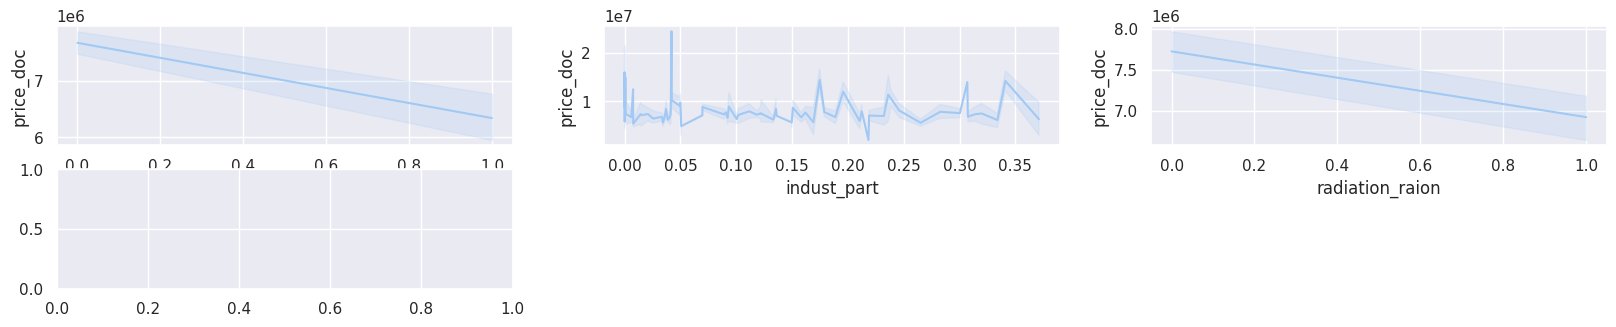

In [ ]:
fig = plt.figure(figsize=(20,9))
for index,col in enumerate(test_data):
    plt.subplot(5,3,index+1)
    sns.lineplot(test_data, x=col, y="price_doc");
fig.tight_layout(pad=1.0)

plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=2.9,
                    wspace=0.4,
                    hspace=0.4)
plt.show()

In [ ]:
test_data.mosque_count.describe()


AttributeError: 'DataFrame' object has no attribute 'mosque_count'

In [ ]:
test_data.mosque_count.std()

0.7779719153672411

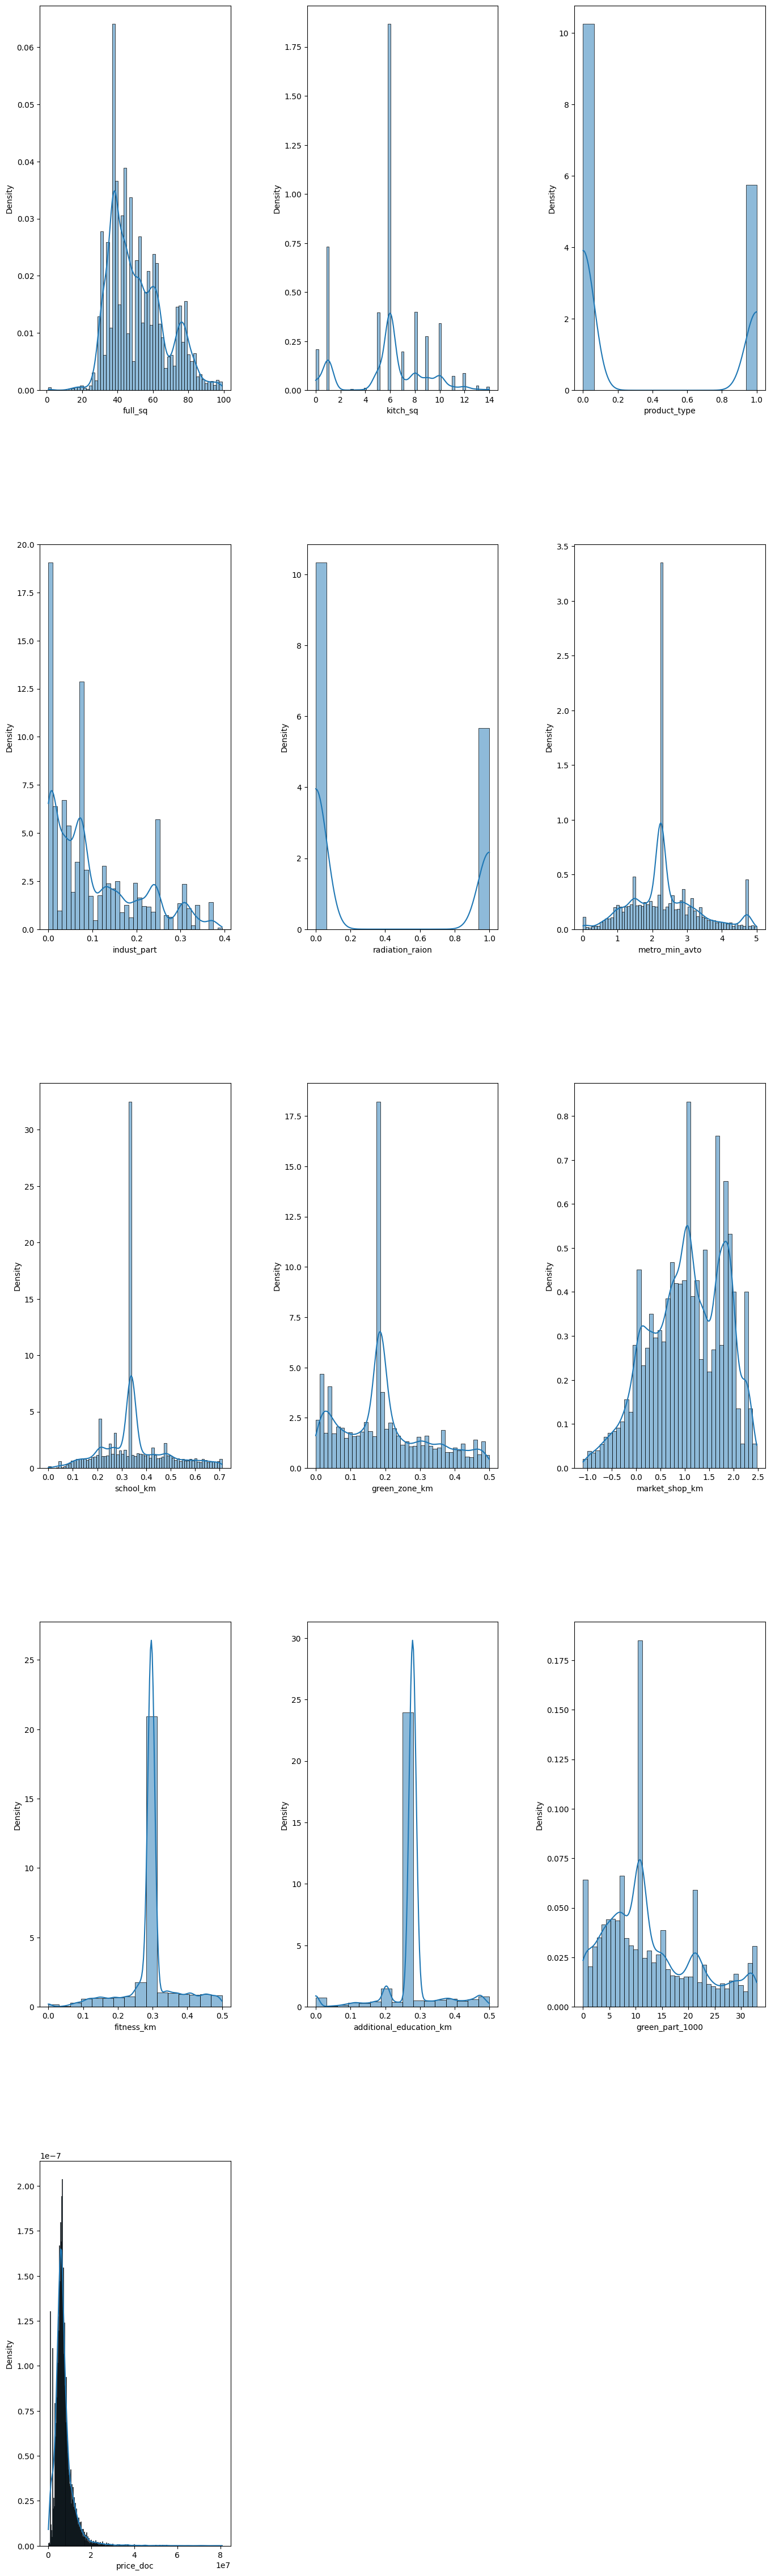

In [ ]:
fig = plt.figure(figsize=(16,16))
for index,col in enumerate(test_data):
    plt.subplot(5,3,index+1)
    sns.histplot(test_data.loc[:,col], kde=True, stat="density", linewidth=0.5);
fig.tight_layout(pad=1.0);

plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=2.9,
                    wspace=0.4,
                    hspace=0.4)
plt.show()

KeyboardInterrupt: 

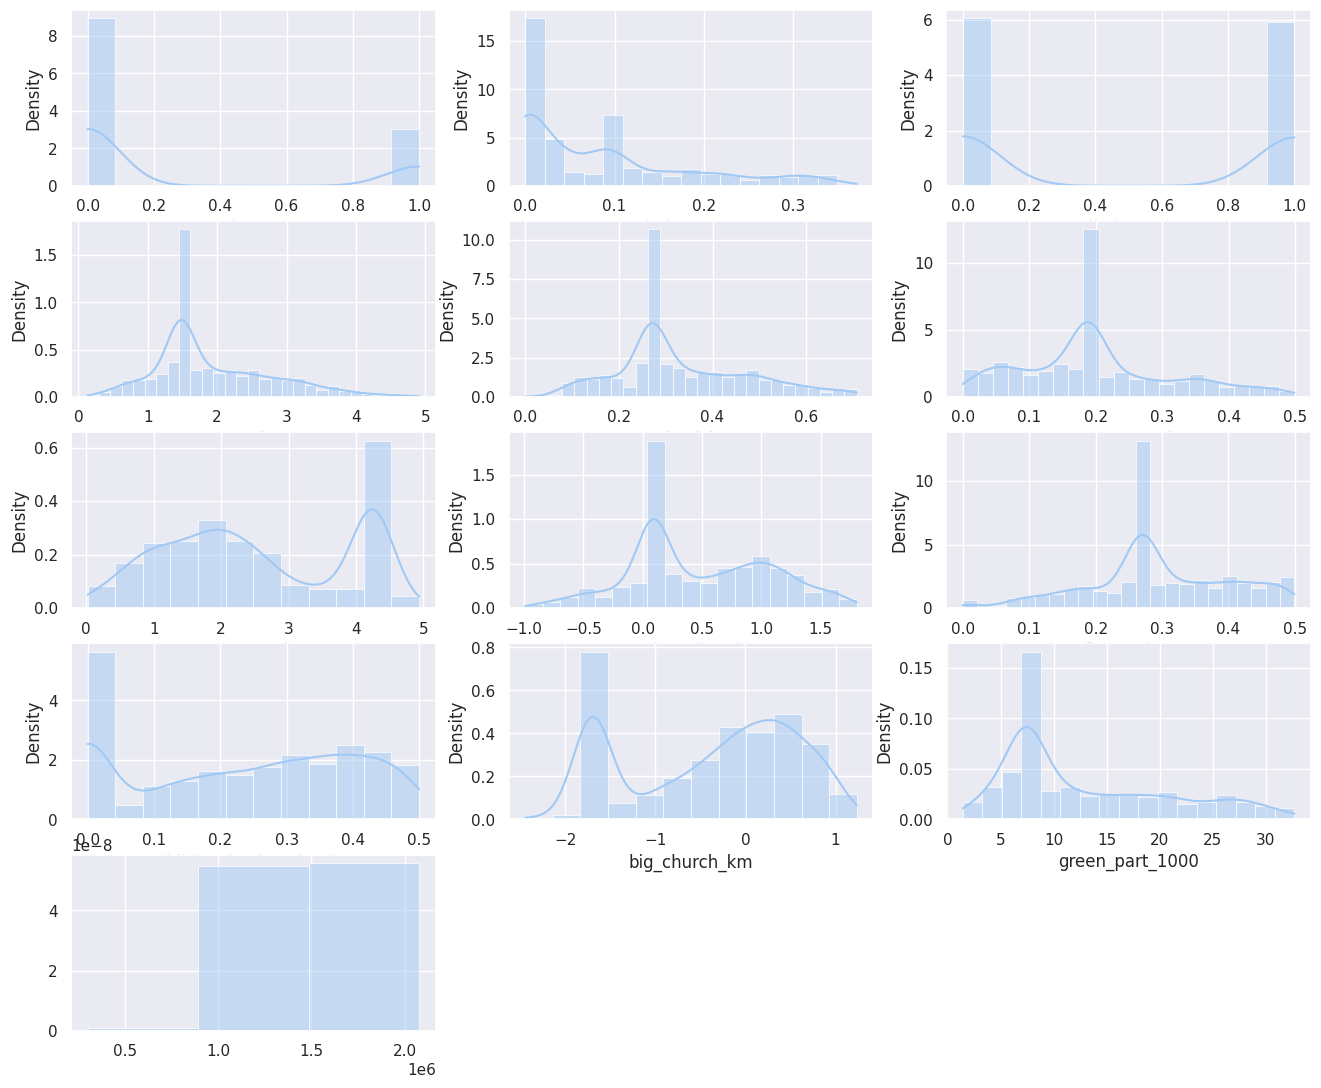

In [ ]:
fig = plt.figure(figsize=(16,16))
for index,col in enumerate(test_data):
    plt.subplot(6,3,index+1)
    sns.histplot(test_data.loc[:,col], kde=True, stat="density", linewidth=0.5);
fig.tight_layout(pad=1.0);

plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=2.9,
                    wspace=0.4,
                    hspace=0.4)
plt.show()

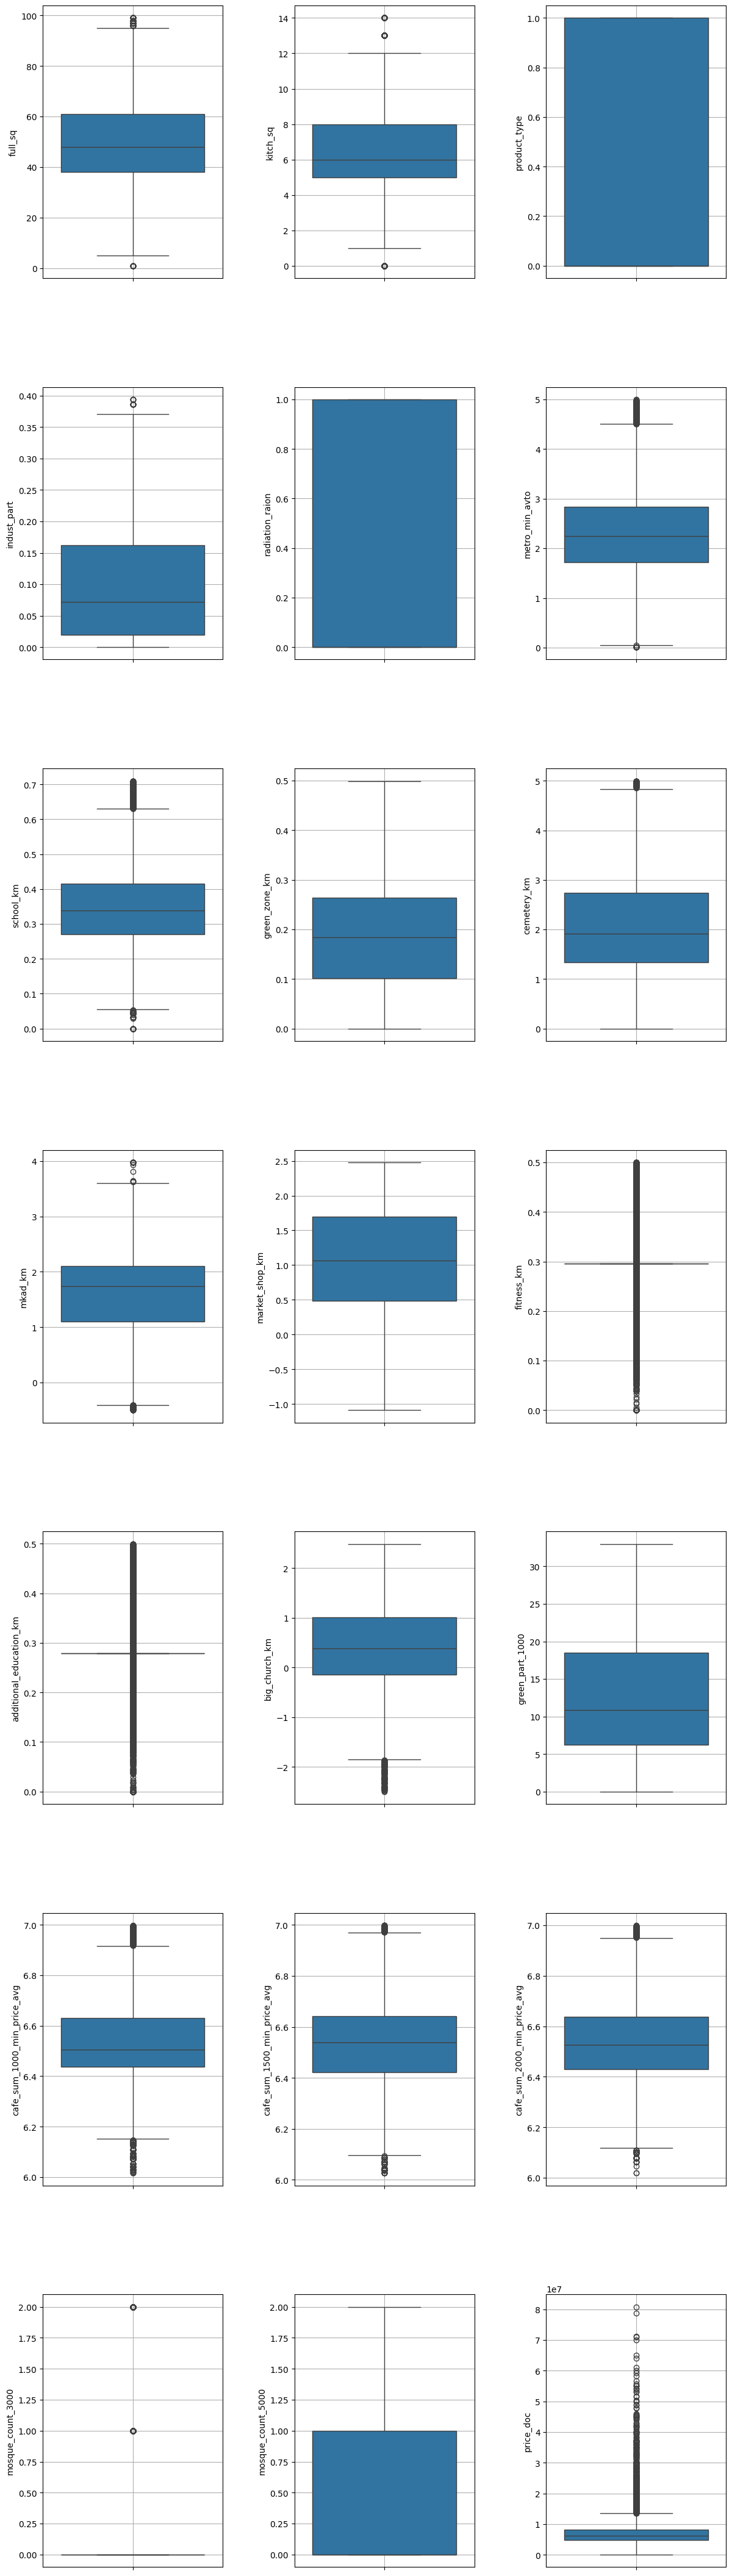

In [ ]:
fig = plt.figure(figsize=(14,15))
for index,col in enumerate(test_data):
    plt.subplot(7,3,index+1)
    sns.boxplot(y=col, data=test_data.dropna())
    plt.grid()
fig.tight_layout(pad=1.0)

plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=2.9,
                    wspace=0.4,
                    hspace=0.4)
plt.show()

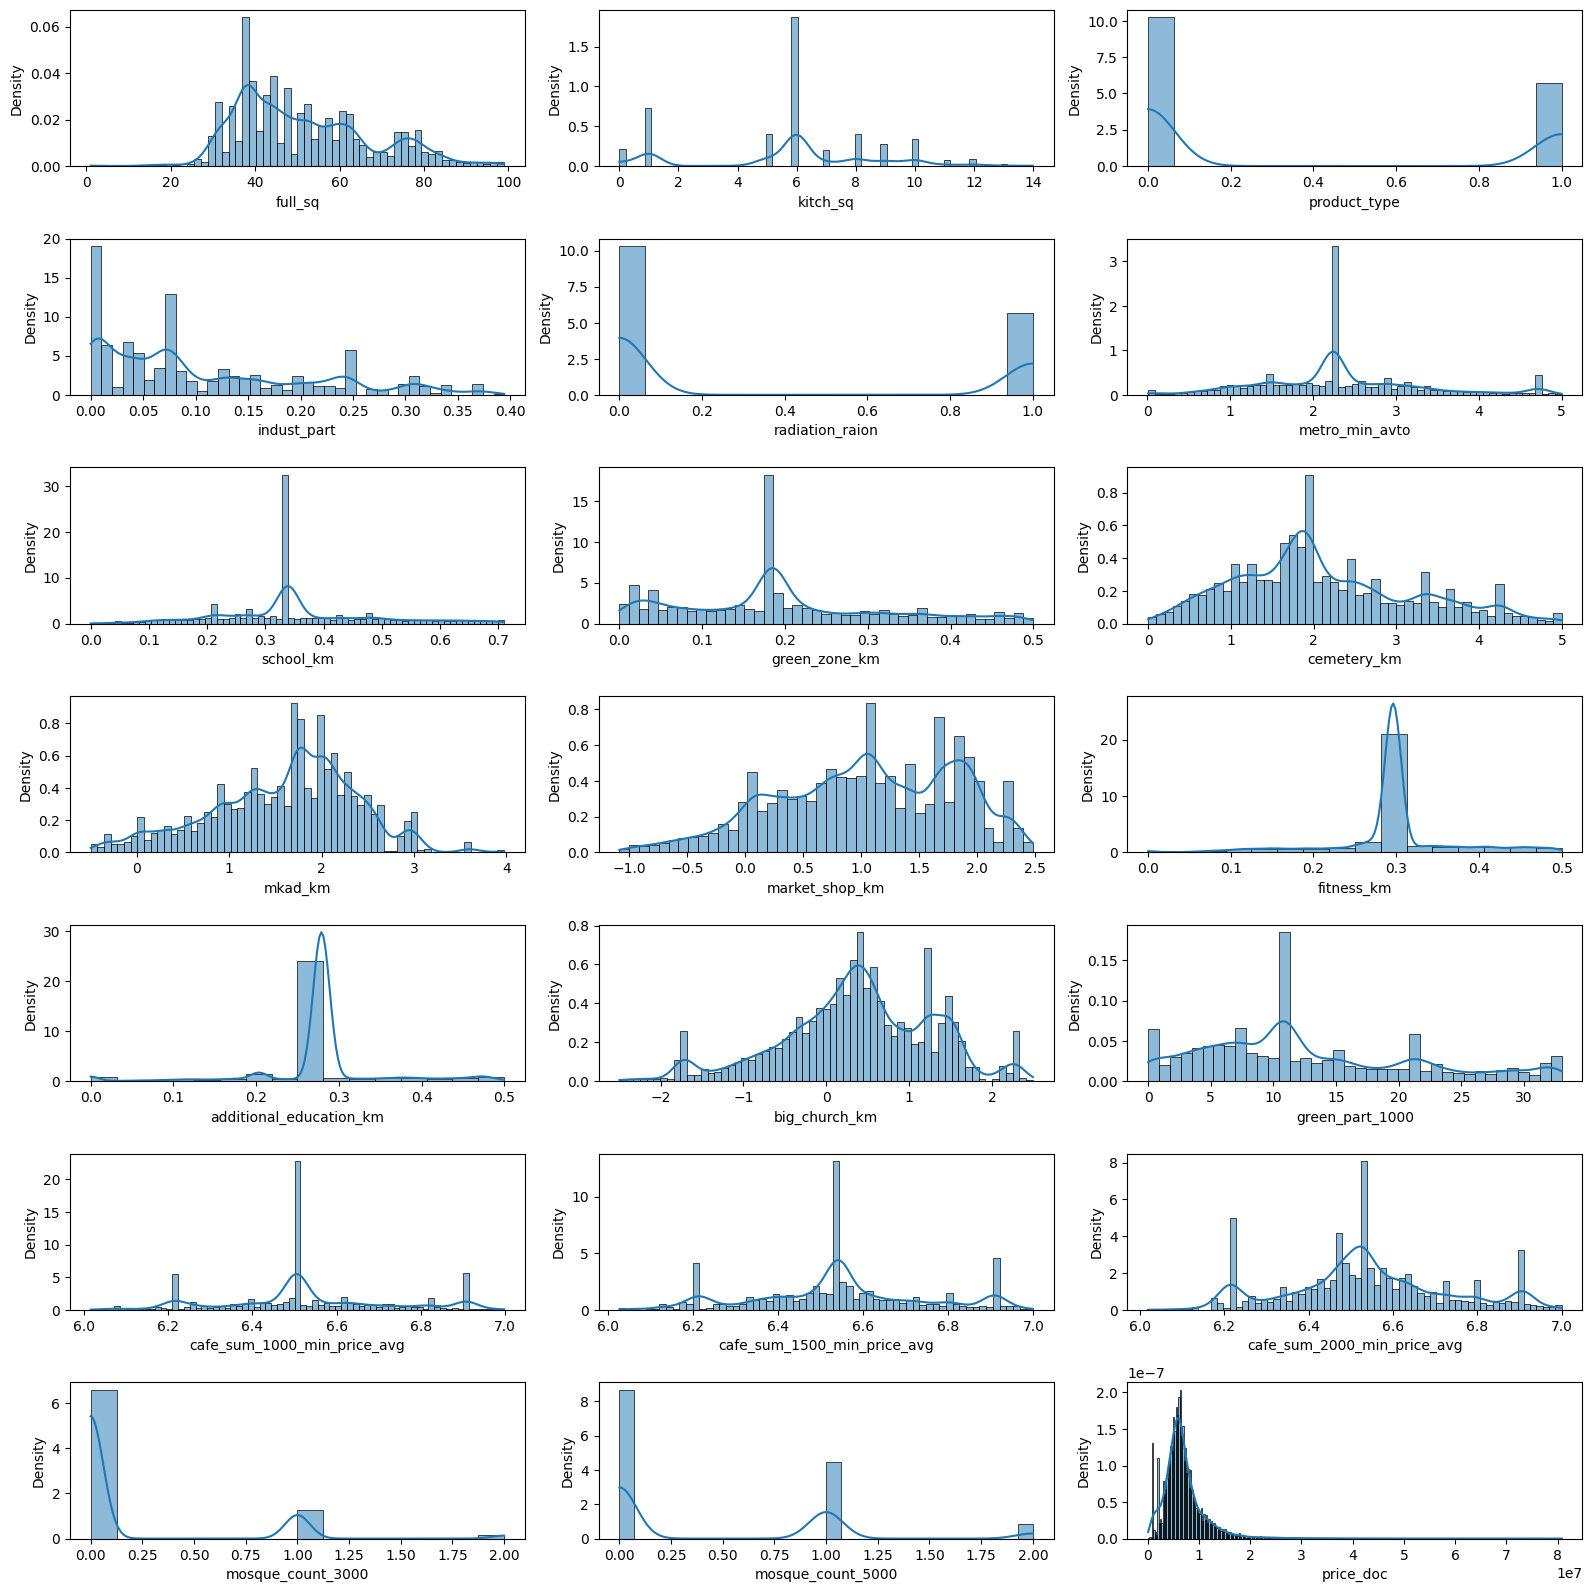

In [ ]:
fig = plt.figure(figsize=(16,16))
for index,col in enumerate(test_data):
    plt.subplot(7,3,index+1)
    sns.histplot(test_data.loc[:,col].dropna(), kde=True, stat="density", linewidth=0.5);
fig.tight_layout(pad=1.0);

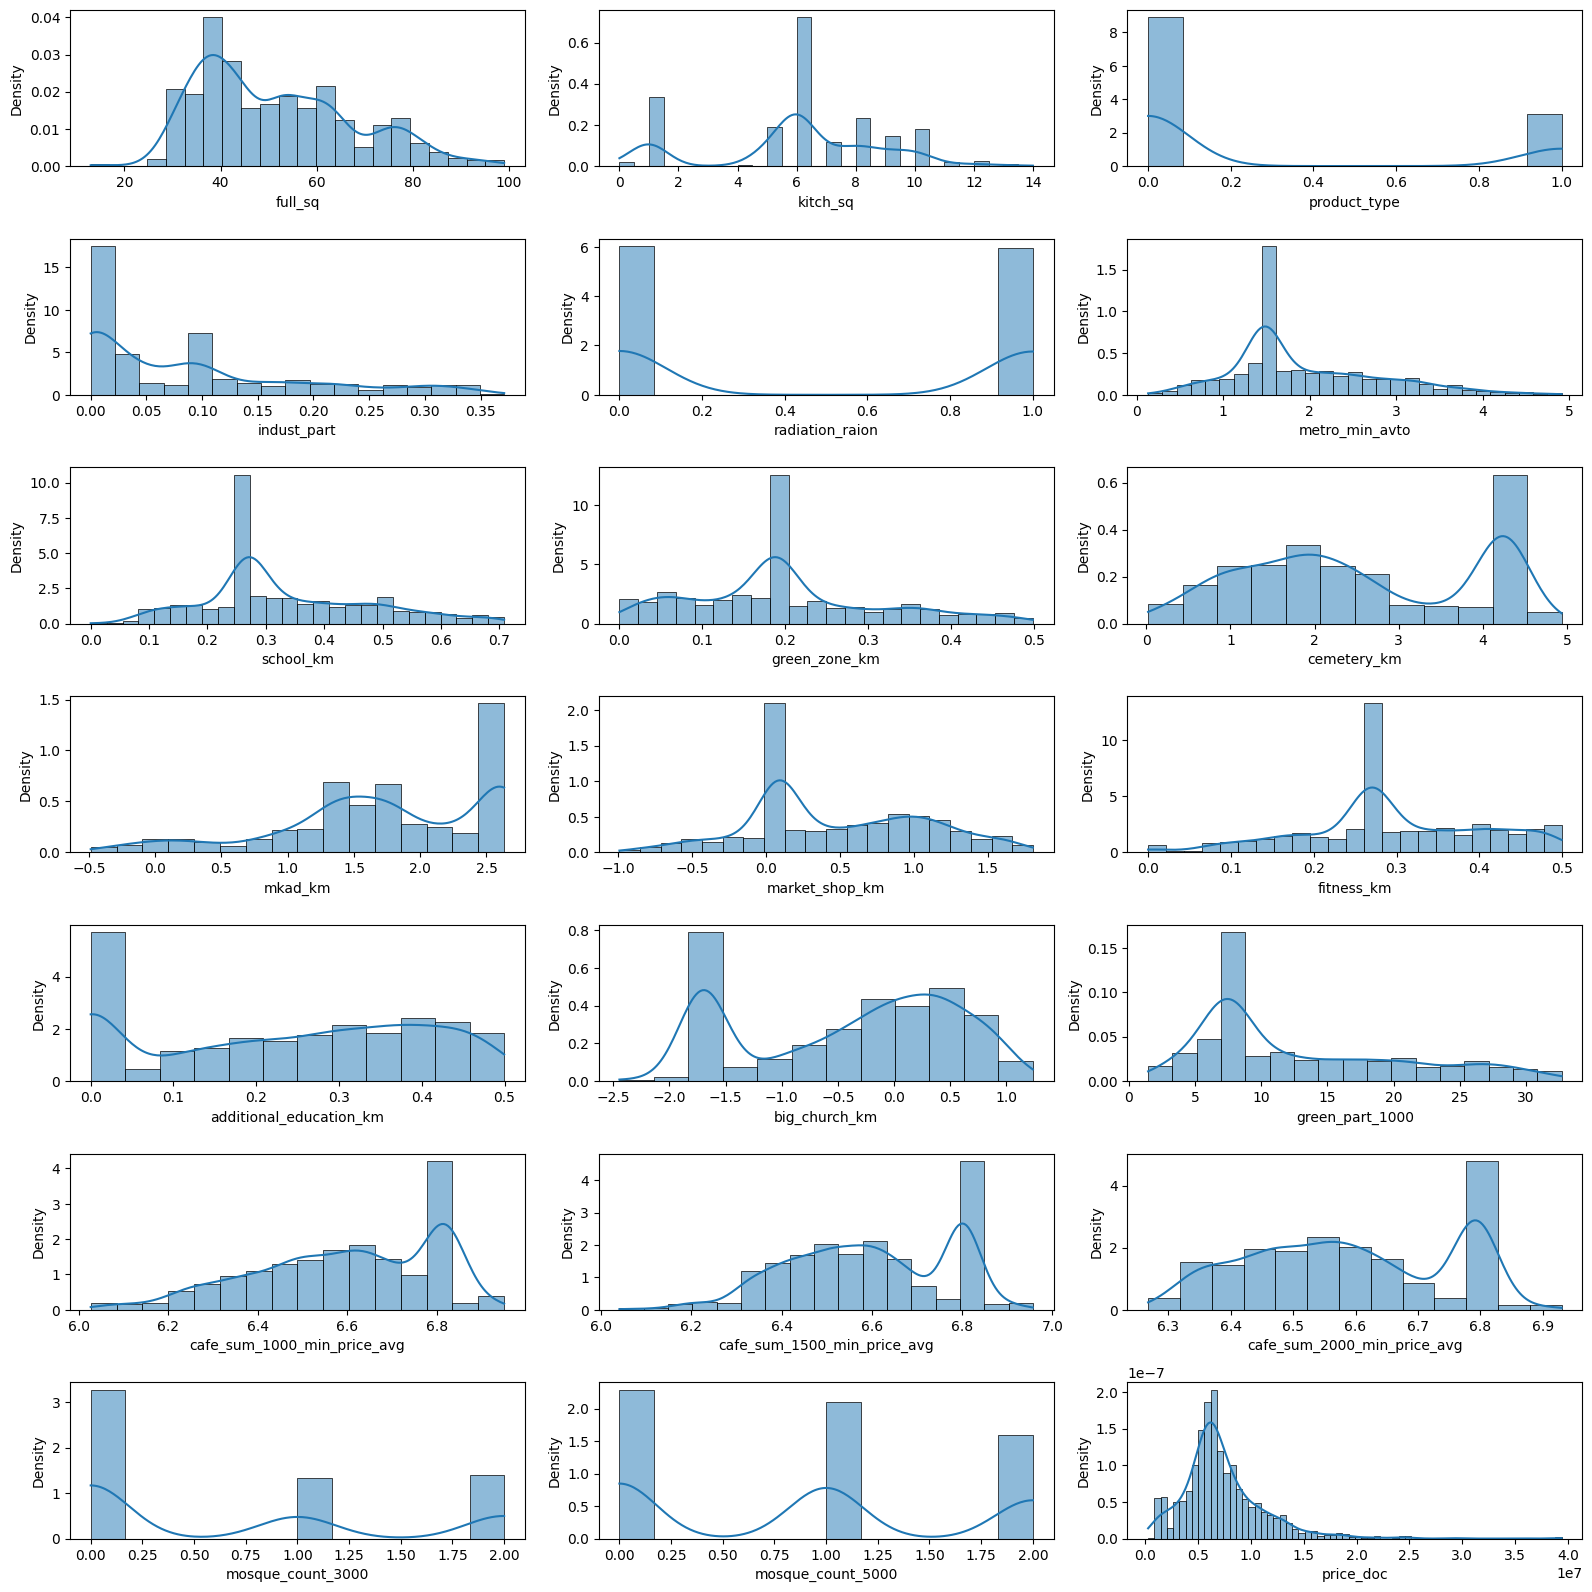

In [ ]:
fig = plt.figure(figsize=(16,16))
for index,col in enumerate(test_data):
    plt.subplot(7,3,index+1)
    sns.histplot(test_data.loc[:,col].dropna(), kde=True, stat="density", linewidth=0.5);
fig.tight_layout(pad=1.0);

In [ ]:
numeric_train = test_data
correlation = numeric_train.corr()
correlation[['price_doc']].sort_values(['price_doc'], ascending=False)

price_doc
price_doc                     1.000000
full_sq                       0.579626
kitch_sq                      0.221568
big_church_km                 0.157179
additional_education_km       0.128861
indust_part                   0.124676
school_km                     0.075192
market_shop_km                0.045329
green_part_1000               0.035558
metro_min_avto                0.022201
green_zone_km                -0.047779
fitness_km                   -0.049283
cafe_sum_2000_min_price_avg  -0.051799
cafe_sum_1500_min_price_avg  -0.084929
mosque_count_5000            -0.089339
radiation_raion              -0.102419
cafe_sum_1000_min_price_avg  -0.107988
product_type                 -0.146719
cemetery_km                  -0.192955
mosque_count_3000            -0.204665

In [ ]:
numeric_train = test_data
correlation = numeric_train.corr()
correlation[['price_doc']].sort_values(['price_doc'], ascending=False)

price_doc
price_doc                     1.000000
full_sq                       0.579626
kitch_sq                      0.221568
big_church_km                 0.157179
additional_education_km       0.128861
indust_part                   0.124676
school_km                     0.075192
market_shop_km                0.045329
green_part_1000               0.035558
metro_min_avto                0.022201
green_zone_km                -0.047779
fitness_km                   -0.049283
cafe_sum_2000_min_price_avg  -0.051799
cafe_sum_1500_min_price_avg  -0.084929
mosque_count_5000            -0.089339
radiation_raion              -0.102419
cafe_sum_1000_min_price_avg  -0.107988
product_type                 -0.146719
cemetery_km                  -0.192955
mosque_count_3000            -0.204665

<Axes: >

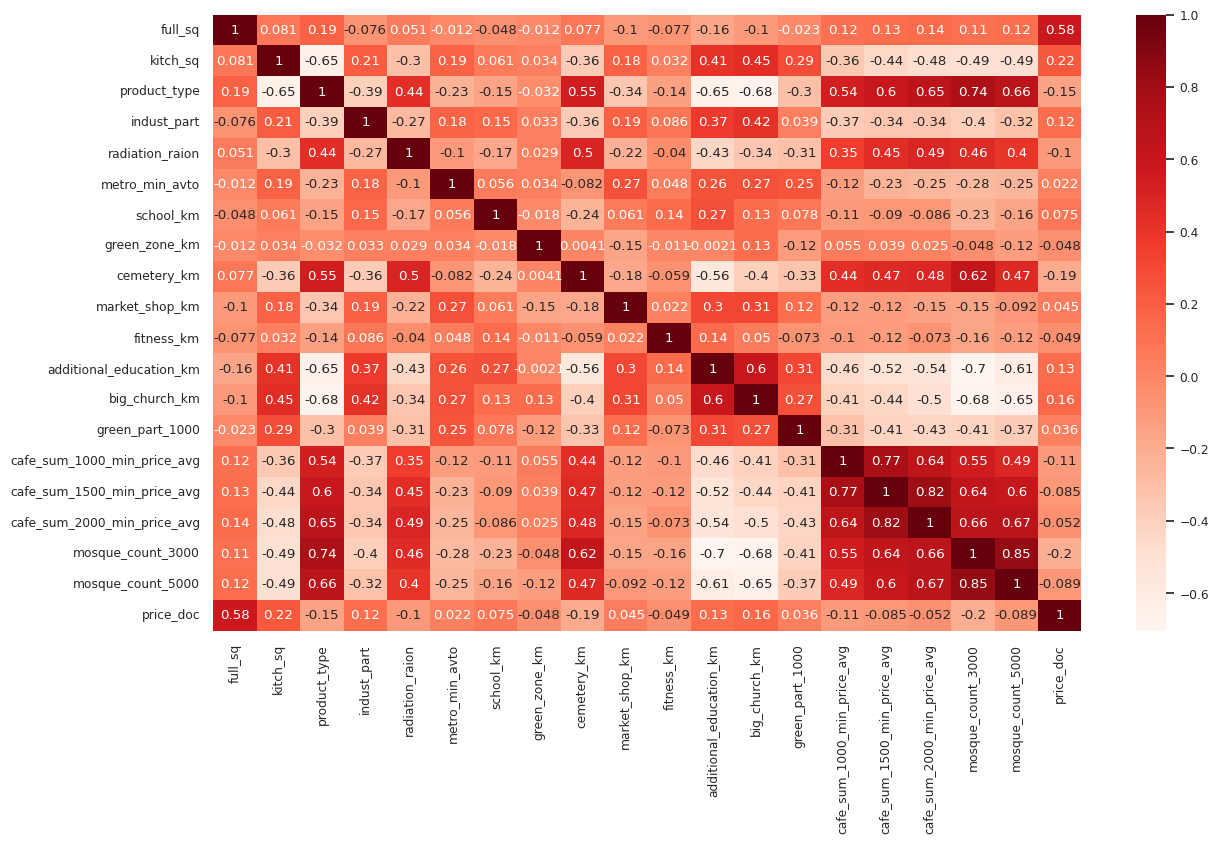

In [ ]:
isssns.heatmap(test_data.corr(), annot=True,cmap='Reds')

<Axes: >

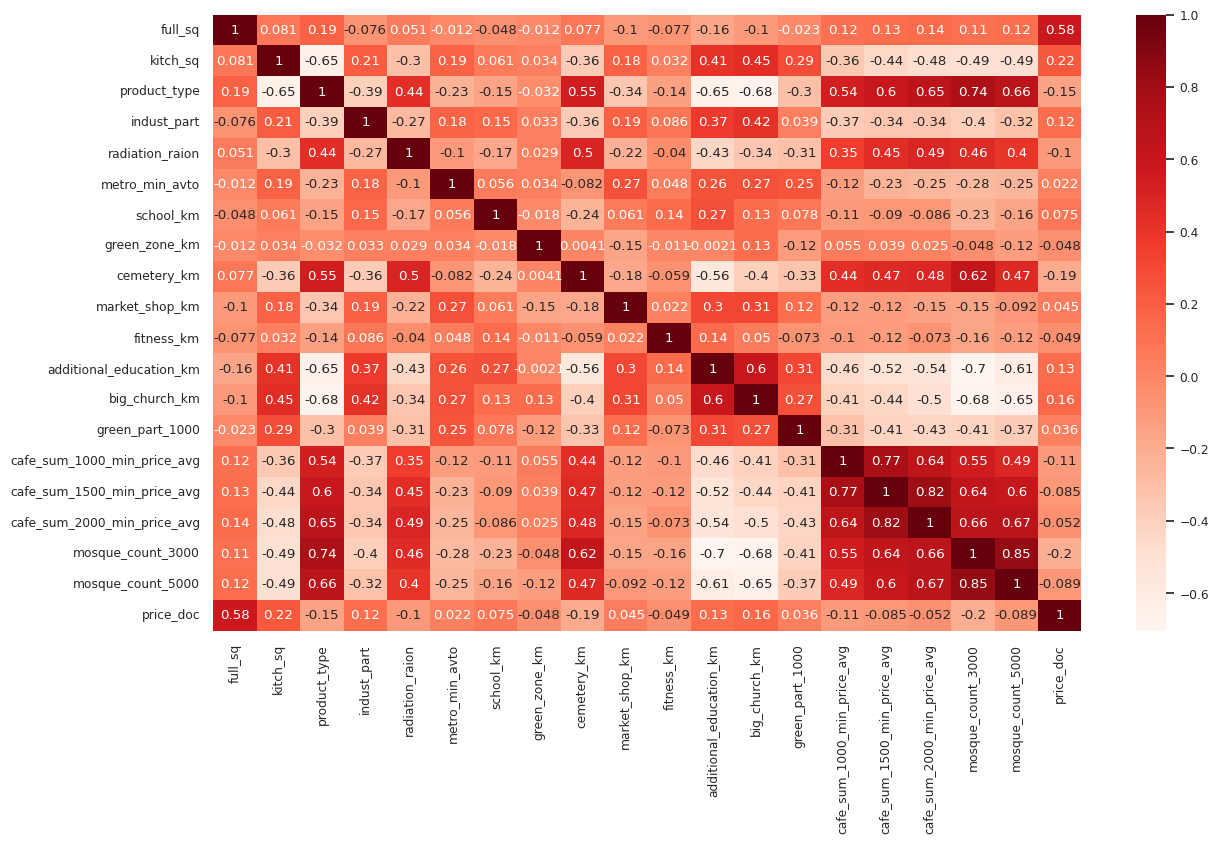

In [ ]:
sns.heatmap(test_data.corr(), annot=True,cmap='Reds')

In [ ]:
from openpyxl import Workbook
from openpyxl.styles import PatternFill
from openpyxl.utils.dataframe import dataframe_to_rows
from matplotlib.colors import Normalize
from matplotlib.cm import get_cmap

In [ ]:
# Создание Excel файла
wb = Workbook()
ws = wb.active

# Запись DataFrame в Excel
for r_idx, row in enumerate(dataframe_to_rows(df_corr, index=True, header=True)):
    for c_idx, value in enumerate(row):
        ws.cell(row=r_idx+1, column=c_idx+1, value=value)

# Применение цветовой заливки на основе значений
cmap = get_cmap('coolwarm')
norm = Normalize(vmin=df_corr.values.min(), vmax=df_corr.values.max())

for r_idx, row in enumerate(dataframe_to_rows(df_corr, index=False, header=False)):
    for c_idx, value in enumerate(row):
        cell = ws.cell(row=r_idx+3, column=c_idx+2)  # Смещение на 1 строку и 1 столбец для учета индексов и заголовков
        if not pd.isna(value):
            rgba = cmap(norm(value))
            fill_color = f'{int(rgba[0]*255):02X}{int(rgba[1]*255):02X}{int(rgba[2]*255):02X}'
            fill = PatternFill(start_color=fill_color, end_color=fill_color, fill_type='solid')
            cell.fill = fill

# Сохранение Excel файла
wb.save("heatmap.xlsx")

In [ ]:
# Установка PyDrive
!pip install PyDrive

In [ ]:
# Авторизация и настройка API Google Drive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [ ]:
!pip install pydrive2

In [ ]:
from pydrive2.auth import GoogleAuth
from pydrive2.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [ ]:
# Авторизация
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
file_path = '/content/heatmap1.xlsx'
wb.save(file_path)

In [ ]:
# Создание файла и загрузка на Google Диск
file = drive.CreateFile({'title': 'heatmap1.xlsx'})
file.SetContentFile(file_path)
file.Upload()

print("Workbook успешно сохранен на Google Диске!")

Workbook успешно сохранен на Google Диске!


<Axes: >

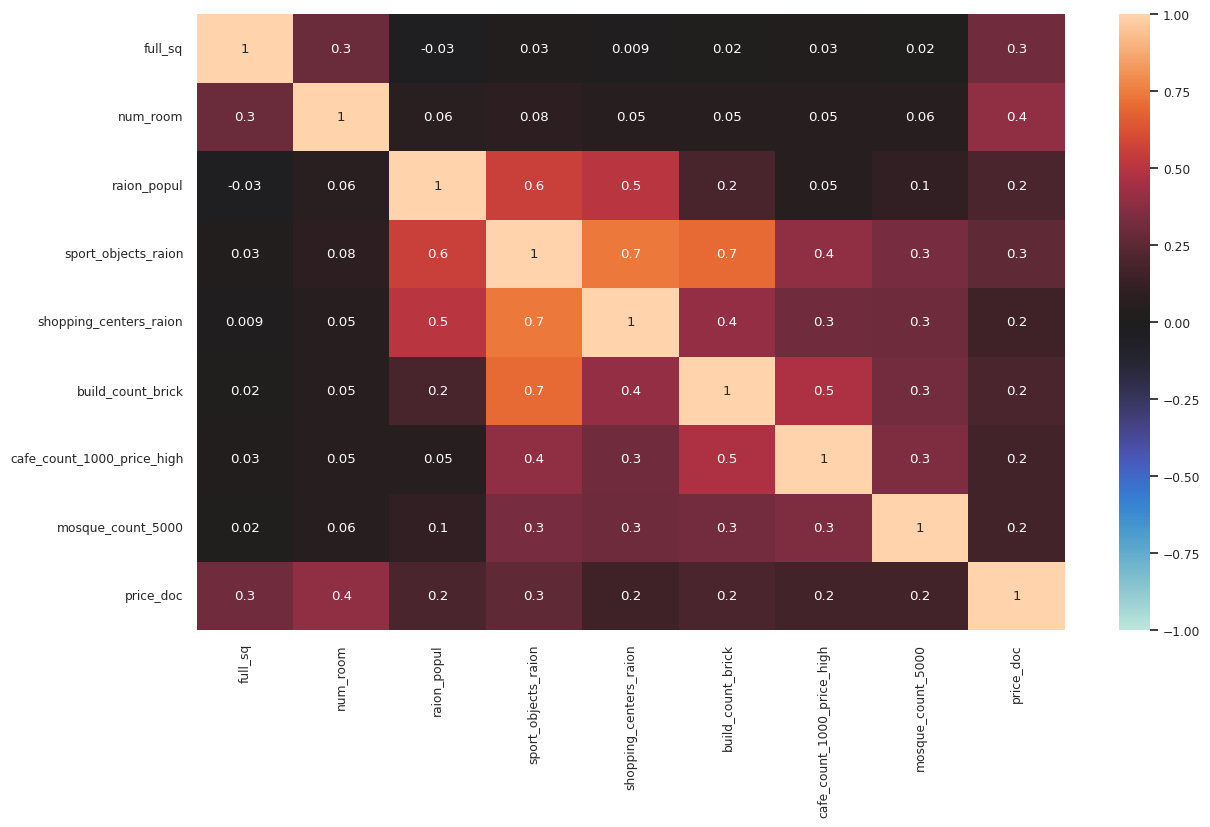

In [ ]:
mask = df_corr.price_doc > 0.15
sns.heatmap(
    df_corr.loc[mask, mask],  # датасет
    annot=True,  # вывод значений в ячейках
    fmt='.1g',  # формат значений
    vmin=-1,  # нижнее значение цветовой гаммы
    vmax=1,  # верхнее значение цветовой гаммы
    center=0,  # среднее значение цветовой гаммы
)

### ☑️ Linear Regression
 * Score 4406908.0776

In [ ]:
X=test_data.drop('price_doc', axis=1)

y=test_data['price_doc']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1)


print(X_val.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 302 entries, 19537 to 13663
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   full_sq                      302 non-null    float64
 1   kitch_sq                     302 non-null    float64
 2   product_type                 302 non-null    int64  
 3   indust_part                  302 non-null    float64
 4   radiation_raion              302 non-null    int64  
 5   metro_min_avto               302 non-null    float64
 6   school_km                    302 non-null    float64
 7   green_zone_km                302 non-null    float64
 8   cemetery_km                  302 non-null    float64
 9   market_shop_km               302 non-null    float64
 10  fitness_km                   302 non-null    float64
 11  additional_education_km      302 non-null    float64
 12  big_church_km                302 non-null    float64
 13  green_part_100

In [ ]:
model_linear = LinearRegression()

In [ ]:
model_linear.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Predict on train data
pred_train_linear = model_linear.predict(X_train)

r2_train = r2_score(y_train, pred_train_linear)
mse_train = mean_squared_error(y_train, pred_train_linear)
rmse_train = np.sqrt(mse_train)
mae_train = mean_absolute_error(y_train, pred_train_linear)

In [ ]:
# Predict on validation data
pred_val_linear = model_linear.predict(X_val)

r2_val = r2_score(y_val, pred_val_linear)
mse_val = mean_squared_error(y_val, pred_val_linear)
rmse_val = np.sqrt(mse_val)
mae_val = mean_absolute_error(y_val, pred_val_linear)

In [ ]:
pd.DataFrame({'Validation':  [r2_val, mse_val, rmse_val, mae_val],
               'Training': [r2_train, mse_train, rmse_train, mae_train],
             },
              index=['R2', 'MSE', 'RMSE', 'MAE'])

Validation      Training
R2    4.407048e-01  4.546859e-01
MSE   8.100258e+12  9.109129e+12
RMSE  2.846095e+06  3.018133e+06
MAE   1.839533e+06  1.981020e+06

In [ ]:
# Finally, predict on test data
pred_test_linear = model_linear.predict(X_test)

r2_test_linear = r2_score(y_test, pred_test_linear)
mse_test_linear = mean_squared_error(y_test, pred_test_linear)
rmse_test_linear = np.sqrt(mse_test_linear)
mae_test_linear = mean_absolute_error(y_test, pred_test_linear)

print(f"Средняя абсолютная ошибка (MAE): {mae_test_linear:.2f}")
print(f"Среднеквадратичная ошибка (MSE): {mse_test_linear:.2f}")
print(f"Корень из среднеквадратичной ошибки (RMSE): {rmse_test_linear:.2f}")
print(f"Коэффициент детерминации (R^2): {r2_test_linear:.2f}")

Средняя абсолютная ошибка (MAE): 1890227.78
Среднеквадратичная ошибка (MSE): 7663592182120.70
Корень из среднеквадратичной ошибки (RMSE): 2768319.38
Коэффициент детерминации (R^2): 0.44


In [ ]:
# Finally, predict on test data
pred_test_linear = model_linear.predict(X_test)

r2_test_linear = r2_score(y_test, pred_test_linear)
mse_test_linear = mean_squared_error(y_test, pred_test_linear)
rmse_test_linear = np.sqrt(mse_test_linear)
mae_test_linear = mean_absolute_error(y_test, pred_test_linear)

print(f"Средняя абсолютная ошибка (MAE): {mae_test_linear:.2f}")
print(f"Среднеквадратичная ошибка (MSE): {mse_test_linear:.2f}")
print(f"Корень из среднеквадратичной ошибки (RMSE): {rmse_test_linear:.2f}")
print(f"Коэффициент детерминации (R^2): {r2_test_linear:.2f}")

Средняя абсолютная ошибка (MAE): 1890227.78
Среднеквадратичная ошибка (MSE): 7663592182120.70
Корень из среднеквадратичной ошибки (RMSE): 2768319.38
Коэффициент детерминации (R^2): 0.44


In [ ]:
# Finally, predict on test data
pred_test_linear = model_linear.predict(X_test)

r2_test_linear = r2_score(y_test, pred_test_linear)
mse_test_linear = mean_squared_error(y_test, pred_test_linear)
rmse_test_linear = np.sqrt(mse_test_linear)
mae_test_linear = mean_absolute_error(y_test, pred_test_linear)

print(f"Средняя абсолютная ошибка (MAE): {mae_test_linear:.2f}")
print(f"Среднеквадратичная ошибка (MSE): {mse_test_linear:.2f}")
print(f"Корень из среднеквадратичной ошибки (RMSE): {rmse_test_linear:.2f}")
print(f"Коэффициент детерминации (R^2): {r2_test_linear:.2f}")

Средняя абсолютная ошибка (MAE): 1890227.78
Среднеквадратичная ошибка (MSE): 7663592182120.70
Корень из среднеквадратичной ошибки (RMSE): 2768319.38
Коэффициент детерминации (R^2): 0.44


### ✅ Feature Scaling

In [21]:
X=test_data.drop('price_doc', axis=1)

y=test_data['price_doc']

In [22]:
# Standardize features by removing the mean and scaling to unit variance.
# The standard score of a sample x is calculated as:
#       z = (x - u) / s
transformer = StandardScaler().fit(X)
X_prep = transformer.transform(X)

In [23]:
X_prep.shape

(1727, 19)

In [24]:
# Polynomial Features
polynomial_converter = PolynomialFeatures(degree=2, include_bias=False)

# Fit and transform
poly_features = polynomial_converter.fit(X_prep)
poly_features = polynomial_converter.transform(X_prep)

poly_features.shape

(1727, 209)

In [25]:
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=1)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1)

In [26]:
X.head()

full_sq  kitch_sq  product_type  indust_part  radiation_raion  \
5      91.0      10.0             0     0.219006                0   
25     43.0       5.0             0     0.122090                0   
46     52.0       6.0             0     0.100456                0   
58     50.0       6.0             0     0.050756                0   
82     39.0       6.0             0     0.090799                0   

    metro_min_avto  school_km  green_zone_km  cemetery_km  market_shop_km  \
5         2.834228   0.471571       0.026158     1.980857        1.463950   
25        2.053693   0.298739       0.063941     1.633688        0.175153   
46        2.610348   0.374389       0.428531     2.292217        0.788724   
58        4.447094   0.383865       0.072757     2.480587        1.461797   
82        1.390035   0.395546       0.130524     1.703338       -0.076133   

    fitness_km  additional_education_km  big_church_km  green_part_1000  \
5     0.264123                 0.262815       0.326198             5.83   
25    0.178709                 0.175327      -0.847600            17.87   
46    0.478849                 0.407528       1.053707             6.73   
58    0.462229                 0.474669      -0.797683             5.13   
82    0.106383                 0.457222      -0.675032            27.16   

    cafe_sum_1000_min_price_avg  cafe_sum_1500_min_price_avg  \
5                      6.551080                     6.674953   
25                     6.339777                     6.396930   
46                     6.526978                     6.466891   
58                     6.582330                     6.526978   
82                     6.359193                     6.409665   

    cafe_sum_2000_min_price_avg  mosque_count_3000  mosque_count_5000  
5                      6.528265                  1                  1  
25                     6.559445                  0                  1  
46                     6.505739                  0                  0  
58                     6.447353                  0                  0  
82                     6.314453                  0                  0

In [27]:
y.head()

5     15500000
25     6700000
46     7200000
58     2500000
82     4850000
Name: price_doc, dtype: int64

In [28]:
# Finally, predict on test data
pred_test_linear = polynomial_converter.predict(X_test)

r2_test_linear = r2_score(y_test, pred_test_linear)
mse_test_linear = mean_squared_error(y_test, pred_test_linear)
rmse_test_linear = np.sqrt(mse_test_linear)
mae_test_linear = mean_absolute_error(y_test, pred_test_linear)

print(f"Средняя абсолютная ошибка (MAE): {mae_test_linear:.2f}")
print(f"Среднеквадратичная ошибка (MSE): {mse_test_linear:.2f}")
print(f"Корень из среднеквадратичной ошибки (RMSE): {rmse_test_linear:.2f}")
print(f"Коэффициент детерминации (R^2): {r2_test_linear:.2f}")

AttributeError: 'PolynomialFeatures' object has no attribute 'predict'

### ✔️ L2 Regularization - Ridge Regression

In [ ]:
model_ridge = Ridge(alpha=10)
model_ridge.fit(X_train, y_train)

Ridge(alpha=10)

In [ ]:
# Predict on train data
pred_train_ridge = model_ridge.predict(X_train)

r2_train = r2_score(y_train, pred_train_ridge)
mse_train = mean_squared_error(y_train, pred_train_ridge)
rmse_train = np.sqrt(mse_train)
mae_train = mean_absolute_error(y_train, pred_train_ridge)

In [ ]:
# Predict on validation data
pred_val_ridge = model_ridge.predict(X_val)

r2_val = r2_score(y_val, pred_val_ridge)
mse_val = mean_squared_error(y_val, pred_val_ridge)
rmse_val = np.sqrt(mse_val)
mae_val = mean_absolute_error(y_val, pred_val_ridge)

In [ ]:
pd.DataFrame({'Validation':  [r2_val, mse_val, rmse_val, mae_val],
               'Training': [r2_train, mse_train, rmse_train, mae_train],
             },
              index=['R2', 'MSE', 'RMSE', 'MAE'])

Validation      Training
R2    4.637164e-01  7.155868e-01
MSE   7.766981e+12  4.750943e+12
RMSE  2.786930e+06  2.179666e+06
MAE   1.804230e+06  1.429980e+06

In [ ]:
# Cross-validation method to evaluate model
model_ridge_cv = RidgeCV(alphas=(0.001, 0.01), scoring='neg_mean_absolute_error')

In [ ]:
model_ridge_cv.fit(X_train, y_train)

print("alpha: ", model_ridge_cv.alpha_)

alpha:  0.01


In [ ]:
# Predict on validation data
pred_val_ridge = model_ridge_cv.predict(X_val)

r2_val2 = r2_score(y_val, pred_val_ridge)
mse_val2 = mean_squared_error(y_val, pred_val_ridge)
rmse_val2 = np.sqrt(mse_val)
mae_val2 = mean_absolute_error(y_val, pred_val_ridge)

In [ ]:
# Compare this model (validation 2) with the previous one (validation 1)
pd.DataFrame({'Validation 1':  [r2_val, mse_val, rmse_val, mae_val],
               'Validation 2': [r2_val2, mse_val2, rmse_val2, mae_val2],
             },
              index=['R2', 'MSE', 'RMSE', 'MAE'])

Validation 1  Validation 2
R2    4.637164e-01  1.735767e-02
MSE   7.766981e+12  1.423158e+13
RMSE  2.786930e+06  2.786930e+06
MAE   1.804230e+06  2.045809e+06

In [ ]:
# Finally, predict on test data
pred_test_ridge = model_ridge_cv.predict(X_test)

r2_test_ridge = r2_score(y_test, pred_test_ridge)
mse_test_ridge = mean_squared_error(y_test, pred_test_ridge)
rmse_test_ridge = np.sqrt(mse_val)
mae_test_ridge = mean_absolute_error(y_test, pred_test_ridge)

print(f"Средняя абсолютная ошибка (MAE): {mae_test_ridge:.2f}")
print(f"Среднеквадратичная ошибка (MSE): {mse_test_ridge:.2f}")
print(f"Корень из среднеквадратичной ошибки (RMSE): {rmse_test_ridge:.2f}")
print(f"Коэффициент детерминации (R^2): {r2_test_ridge:.2f}")

Средняя абсолютная ошибка (MAE): 1936485.91
Среднеквадратичная ошибка (MSE): 10142666917973.07
Корень из среднеквадратичной ошибки (RMSE): 2786930.44
Коэффициент детерминации (R^2): 0.26


### ✔️ L1 Regularization - Lasso Regression
 *   Score 4500025.127

In [ ]:
model_lasso = Lasso(alpha=0.1)
model_lasso.fit(X_train, y_train)

Lasso(alpha=0.1)

In [ ]:
# Predict on train data
pred_train_lasso = model_lasso.predict(X_train)

r2_train_lasso = r2_score(y_train, pred_train_lasso)
mse_train_lasso = mean_squared_error(y_train, pred_train_lasso)
rmse_train_lasso = np.sqrt(mse_train)
mae_train_lasso = mean_absolute_error(y_train, pred_train_lasso)

In [ ]:
# Predict on validation data
pred_val_lasso = model_lasso.predict(X_val)

r2_val_lasso = r2_score(y_val, pred_val_lasso)
mse_val_lasso = mean_squared_error(y_val, pred_val_lasso)
rmse_val_lasso = np.sqrt(mse_val)
mae_val_lasso = mean_absolute_error(y_val, pred_val_lasso)

In [ ]:
pd.DataFrame({'Validation':  [r2_val_lasso, mse_val_lasso, rmse_val_lasso, mae_val_lasso],
               'Training': [r2_train_lasso, mse_train_lasso, rmse_train_lasso, mae_train_lasso],
             },
              index=['R2', 'MSE', 'RMSE', 'MAE'])

Validation      Training
R2    3.098371e-01  7.235647e-01
MSE   9.995611e+12  4.617678e+12
RMSE  2.786930e+06  2.179666e+06
MAE   1.953260e+06  1.410604e+06

In [ ]:
# Cross-validation method to evaluate model
#model_lasso_cv = LassoCV(eps=0.01, n_alphas=50000, cv=10)
model_lasso_cv = LassoCV(eps=0.01, n_alphas=100, cv=10, max_iter=10000)

In [ ]:
model_lasso_cv.fit(X_train, y_train)

print("alpha: ", model_lasso_cv.alpha_)

alpha:  53123.13100815367


In [ ]:
# Predict on validation data
pred_val_lasso2 = model_lasso_cv.predict(X_val)

r2_val2_lasso = r2_score(y_val, pred_val_lasso2)
mse_val2_lasso = mean_squared_error(y_val, pred_val_lasso2)
rmse_val2_lasso = np.sqrt(mse_val)
mae_val2_lasso = mean_absolute_error(y_val, pred_val_lasso2)

In [ ]:
# Compare this model (validation 2) with the previous one (validation 1)
pd.DataFrame({'Validation 1':  [r2_val_lasso, mse_val_lasso, rmse_val_lasso, mae_val_lasso],
               'Validation 2': [r2_val2_lasso, mse_val2_lasso, rmse_val2_lasso, mae_val2_lasso],
             },
              index=['R2', 'MSE', 'RMSE', 'MAE'])

Validation 1  Validation 2
R2    3.098371e-01  5.719282e-01
MSE   9.995611e+12  6.199753e+12
RMSE  2.786930e+06  2.786930e+06
MAE   1.953260e+06  1.507828e+06

In [ ]:
model_lasso_cv.coef_

array([ 1.90546186e+06,  2.37658795e+05, -0.00000000e+00, -0.00000000e+00,
        4.76853898e+04, -0.00000000e+00,  0.00000000e+00, -1.13285166e+05,
       -3.55348157e+05, -0.00000000e+00, -0.00000000e+00,  7.01477301e+04,
        0.00000000e+00, -4.10134888e+05,  0.00000000e+00,  0.00000000e+00,
        1.97442857e+05, -0.00000000e+00,  1.08319734e+05,  1.84208526e+05,
       -1.45706290e+04, -0.00000000e+00, -0.00000000e+00,  1.03595692e+05,
       -0.00000000e+00, -3.48617474e+04, -3.09776048e+04, -2.31733362e+05,
        8.18527883e+04, -1.60929581e+05,  4.42700123e+04,  9.63046021e+04,
       -1.83581229e+05,  1.07613941e+05,  0.00000000e+00,  0.00000000e+00,
       -6.66928768e+05,  4.00917502e+05,  1.93930899e+05, -3.87573582e+05,
        1.19444140e+05, -3.74795479e+04,  5.79862113e+04, -0.00000000e+00,
       -0.00000000e+00,  3.09975870e+05, -0.00000000e+00, -1.36900197e+05,
       -0.00000000e+00, -0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
       -5.79615220e+03, -

In [ ]:
# Finally, predict on test data
pred_test_lasso = model_lasso_cv.predict(X_test)

r2_test_lasso = r2_score(y_test, pred_test_lasso)
mse_test_lasso = mean_squared_error(y_test, pred_test_lasso)
rmse_test_lasso = np.sqrt(mse_val)
mae_test_lasso = mean_absolute_error(y_test, pred_test_lasso)

print(f"Средняя абсолютная ошибка (MAE): {mae_test_lasso:.2f}")
print(f"Среднеквадратичная ошибка (MSE): {mse_test_lasso:.2f}")
print(f"Корень из среднеквадратичной ошибки (RMSE): {rmse_test_lasso:.2f}")
print(f"Коэффициент детерминации (R^2): {r2_test_lasso:.2f}")

Средняя абсолютная ошибка (MAE): 1614003.43
Среднеквадратичная ошибка (MSE): 6426143386319.30
Корень из среднеквадратичной ошибки (RMSE): 2786930.44
Коэффициент детерминации (R^2): 0.53


In [ ]:

from sklearn.linear_model import LassoLars
model_lasso_lars = LassoLars(alpha=0.1)
model_lasso_lars.fit(X_train, y_train)


LassoLars(alpha=0.1)

In [ ]:
# Predict on train data
pred_train1_lasso = model_lasso_lars.predict(X_train)

r2_train1_lasso = r2_score(y_train, pred_train1_lasso)
mse_train1_lasso = mean_squared_error(y_train, pred_train1_lasso)
rmse_train1_lasso = np.sqrt(mse_train)
mae_train1_lasso = mean_absolute_error(y_train, pred_train1_lasso)

In [ ]:
# Predict on validation data

pred_val1_lasso = model_lasso_lars.predict(X_val)

r2_val1_lasso = r2_score(y_val, pred_val1_lasso)
mse_val1_lasso = mean_squared_error(y_val, pred_val1_lasso)
rmse_val1_lasso = np.sqrt(mse_val)
mae_val1_lasso = mean_absolute_error(y_val, pred_val1_lasso)

In [ ]:
pd.DataFrame({'Validation':  [r2_val1_lasso, mse_val1_lasso, rmse_val1_lasso, mae_val1_lasso],
               'Training': [r2_train1_lasso, mse_train1_lasso, rmse_train1_lasso, mae_train1_lasso],
             },
              index=['R2', 'MSE', 'RMSE', 'MAE'])

Validation      Training
R2    1.083413e-01  7.244171e-01
MSE   1.291387e+13  4.603439e+12
RMSE  2.786930e+06  2.179666e+06
MAE   2.032949e+06  1.402646e+06

In [ ]:
model_lasso_lars.coef_

array([ 1.96174668e+06,  3.87110159e+05,  0.00000000e+00, -1.92849727e+06,
       -6.26940553e+05,  9.42779289e+04,  2.21246024e+05, -8.38687051e+05,
       -9.80790123e+05, -1.87414685e+06, -8.06820597e+05, -1.29741833e+06,
        3.77289631e+06, -1.25503855e+06, -5.27157310e+05, -3.61935976e+06,
        4.54435007e+06,  5.60728762e+05,  3.63419993e+05,  1.28009201e+05,
       -8.50758926e+04,  1.65582156e+05,  2.21299663e+04,  2.06290065e+05,
       -1.16572000e+04, -9.68868312e+04, -1.02763437e+05, -5.19366505e+05,
        6.07606996e+04, -1.33393538e+03,  1.32979263e+05,  2.48820912e+05,
       -1.22470066e+05,  4.20223940e+05, -4.40844157e+05,  1.45202346e+05,
       -3.30364949e+05,  2.11235831e+05,  7.04711169e+04, -9.96177017e+05,
        3.18047494e+04,  1.71161445e+05,  8.42554269e+02,  2.75467572e+05,
       -6.27847072e+04,  4.00920188e+05, -2.95701277e+05, -5.70305863e+05,
       -3.72684249e+05, -2.69985936e+05, -2.95287834e+05,  1.04720493e+04,
       -5.90974561e+04, -

In [ ]:
# Finally, predict on test data
pred_test_lasso_lars = model_lasso_lars.predict(X_test)

r2_test_lasso = r2_score(y_test, pred_test_lasso_lars)
mse_test_lasso = mean_squared_error(y_test, pred_test_lasso_lars)
rmse_test_lasso = np.sqrt(mse_val)
mae_test_lasso = mean_absolute_error(y_test, pred_test_lasso_lars)

print(f"Средняя абсолютная ошибка (MAE): {mae_test_lasso:.2f}")
print(f"Среднеквадратичная ошибка (MSE): {mse_test_lasso:.2f}")
print(f"Корень из среднеквадратичной ошибки (RMSE): {rmse_test_lasso:.2f}")
print(f"Коэффициент детерминации (R^2): {r2_test_lasso:.2f}")

Средняя абсолютная ошибка (MAE): 1937644.52
Среднеквадратичная ошибка (MSE): 10149568122076.22
Корень из среднеквадратичной ошибки (RMSE): 2786930.44
Коэффициент детерминации (R^2): 0.25


### ✔️XGBRegressor

Score 2970571.0528

In [29]:
# Fit the model
model_xgbr = XGBRegressor(objective ='reg:squarederror', n_estimators = 10, seed = 0, max_depth = 3)

model_xgbr.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=10, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [30]:
# Predict on train data
pred_train_xgbr = model_xgbr.predict(X_train)

r2_train_xgbr = r2_score(y_train, pred_train_xgbr)
mse_train_xgbr = mean_squared_error(y_train, pred_train_xgbr)
rmse_train_xgbr = np.sqrt(mse_train_xgbr)
mae_train_xgbr = mean_absolute_error(y_train, pred_train_xgbr)

In [31]:
# Predict on validation data
pred_val_xgbr = model_xgbr.predict(X_val)

r2_val_xgbr = r2_score(y_val, pred_val_xgbr)
mse_val_xgbr = mean_squared_error(y_val, pred_val_xgbr)
rmse_val_xgbr = np.sqrt(mse_val_xgbr)
mae_val_xgbr = mean_absolute_error(y_val, pred_val_xgbr)

In [32]:
pd.DataFrame({'Validation':  [r2_val_xgbr, mse_val_xgbr, rmse_val_xgbr, mae_val_xgbr],
               'Training': [r2_train_xgbr, mse_train_xgbr, rmse_train_xgbr, mae_train_xgbr],
             },
              index=['R2', 'MSE', 'RMSE', 'MAE'])

Validation      Training
R2    4.797775e-01  7.107254e-01
MSE   7.534369e+12  4.832151e+12
RMSE  2.744881e+06  2.198215e+06
MAE   1.634597e+06  1.458249e+06

In [33]:
# Finally, predict on test data
pred_test_xgbr = model_xgbr.predict(X_test)

r2_test_xgbr = r2_score(y_test, pred_test_xgbr)
mse_test_xgbr = mean_squared_error(y_test, pred_test_xgbr)
rmse_test_xgbr = np.sqrt(mse_test_xgbr)
mae_test_xgbr = mean_absolute_error(y_test, pred_test_xgbr)


print(f"Средняя абсолютная ошибка (MAE): {mae_test_xgbr:.2f}")
print(f"Среднеквадратичная ошибка (MSE): {mse_test_xgbr:.2f}")
print(f"Корень из среднеквадратичной ошибки (RMSE): {rmse_test_xgbr:.2f}")
print(f"Коэффициент детерминации (R^2): {r2_test_xgbr:.2f}")

Средняя абсолютная ошибка (MAE): 1703974.94
Среднеквадратичная ошибка (MSE): 6535408457985.83
Корень из среднеквадратичной ошибки (RMSE): 2556444.50
Коэффициент детерминации (R^2): 0.52


### ✔️RandomForestRegressor
Score 4500025.127

*   Новый пункт
*   Новый пункт



In [ ]:
# Fit the model
model_randomForest = RandomForestRegressor(n_estimators=10, random_state=0, oob_score=True)

model_randomForest.fit(X_train, y_train)

ValueError: Found input variables with inconsistent numbers of samples: [1554, 17063]

```class sklearn.ensemble.RandomForestRegressor(n_estimators=100, *, criterion='squared_error', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=1.0, max_leaf_nodes=None, min_impurity_decrease=0.0, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, ccp_alpha=0.0, max_samples=None, monotonic_cst=None)```

> Добавить блок ii цитатой



In [ ]:
oob_score = model_randomForest.oob_score_
print(f'Out-of-Bag Score: {oob_score}')

Out-of-Bag Score: 0.31923908179412475


In [ ]:
# Predict on train data
pred_train_randomForest = model_randomForest.predict(X_train)

r2_train_randomForest = r2_score(y_train, pred_train_randomForest)
mse_train_randomForest = mean_squared_error(y_train, pred_train_randomForest)
rmse_train_randomForest = np.sqrt(mse_train_randomForest)
mae_train_randomForest = mean_absolute_error(y_train, pred_train_randomForest)

In [ ]:
# Predict on validation data
pred_val_randomForest = model_randomForest.predict(X_val)

r2_val_randomForest = r2_score(y_val, pred_val_randomForest)
mse_val_randomForest = mean_squared_error(y_val, pred_val_randomForest)
rmse_val_randomForest = np.sqrt(mse_val_randomForest)
mae_val_randomForest = mean_absolute_error(y_val, pred_val_randomForest)

In [ ]:
pd.DataFrame({'Validation':  [r2_val_randomForest, mse_val_randomForest, rmse_val_randomForest, mae_val_randomForest],
               'Training': [r2_train_randomForest, mse_train_randomForest, rmse_train_randomForest, mae_train_randomForest],
             },
              index=['R2', 'MSE', 'RMSE', 'MAE'])

Validation      Training
R2    5.348265e-01  9.077319e-01
MSE   6.737095e+12  1.541280e+12
RMSE  2.595591e+06  1.241483e+06
MAE   1.621998e+06  7.294402e+05

In [ ]:
# Finally, predict on test data
pred_test_randomForest = model_randomForest.predict(X_test)

r2_test_randomForest = r2_score(y_test, pred_test_randomForest)
mse_test_randomForest = mean_squared_error(y_test, pred_test_randomForest)
rmse_test_randomForest = np.sqrt(mse_test_randomForest)
mae_test_randomForest = mean_absolute_error(y_test, pred_test_randomForest)


print(f"Средняя абсолютная ошибка (MAE): {mae_test_randomForest:.2f}")
print(f"Среднеквадратичная ошибка (MSE): {mse_test_randomForest:.2f}")
print(f"Корень из среднеквадратичной ошибки (RMSE): {rmse_test_randomForest:.2f}")
print(f"Коэффициент детерминации (R^2): {r2_test_randomForest:.2f}")

Средняя абсолютная ошибка (MAE): 1652338.22
Среднеквадратичная ошибка (MSE): 6448793828709.97
Корень из среднеквадратичной ошибки (RMSE): 2539447.54
Коэффициент детерминации (R^2): 0.53


In [ ]:
# X_grid = np.arange(min(X),max(X),0.01)
# X_grid = X_grid.reshape(len(X_grid),1)

# plt.scatter(X,y, color='blue') #plotting real points
# plt.plot(X_grid, regressor.predict(X_grid),color='green') #plotting for predict points

# plt.title("Random Forest Regression Results")
# plt.xlabel('Position level')
# plt.ylabel('Salary')
# plt.show()

In [ ]:


# from sklearn.tree import plot_tree
# import matplotlib.pyplot as plt

# # Assuming regressor is your trained Random Forest model
# # Pick one tree from the forest, e.g., the first tree (index 0)
# tree_to_plot = model_randomForest.estimators_[0]

# # Plot the decision tree
# plt.figure(figsize=(10, 10))
# plot_tree(tree_to_plot, feature_names=df.columns.tolist(), filled=True, rounded=True, fontsize=10)
# plt.title("Decision Tree from Random Forest")
# plt.show()


### ✔️GradientBoostingRegressor

*   Score: 4467838.3191






In [ ]:
# Fit the model
model_GB = GradientBoostingRegressor(random_state=0)

model_GB.fit(X_train, y_train)

ValueError: Found input variables with inconsistent numbers of samples: [1554, 17063]


```
# class sklearn.ensemble.GradientBoostingRegressor(*, loss='squared_error', learning_rate=0.1, n_estimators=100, subsample=1.0, criterion='friedman_mse', min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_depth=3, min_impurity_decrease=0.0, init=None, random_state=None, max_features=None, alpha=0.9, verbose=0, max_leaf_nodes=None, warm_start=False, validation_fraction=0.1, n_iter_no_change=None, tol=0.0001, ccp_alpha=0.0) #
```

In [ ]:
# Predict on train data
pred_train_GB = model_GB.predict(X_train)

r2_train_GB = r2_score(y_train, pred_train_GB)
mse_train_GB = mean_squared_error(y_train, pred_train_GB)
rmse_train_GB = np.sqrt(mse_train_GB)
mae_train_GB = mean_absolute_error(y_train, pred_train_GB)

In [ ]:
# Predict on validation data
pred_val_GB = model_GB.predict(X_val)

r2_val_GB = r2_score(y_val, pred_val_GB)
mse_val_GB = mean_squared_error(y_val, pred_val_GB)
rmse_val_GB = np.sqrt(mse_val_GB)
mae_val_GB = mean_absolute_error(y_val, pred_val_GB)

In [ ]:
pd.DataFrame({'Validation':  [r2_val_GB, mse_val_GB, rmse_val_GB, mae_val_GB],
               'Training': [r2_train_GB, mse_train_GB, rmse_train_GB, mae_train_GB],
             },
              index=['R2', 'MSE', 'RMSE', 'MAE'])

Validation      Training
R2    5.166446e-01  8.808373e-01
MSE   7.000423e+12  1.990538e+12
RMSE  2.645831e+06  1.410864e+06
MAE   1.603194e+06  9.977860e+05

In [ ]:
# Finally, predict on test data
pred_test_GB = model_GB.predict(X_test)

r2_test_GB = r2_score(y_test, pred_test_GB)
mse_test_GB = mean_squared_error(y_test, pred_test_GB)
rmse_test_GB = np.sqrt(mse_test_GB)
mae_test_GB = mean_absolute_error(y_test, pred_test_GB)


print(f"Средняя абсолютная ошибка (MAE): {mae_test_GB:.2f}")
print(f"Среднеквадратичная ошибка (MSE): {mse_test_GB:.2f}")
print(f"Корень из среднеквадратичной ошибки (RMSE): {rmse_test_GB:.2f}")
print(f"Коэффициент детерминации (R^2): {r2_test_GB:.2f}")

ValueError: X has 19 features, but GradientBoostingRegressor is expecting 209 features as input.

### ✔️Bagging Trees

*   Score: 5674833.2812

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, f1_score, roc_auc_score
tree_clf = DecisionTreeClassifier(max_depth=10, random_state=27)
bagging_clf = BaggingClassifier(base_estimator=tree_clf, n_estimators=100, random_state=0, max_features=0.7)
bagging_clf.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=10,
                                                        random_state=27),
                  max_features=0.7, n_estimators=100, random_state=0)

In [ ]:
# Predict on train data
pred_train_clf = bagging_clf.predict(X_train)

r2_train_clf = r2_score(y_train, pred_train_clf)
mse_train_clf = mean_squared_error(y_train, pred_train_clf)
rmse_train_clf = np.sqrt(mse_train_clf)
mae_train_clf = mean_absolute_error(y_train,pred_train_clf)

In [ ]:
# Predict on validation data
pred_val_clf = bagging_clf.predict(X_val)

r2_val_clf = r2_score(y_val, pred_val_clf)
mse_val_clf = mean_squared_error(y_val, pred_val_clf)
rmse_val_clf = np.sqrt(mse_val_clf)
mae_val_clf = mean_absolute_error(y_val, pred_val_clf)

In [ ]:
pd.DataFrame({'Validation':  [r2_val_clf, mse_val_clf, rmse_val_clf, mae_val_clf],
               'Training': [r2_train_clf, mse_train_clf, rmse_train_clf, mae_train_clf],
             },
              index=['R2', 'MSE', 'RMSE', 'MAE'])

Validation      Training
R2   -5.303476e-01  6.825854e-01
MSE   2.216399e+13  5.302211e+12
RMSE  4.707864e+06  2.302653e+06
MAE   3.133535e+06  1.044457e+06

In [ ]:
# Finally, predict on test data
pred_test_clf = bagging_clf.predict(X_test)

r2_test_clf = r2_score(y_test, pred_test_clf)
mse_test_clf = mean_squared_error(y_test, pred_test_clf)
rmse_test_clf = np.sqrt(mse_test_clf)
mae_test_clf = mean_absolute_error(y_test, pred_test_clf)


print(f"Средняя абсолютная ошибка (MAE): {mae_test_clf:.2f}")
print(f"Среднеквадратичная ошибка (MSE): {mse_test_clf:.2f}")
print(f"Корень из среднеквадратичной ошибки (RMSE): {rmse_test_clf:.2f}")
print(f"Коэффициент детерминации (R^2): {r2_test_clf:.2f}")

Средняя абсолютная ошибка (MAE): 3078402.17
Среднеквадратичная ошибка (MSE): 19429059499072.87
Корень из среднеквадратичной ошибки (RMSE): 4407840.68
Коэффициент детерминации (R^2): -0.43


### ✔️Cat_BOOST

*   Score:

class CatBoostRegressor(iterations=None,
                        learning_rate=None,
                        depth=None,
                        l2_leaf_reg=None,
                        model_size_reg=None,
                        rsm=None,
                        loss_function='RMSE',
                        border_count=None,
                        feature_border_type=None,
                        per_float_feature_quantization=None,
                        input_borders=None,
                        output_borders=None,
                        fold_permutation_block=None,
                        od_pval=None,
                        od_wait=None,
                        od_type=None,
                        nan_mode=None,
                        counter_calc_method=None,
                        leaf_estimation_iterations=None,
                        leaf_estimation_method=None,
                        thread_count=None,
                        random_seed=None,
                        use_best_model=None,
                        best_model_min_trees=None,
                        verbose=None,
                        silent=None,
                        logging_level=None,
                        metric_period=None,
                        ctr_leaf_count_limit=None,
                        store_all_simple_ctr=None,
                        max_ctr_complexity=None,
                        has_time=None,
                        allow_const_label=None,
                        one_hot_max_size=None,
                        random_strength=None,
                        name=None,
                        ignored_features=None,
                        train_dir=None,
                        custom_metric=None,
                        eval_metric=None,
                        bagging_temperature=None,
                        save_snapshot=None,
                        snapshot_file=None,
                        snapshot_interval=None,
                        fold_len_multiplier=None,
                        used_ram_limit=None,
                        gpu_ram_part=None,
                        pinned_memory_size=None,
                        allow_writing_files=None,
                        final_ctr_computation_mode=None,
                        approx_on_full_history=None,
                        boosting_type=None,
                        simple_ctr=None,
                        combinations_ctr=None,
                        per_feature_ctr=None,
                        ctr_target_border_count=None,
                        task_type=None,
                        device_config=None,
                        devices=None,
                        bootstrap_type=None,
                        subsample=None,
                        sampling_unit=None,
                        dev_score_calc_obj_block_size=None,
                        max_depth=None,
                        n_estimators=None,
                        num_boost_round=None,
                        num_trees=None,
                        colsample_bylevel=None,
                        random_state=None,
                        reg_lambda=None,
                        objective=None,
                        eta=None,
                        max_bin=None,
                        gpu_cat_features_storage=None,
                        data_partition=None,
                        metadata=None,
                        early_stopping_rounds=None,
                        cat_features=None,
                        grow_policy=None,
                        min_data_in_leaf=None,
                        min_child_samples=None,
                        max_leaves=None,
                        num_leaves=None,
                        score_function=None,
                        leaf_estimation_backtracking=None,
                        ctr_history_unit=None,
                        monotone_constraints=None,
                        feature_weights=None,
                        penalties_coefficient=None,
                        first_feature_use_penalties=None,
                        model_shrink_rate=None,
                        model_shrink_mode=None,
                        langevin=None,
                        diffusion_temperature=None,
                        posterior_sampling=None,
                        boost_from_average=None,
                        fixed_binary_splits=None)


In [ ]:
!pip install catboost

import catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 4.9 MB/s eta 0:00:00


In [ ]:
import lightgbm as lgb

from sklearn.preprocessing import StandardScaler

In [ ]:
from catboost import CatBoostRegressor

In [ ]:
cat_boost_model = CatBoostRegressor()
cat_boost_model.fit(X_train, y_train)

Learning rate set to 0.040309
0:	learn: 4017557.0604910	total: 118ms	remaining: 1m 57s
1:	learn: 3950408.3356960	total: 161ms	remaining: 1m 20s
2:	learn: 3898706.8275345	total: 208ms	remaining: 1m 9s
3:	learn: 3844261.5019740	total: 303ms	remaining: 1m 15s
4:	learn: 3784460.9832870	total: 459ms	remaining: 1m 31s
5:	learn: 3730423.2036408	total: 625ms	remaining: 1m 43s
6:	learn: 3696718.2700751	total: 783ms	remaining: 1m 51s
7:	learn: 3647285.2928429	total: 945ms	remaining: 1m 57s
8:	learn: 3594504.6042243	total: 1.1s	remaining: 2m 1s
9:	learn: 3557450.6111680	total: 1.22s	remaining: 2m 1s
10:	learn: 3518636.9824090	total: 1.37s	remaining: 2m 3s
11:	learn: 3492763.4657558	total: 1.47s	remaining: 2m
12:	learn: 3453243.0136585	total: 1.59s	remaining: 2m
13:	learn: 3417804.5773453	total: 1.64s	remaining: 1m 55s
14:	learn: 3377518.2986065	total: 1.68s	remaining: 1m 50s
15:	learn: 3341532.5924530	total: 1.72s	remaining: 1m 46s
16:	learn: 3305396.9758806	total: 1.77s	remaining: 1m 42s
17:	lea

In [ ]:
# Predict on train data
pred_train_cat = cat_boost_model.predict(X_train)

r2_train_cat = r2_score(y_train, pred_train_cat)
mse_train_cat = mean_squared_error(y_train, pred_train_cat)
rmse_train_cat = np.sqrt(mse_train_cat)
mae_train_cat = mean_absolute_error(y_train,pred_train_cat)

In [ ]:
# Predict on validation data
pred_val_cat = cat_boost_model.predict(X_val)

r2_val_cat = r2_score(y_val, pred_val_cat)
mse_val_cat = mean_squared_error(y_val, pred_val_cat)
rmse_val_cat = np.sqrt(mse_val_cat)
mae_val_cat = mean_absolute_error(y_val, pred_val_cat)

In [ ]:
pd.DataFrame({'Validation':  [r2_val_cat, mse_val_cat, rmse_val_cat, mae_val_cat],
               'Training': [r2_train_cat, mse_train_cat, rmse_train_cat, mae_train_cat],
             },
              index=['R2', 'MSE', 'RMSE', 'MAE'])

Validation      Training
R2    5.275203e-01  9.769893e-01
MSE   6.842911e+12  3.843788e+11
RMSE  2.615896e+06  6.199829e+05
MAE   1.579779e+06  4.163263e+05

In [ ]:
# Finally, predict on test data
pred_test_cat = cat_boost_model.predict(X_test)

r2_test_cat = r2_score(y_test, pred_test_cat)
mse_test_cat = mean_squared_error(y_test, pred_test_cat)
rmse_test_cat = np.sqrt(mse_test_cat)
mae_test_cat = mean_absolute_error(y_test, pred_test_cat)


print(f"Средняя абсолютная ошибка (MAE): {mae_test_cat:.2f}")
print(f"Среднеквадратичная ошибка (MSE): {mse_test_cat:.2f}")
print(f"Корень из среднеквадратичной ошибки (RMSE): {rmse_test_cat:.2f}")
print(f"Коэффициент детерминации (R^2): {r2_test_cat:.2f}")

Средняя абсолютная ошибка (MAE): 1644456.62
Среднеквадратичная ошибка (MSE): 6896227893911.75
Корень из среднеквадратичной ошибки (RMSE): 2626067.00
Коэффициент детерминации (R^2): 0.49


### ✔️Тюнинг

In [ ]:
!pip install lightautoml
from lightautoml.automl.presets.tabular_presets import TabularAutoML
from lightautoml.tasks import Task
from sklearn.datasets import fetch_california_housing
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.ensemble import RandomForestRegressor


In [ ]:
housing_dataset = fetch_california_housing()
X = pd.DataFrame(housing_dataset.data, columns=housing_dataset.feature_names)
y = pd.Series(housing_dataset.target, name=housing_dataset.target_names[0])
print(X.shape)
X.head()

(20640, 8)


MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  
0    -122.23  
1    -122.22  
2    -122.24  
3    -122.25  
4    -122.25

## 📝 Выводы

Text(0.5, 1.0, 'Comparing R2 Score of Models')

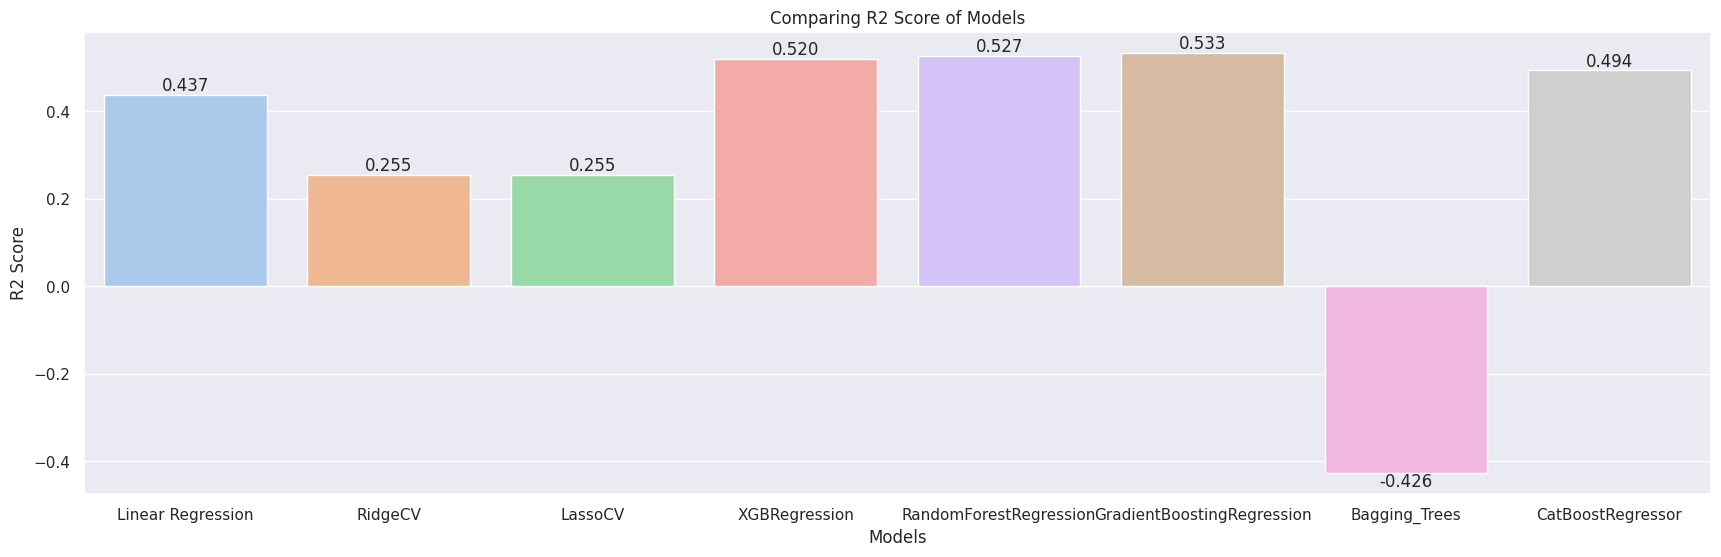

In [ ]:
sns.set()
plt.figure(figsize=(21,6))
sns.set_palette(palette = 'pastel')

models = ['Linear Regression', 'RidgeCV', 'LassoCV', 'XGBRegression', 'RandomForestRegression', 'GradientBoostingRegression', 'Bagging_Trees', 'CatBoostRegressor']
r2 = [r2_test_linear, r2_test_ridge, r2_test_lasso, r2_test_xgbr, r2_test_randomForest, r2_test_GB, r2_test_clf, r2_test_cat]
ax = sns.barplot(x = models, y = r2, hue=models)
for bars in ax.containers:
  ax.bar_label(bars, fmt='%.3f')
plt.xlabel('Models')
plt.ylabel('R2 Score')
plt.title('Comparing R2 Score of Models')

Text(0.5, 1.0, 'Comparing RMSE of Models')

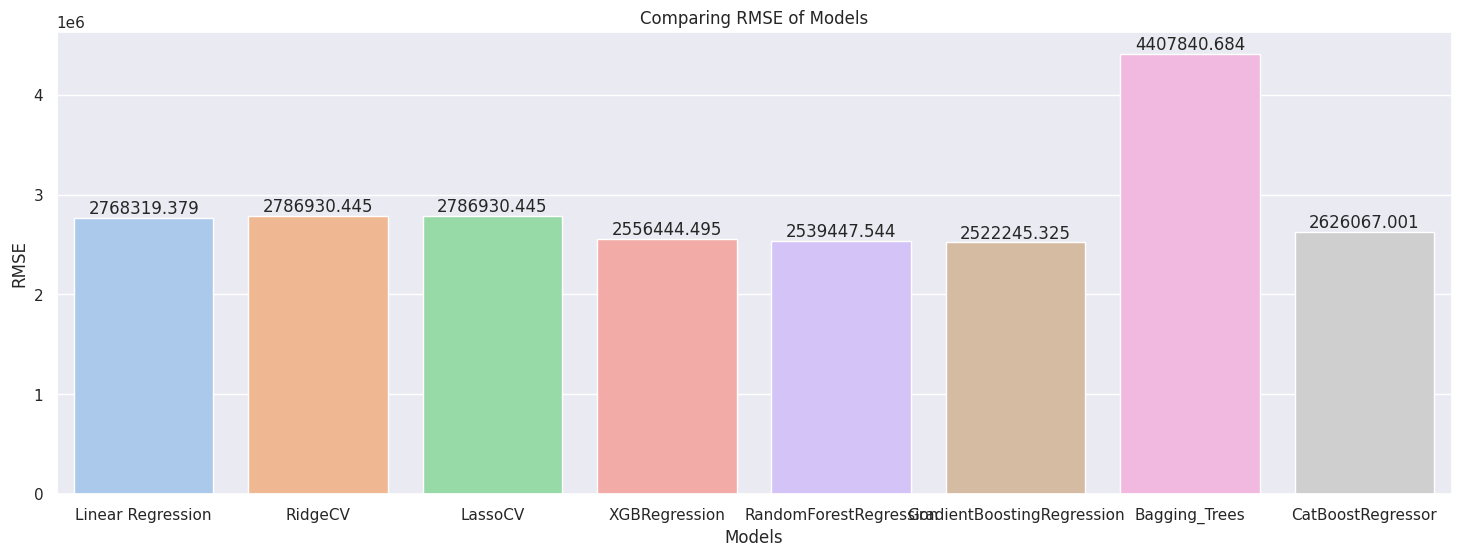

In [ ]:
sns.set()
plt.figure(figsize=(18,6))
sns.set_palette(palette = 'pastel')

rmse = [rmse_test_linear, rmse_test_ridge, rmse_test_lasso, rmse_test_xgbr, rmse_test_randomForest, rmse_test_GB, rmse_test_clf, rmse_test_cat]
ax = sns.barplot(x = models, y = rmse, hue=models)
for bars in ax.containers:
  ax.bar_label(bars, fmt='%.3f')
plt.xlabel('Models')
plt.ylabel('RMSE')
plt.title('Comparing RMSE of Models')

Text(0.5, 1.0, 'Comparing MAE of Models')

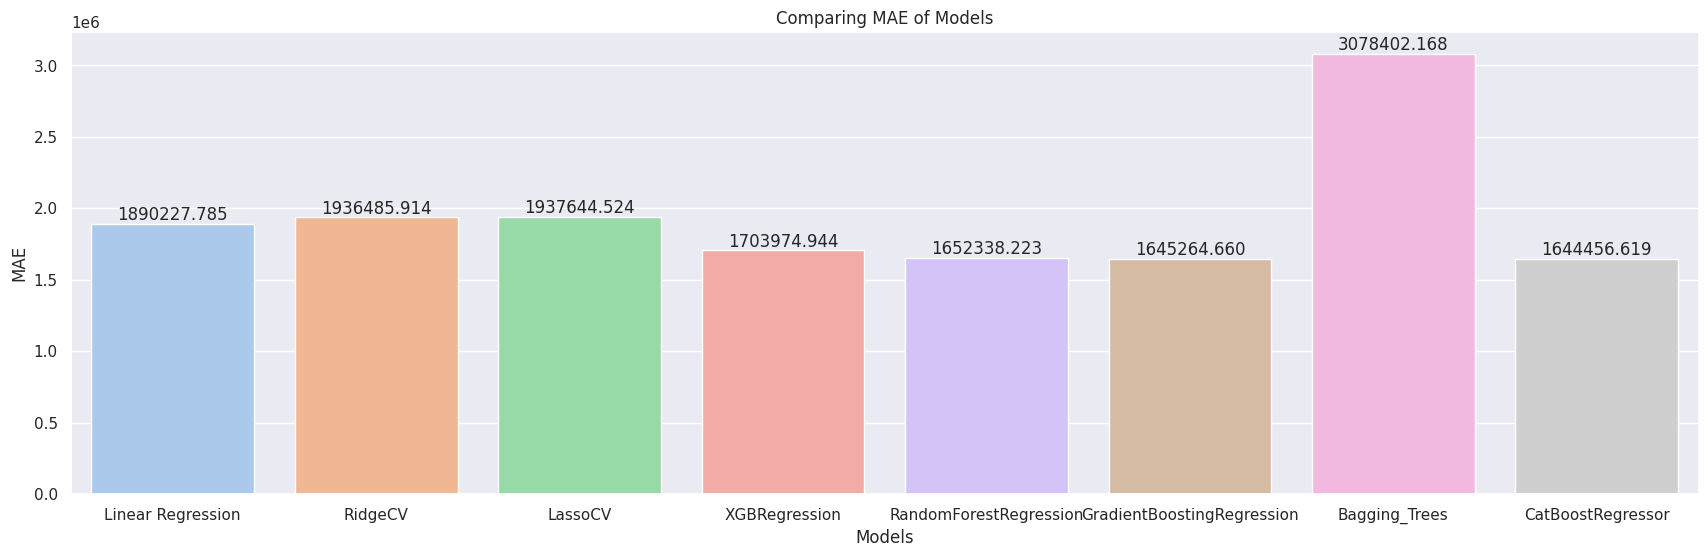

In [ ]:
sns.set()
plt.figure(figsize=(21,6))
sns.set_palette(palette = 'pastel')

mae = [mae_test_linear, mae_test_ridge, mae_test_lasso, mae_test_xgbr, mae_test_randomForest, mae_test_GB, mae_test_clf, mae_test_cat]
ax = sns.barplot(x = models, y = mae, hue=models)
for bars in ax.containers:
  ax.bar_label(bars, fmt='%.3f')
plt.xlabel('Models')
plt.ylabel('MAE')
plt.title('Comparing MAE of Models')

Text(0.5, 1.0, 'Comparing MSE of Models')

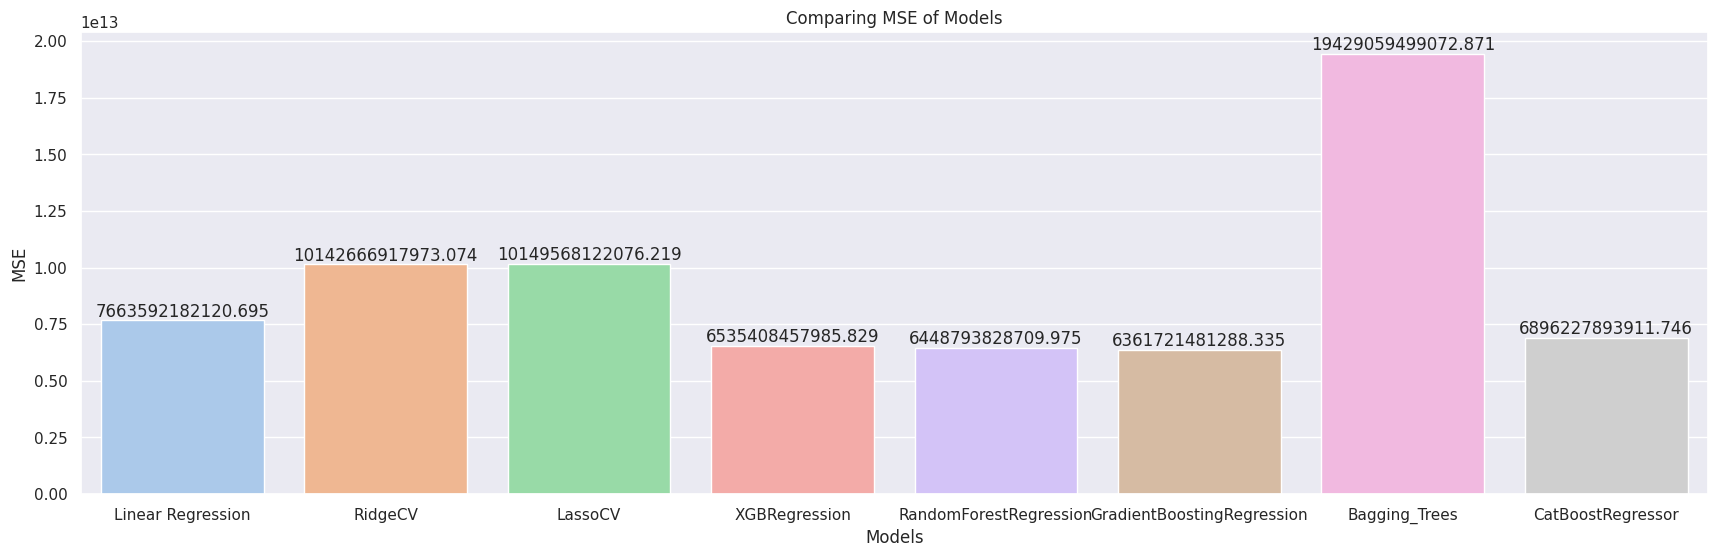

In [ ]:
sns.set()
plt.figure(figsize=(21,6))
sns.set_palette(palette = 'pastel')

mse = [mse_test_linear, mse_test_ridge, mse_test_lasso, mse_test_xgbr, mse_test_randomForest, mse_test_GB, mse_test_clf, mse_test_cat]
ax = sns.barplot(x = models, y = mse, hue=models)
for bars in ax.containers:
  ax.bar_label(bars, fmt='%.3f')
plt.xlabel('Models')
plt.ylabel('MSE')
plt.title('Comparing MSE of Models')

## 🔮Предсказание целевого значения

In [36]:
submission = pd.read_csv('./gdrive/MyDrive/SHIFT_LETO_24/submission.csv', index_col=0)

In [37]:
submission

price_doc
0      5657894.0
1      5142842.0
2      5755106.0
3      5165284.5
4      8581491.0
...          ...
9137   9650393.0
9138   5074643.0
9139   6332685.5
9140  10547787.0
9141   5722547.5

[9142 rows x 1 columns]

In [38]:
test_df = pd.read_csv('./gdrive/MyDrive/SHIFT_LETO_24/starting_k/test1.csv', index_col=0)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9142 entries, 0 to 9141
Data columns (total 80 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   full_sq                       9142 non-null   int64  
 1   floor                         9142 non-null   float64
 2   build_year                    9142 non-null   int64  
 3   num_room                      9142 non-null   int64  
 4   kitch_sq                      9142 non-null   int64  
 5   state                         9142 non-null   int64  
 6   product_type                  9142 non-null   int64  
 7   raion_popul                   9142 non-null   float64
 8   indust_part                   9142 non-null   float64
 9   sport_objects_raion           9142 non-null   int64  
 10  shopping_centers_raion        9142 non-null   int64  
 11  radiation_raion               9142 non-null   int64  
 12  build_count_block             9142 non-null   int64  
 13  build_co

In [39]:


test_slice = test_df[['full_sq', 'kitch_sq','product_type','indust_part','radiation_raion','metro_min_avto','school_km','green_zone_km','cemetery_km','market_shop_km','fitness_km','additional_education_km','big_church_km','green_part_1000','cafe_sum_1000_min_price_avg','cafe_sum_1500_min_price_avg','cafe_sum_2000_min_price_avg','mosque_count_3000','mosque_count_5000']]
# test_slice = test_df[['full_sq', 'kitch_sq','product_type','indust_part','radiation_raion','metro_min_avto','school_km','green_zone_km','cemetery_km','mkad_km','market_shop_km','fitness_km','additional_education_km','big_church_km','green_part_1000','cafe_sum_1000_min_price_avg','cafe_sum_1500_min_price_avg','cafe_sum_2000_min_price_avg','mosque_count_3000','mosque_count_5000']]
test_slice.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9142 entries, 0 to 9141
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   full_sq                      9142 non-null   int64  
 1   kitch_sq                     9142 non-null   int64  
 2   product_type                 9142 non-null   int64  
 3   indust_part                  9142 non-null   float64
 4   radiation_raion              9142 non-null   int64  
 5   metro_min_avto               9142 non-null   float64
 6   school_km                    9142 non-null   float64
 7   green_zone_km                9142 non-null   float64
 8   cemetery_km                  9142 non-null   float64
 9   market_shop_km               9142 non-null   float64
 10  fitness_km                   9142 non-null   float64
 11  additional_education_km      9142 non-null   float64
 12  big_church_km                9142 non-null   float64
 13  green_part_1000        

In [40]:
test_slice.loc[~((test_slice['full_sq'] > 0)&(test_slice['full_sq'] < 100)),'full_sq'] = test_slice.loc[(test_slice['full_sq'] > 0) & (test_slice['full_sq'] < 100),'full_sq' ].median()

test_slice.loc[~((test_slice['kitch_sq'] < 15)&(test_slice['kitch_sq'] >= 0)),'kitch_sq'] = test_slice.loc[(test_slice['kitch_sq'] < 15)&(test_slice['kitch_sq'] >= 0),'kitch_sq'].median()

test_slice.loc[~(test_slice['indust_part'] < .4),'indust_part'] = test_slice.loc[(test_slice['indust_part'] < .4),'indust_part'].median()

test_slice.loc[~(test_slice['metro_min_avto'] < 5),'metro_min_avto'] = test_slice.loc[(test_slice['metro_min_avto'] < 5),'metro_min_avto'].median()

test_slice.loc[~(test_slice['school_km'] < .71),'school_km'] = test_slice.loc[(test_slice['school_km'] < .71),'school_km'].median()

test_slice.loc[~(test_slice['green_zone_km'] < .5),'green_zone_km'] = test_slice.loc[(test_slice['green_zone_km'] < .5),'green_zone_km'].median()

test_slice.loc[~(test_slice['cemetery_km'] < 5),'cemetery_km'] = test_slice.loc[(test_slice['cemetery_km'] < 5),'cemetery_km'].median()

# test_slice.loc[~((test_slice['mkad_km'] < 4)&(test_slice['mkad_km'] > -.5)),'mkad_km'] = test_slice.loc[((test_slice['mkad_km'] < 4)&(test_slice['mkad_km'] > -.5)),'mkad_km'].median()

test_slice.loc[~((test_slice['market_shop_km'] < 2.5)&(test_slice['market_shop_km'] >-1.1)),'market_shop_km'] = test_slice.loc[((test_slice['market_shop_km'] < 2.5)&(test_slice['market_shop_km'] >-1.1)),'market_shop_km'].median()

test_slice.loc[~(test_slice['fitness_km'] < .5),'fitness_km'] = test_slice.loc[(test_slice['fitness_km'] < .5),'fitness_km'].median()

test_slice.loc[~(test_slice['additional_education_km'] < .5),'additional_education_km'] = test_slice.loc[(test_slice['additional_education_km'] < .5),'additional_education_km'].median()

test_slice.loc[~(test_slice['big_church_km'].abs() < 2.5),'big_church_km'] = test_slice.loc[(test_slice['big_church_km'].abs() < 2.5),'big_church_km'].median()

test_slice.loc[~(test_slice['green_part_1000'] < 33),'green_part_1000'] = test_slice.loc[(test_slice['green_part_1000'] < 33),'green_part_1000'].median()

test_slice.loc[~((test_slice['cafe_sum_1000_min_price_avg'] < 7)&(test_slice['cafe_sum_1000_min_price_avg'] > 6)),'cafe_sum_1000_min_price_avg'] = test_slice.loc[((test_slice['cafe_sum_1000_min_price_avg'] < 7)&(test_slice['cafe_sum_1000_min_price_avg'] > 6)),'cafe_sum_1000_min_price_avg'].median()

test_slice.loc[~((test_slice['cafe_sum_1500_min_price_avg'] < 7)&(test_slice['cafe_sum_1500_min_price_avg'] > 6)),'cafe_sum_1500_min_price_avg'] = test_slice.loc[((test_slice['cafe_sum_1500_min_price_avg'] < 7)&(test_slice['cafe_sum_1500_min_price_avg'] > 6)),'cafe_sum_1500_min_price_avg'].median()

test_slice.loc[~((test_slice['cafe_sum_2000_min_price_avg'] < 7)&(test_slice['cafe_sum_2000_min_price_avg'] > 6)),'cafe_sum_2000_min_price_avg'] = test_slice.loc[((test_slice['cafe_sum_2000_min_price_avg'] < 7)&(test_slice['cafe_sum_2000_min_price_avg'] > 6)),'cafe_sum_2000_min_price_avg'].median()

In [ ]:
test_slice.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9142 entries, 0 to 9141
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   full_sq                      9142 non-null   int64  
 1   kitch_sq                     9142 non-null   int64  
 2   product_type                 9142 non-null   int64  
 3   indust_part                  9142 non-null   float64
 4   radiation_raion              9142 non-null   int64  
 5   metro_min_avto               9142 non-null   float64
 6   school_km                    9142 non-null   float64
 7   green_zone_km                9142 non-null   float64
 8   cemetery_km                  9142 non-null   float64
 9   market_shop_km               9142 non-null   float64
 10  fitness_km                   9142 non-null   float64
 11  additional_education_km      9142 non-null   float64
 12  big_church_km                9142 non-null   float64
 13  green_part_1000   

In [ ]:
# test_slice['mosque_count'] = (test_slice['mosque_count_3000'] + test_slice['mosque_count_5000'])/2.0
# test_slice['cafe_sum_price_avg'] = (test_slice['cafe_sum_1000_min_price_avg'] + test_slice['cafe_sum_1500_min_price_avg'] + test_slice['cafe_sum_2000_min_price_avg'])/3.0


# test_slice.drop(columns = ['cafe_sum_1000_min_price_avg', 'cafe_sum_1500_min_price_avg','cafe_sum_2000_min_price_avg', 'mosque_count_3000', 'mosque_count_5000'], inplace = True)
# test_data.drop(columns = ['cafe_sum_1000_min_price_avg', 'cafe_sum_1500_min_price_avg','cafe_sum_2000_min_price_avg'], inplace = True)

test_slice.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9142 entries, 0 to 9141
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   full_sq                  9142 non-null   int64  
 1   kitch_sq                 9142 non-null   int64  
 2   product_type             9142 non-null   int64  
 3   indust_part              9142 non-null   float64
 4   radiation_raion          9142 non-null   int64  
 5   metro_min_avto           9142 non-null   float64
 6   school_km                9142 non-null   float64
 7   green_zone_km            9142 non-null   float64
 8   cemetery_km              9142 non-null   float64
 9   market_shop_km           9142 non-null   float64
 10  fitness_km               9142 non-null   float64
 11  additional_education_km  9142 non-null   float64
 12  big_church_km            9142 non-null   float64
 13  green_part_1000          9142 non-null   float64
 14  mosque_count             9142

In [ ]:
test_preds = model_linear.predict(test_slice[X.columns])
# test_preds = model_ridge.predict(test_slice[X.columns])
# test_preds = model_lasso_cv.predict(test_slice)


# z = pd.DataFrame(test_slice)
# f_names = model_xgbr.feature_names
# # z = df[f_names]
# test_preds = model_xgbr.predict(z)
submission['price_doc'] = test_preds
print(len(test_preds))
print(submission.shape)
submission.to_csv('./gdrive/MyDrive/SHIFT_LETO_24/submission.csv')

9142
(9142, 1)


In [41]:
X = df.iloc[:, :-1]  # Все столбцы кроме последнего
y = df.iloc[:, -1]   # Только последний столбец

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Стадартизация признаков
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Создание и обучение модели линейной регрессии
model = LinearRegression()
model.fit(X_train, y_train)

# Предсказание на тестовой выборке
y_pred = model.predict(X_test)

# Оценка модели
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Вывод результатов
print(f"Средняя абсолютная ошибка (MAE): {mae:.2f}")
print(f"Среднеквадратичная ошибка (MSE): {mse:.2f}")
print(f"Корень из среднеквадратичной ошибки (RMSE): {rmse:.2f}")
print(f"Коэффициент детерминации (R^2): {r2:.2f}")

Средняя абсолютная ошибка (MAE): 2074825.38
Среднеквадратичная ошибка (MSE): 14201718283174.32
Корень из среднеквадратичной ошибки (RMSE): 3768516.72
Коэффициент детерминации (R^2): 0.40


In [42]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1727 entries, 5 to 21320
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   full_sq                      1727 non-null   float64
 1   kitch_sq                     1727 non-null   float64
 2   product_type                 1727 non-null   int64  
 3   indust_part                  1727 non-null   float64
 4   radiation_raion              1727 non-null   int64  
 5   metro_min_avto               1727 non-null   float64
 6   school_km                    1727 non-null   float64
 7   green_zone_km                1727 non-null   float64
 8   cemetery_km                  1727 non-null   float64
 9   market_shop_km               1727 non-null   float64
 10  fitness_km                   1727 non-null   float64
 11  additional_education_km      1727 non-null   float64
 12  big_church_km                1727 non-null   float64
 13  green_part_1000       

###☑️ XGBRegressor
 *   Score 3286284.0854 (обработка данных v.1.0)
 *   Score 2970571.0528 (сырые данные)🥇

In [43]:
X=test_data.drop('price_doc', axis=1)

y=test_data['price_doc']

X_train, X_test, Y_train, Y_test = train_test_split(X, y, train_size=0.90, random_state=42)

xgb_regressor = xgb.XGBRegressor()

xgb_regressor.fit(X_train, Y_train, eval_set=[(X_test, Y_test)], eval_metric="mae", verbose=10)

print("Test  R2 Score : %.2f"%xgb_regressor.score(X_test, Y_test))
print("Train R2 Score : %.2f"%xgb_regressor.score(X_train, Y_train))

# Предсказание на тестовой выборке
y_pred = xgb_regressor.predict(X_test)

# Оценка модели
mae = mean_absolute_error(Y_test, y_pred)
mse = mean_squared_error(Y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(Y_test, y_pred)

# Вывод результатов
print(f"Средняя абсолютная ошибка (MAE): {mae:.2f}")
print(f"Среднеквадратичная ошибка (MSE): {mse:.2f}")
print(f"Корень из среднеквадратичной ошибки (RMSE): {rmse:.2f}")
print(f"Коэффициент детерминации (R^2): {r2:.2f}")

# mae = mean_absolute_error(Y_test, Y_train)
# mse = mean_squared_error(Y_test, Y_train)
# rmse = np.sqrt(mse)
# r2 = r2_score(Y_test, Y_train)

# # Вывод результатов
# print(f"Средняя абсолютная ошибка (MAE): {mae:.2f}")
# print(f"Среднеквадратичная ошибка (MSE): {mse:.2f}")
# print(f"Корень из среднеквадратичной ошибки (RMSE): {rmse:.2f}")
# print(f"Коэффициент детерминации (R^2): {r2:.2f}")

[0]	validation_0-mae:2319815.13006
[10]	validation_0-mae:1684740.74277
[20]	validation_0-mae:1657919.87283
[30]	validation_0-mae:1650743.33526
[40]	validation_0-mae:1625917.32514
[50]	validation_0-mae:1618391.48699
[60]	validation_0-mae:1612798.38584
[70]	validation_0-mae:1616244.15173
[80]	validation_0-mae:1626494.02673
[90]	validation_0-mae:1628044.20882
[99]	validation_0-mae:1628211.97905
Test  R2 Score : 0.61
Train R2 Score : 0.98
Средняя абсолютная ошибка (MAE): 1628211.98
Среднеквадратичная ошибка (MSE): 5585853389230.86
Корень из среднеквадратичной ошибки (RMSE): 2363441.01
Коэффициент детерминации (R^2): 0.61


In [35]:
test_preds = xgb_regressor.predict(test_slice)


submission['price_doc'] = test_preds
print(len(test_preds))
print(submission.shape)
submission.to_csv('./gdrive/MyDrive/SHIFT_LETO_24/subme.csv')

NameError: name 'test_slice' is not defined

In [44]:
X=df.drop('price_doc', axis=1)

y=df['price_doc']

X_train, X_test, Y_train, Y_test = train_test_split(X, y, train_size=0.90, random_state=42)

xgb_regressor = xgb.XGBRegressor()

xgb_regressor.fit(X_train, Y_train, eval_set=[(X_test, Y_test)], eval_metric="mae", verbose=10)

print("Test  R2 Score : %.2f"%xgb_regressor.score(X_test, Y_test))
print("Train R2 Score : %.2f"%xgb_regressor.score(X_train, Y_train))



# mae = mean_absolute_error(Y_test, Y_train)
# mse = mean_squared_error(Y_test, Y_train)
# rmse = np.sqrt(mse)
# r2 = r2_score(Y_test, Y_train)

# # Вывод результатов
# print(f"Средняя абсолютная ошибка (MAE): {mae:.2f}")
# print(f"Среднеквадратичная ошибка (MSE): {mse:.2f}")
# print(f"Корень из среднеквадратичной ошибки (RMSE): {rmse:.2f}")
# print(f"Коэффициент детерминации (R^2): {r2:.2f}")

[0]	validation_0-mae:2366435.27895
[10]	validation_0-mae:1447783.34095
[20]	validation_0-mae:1395184.35689
[30]	validation_0-mae:1374756.12037
[40]	validation_0-mae:1373783.97521
[50]	validation_0-mae:1372279.16045
[60]	validation_0-mae:1377516.92827
[70]	validation_0-mae:1377422.29419
[80]	validation_0-mae:1379827.19257
[90]	validation_0-mae:1386798.47252
[99]	validation_0-mae:1392913.89692
Test  R2 Score : 0.72
Train R2 Score : 0.92


In [45]:
test_preds = xgb_regressor.predict(test_df[X.columns])


submission['price_doc'] = test_preds
print(len(test_preds))
print(submission.shape)
submission.to_csv('./gdrive/MyDrive/SHIFT_LETO_24/submission.csv')

9142
(9142, 1)


###☑️ XGBRFRegressor
 *   Score 3560572.1545




In [ ]:
X=test_data.drop('price_doc', axis=1)

y=test_data['price_doc']


X_train, X_test, Y_train, Y_test = train_test_split(X, y, train_size=0.9, random_state=42)

xgb_rf_regressor = xgb.XGBRFRegressor()

xgb_rf_regressor.fit(X_train, Y_train)

print("Test  R2 Score : %.2f"%xgb_rf_regressor.score(X_test, Y_test))
print("Train R2 Score : %.2f"%xgb_rf_regressor.score(X_train, Y_train))

Test  R2 Score : 0.60
Train R2 Score : 0.74


In [ ]:
test_preds = xgb_rf_regressor.predict(test_slice)

submission['price_doc'] = test_preds
print(len(test_preds))
print(submission.shape)
submission.to_csv('./gdrive/MyDrive/SHIFT_LETO_24/submission.csv')

9142
(9142, 1)


### ☑️ RandomForestRegressor

*   Score 4061767.4889



In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import recall_score

X=test_data.drop('price_doc', axis=1)

y=test_data['price_doc']

X_train, X_test, Y_train, Y_test = train_test_split(X, y, train_size=0.90, random_state=42)

randomForest_regressor = RandomForestRegressor(max_depth=20, n_estimators=134, random_state=0)

randomForest_regressor.fit(X_train, Y_train)

print("Test  R2 Score : %.2f"%randomForest_regressor.score(X_test, Y_test))
print("Train R2 Score : %.2f"%randomForest_regressor.score(X_train, Y_train))
display(randomForest_regressor.score(X_train, Y_train))

Test  R2 Score : 0.59
Train R2 Score : 0.93


0.9272521330711239

In [ ]:
randomForest_regressor.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [ ]:
r2_randomForest_regressor = r2_score(Y_test, randomForest_regressor.predict(X_test))
mean_sq_err_defaul_model = mean_squared_error(Y_test, randomForest_regressor.predict(X_test))

print('R2=', np.round(r2_randomForest_regressor, 3))
print('MSE=', np.round(mean_sq_err_defaul_model, 3))

R2= 0.595
MSE= 6376057382484.604


In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [10, None, 150, 200, 300],
}

grid_search = GridSearchCV(
    estimator=RandomForestRegressor(),
    param_grid=param_grid,
    cv=3,
    scoring='r2',
)
grid_search.fit(X_train, Y_train)

GridSearchCV(cv=3, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [10, None, 150, 200, 300],
                         'n_estimators': [50, 100, 150]},
             scoring='r2')

In [ ]:
grid_search.best_params_

{'max_depth': None, 'n_estimators': 150}

In [ ]:
r2_grid_search = r2_score(Y_test, grid_search.predict(X_test))
mean_sq_err_grid_search = mean_squared_error(Y_test, grid_search.predict(X_test))

print('R2=', np.round(r2_grid_search, 3))
print('MSE=', np.round(mean_sq_err_grid_search, 3))

R2= 0.601
MSE= 6283676248141.89


In [ ]:
!pip install bayesian-optimization

In [ ]:
%%time
from bayes_opt import BayesianOptimization

def rf_cv(n_estimators, max_depth, min_samples_split):
    val = cross_val_score(
        RandomForestRegressor(
              n_estimators=int(n_estimators),
              max_depth=int(max_depth),
              min_samples_split=int(min_samples_split),
            ),
        X_train,
        Y_train,
        cv=3,
        scoring='r2',
    ).mean()
    return val

bayesian_optimization = BayesianOptimization(
    f=rf_cv,
    pbounds={
        'n_estimators': (90, 160),
        'max_depth': (10, 30),
        'min_samples_split': (20, 40),
    },
)
bayesian_optimization.maximize(init_points=10, n_iter=200)

|   iter    |  target   | max_depth | min_sa... | n_esti... |
-------------------------------------------------------------
| 1         | 0.5917    | 26.75     | 34.81     | 91.17     |
| 2         | 0.5983    | 29.14     | 29.53     | 113.4     |
| 3         | 0.5886    | 13.18     | 36.91     | 131.8     |
| 4         | 0.5898    | 29.22     | 34.16     | 159.6     |
| 5         | 0.5996    | 14.17     | 21.51     | 116.8     |
| 6         | 0.5969    | 19.2      | 23.8      | 96.51     |
| 7         | 0.5958    | 13.16     | 29.22     | 146.0     |
| 8         | 0.5902    | 25.23     | 34.54     | 111.4     |
| 9         | 0.5906    | 11.29     | 37.73     | 152.4     |
| 10        | 0.5965    | 26.83     | 22.52     | 112.0     |
| 11        | 0.6015    | 28.99     | 23.91     | 114.7     |
| 12        | 0.6014    | 30.0      | 26.18     | 117.6     |
| 13        | 0.598     | 30.0      | 20.1      | 119.5     |
| 14        | 0.6017    | 23.2      | 24.72     | 119.5     |
| 15    

KeyboardInterrupt: 

In [ ]:
print("Лучшие параметры: ", bayesian_optimization.max['params'])
print("Максимальное значение R^2: ", bayesian_optimization.max['target'])

Лучшие параметры:  {'max_depth': 20.279835631128652, 'min_samples_split': 20.0, 'n_estimators': 134.45702593618404}
Максимальное значение R^2:  0.607643718906402


In [ ]:
from lightautoml.automl.presets.tabular_presets import TabularAutoML
from lightautoml.tasks import Task

In [ ]:
%%time
x_y_train = X_train.copy()
x_y_train['target_values'] = Y_train

automl = TabularAutoML(
    task = Task(
        name = 'reg',
        metric = lambda y_true, y_pred: r2_score(y_true, y_pred))
)
oof_pred = automl.fit_predict(
    x_y_train,
    roles = {'target': 'target_values'},
)

INFO:lightautoml.automl.presets.base:Stdout logging level is ERROR.
INFO:lightautoml.automl.presets.base:Task: reg

INFO:lightautoml.automl.presets.base:Start automl preset with listed constraints:
INFO:lightautoml.automl.presets.base:- time: 3600.00 seconds
INFO:lightautoml.automl.presets.base:- CPU: 4 cores
INFO:lightautoml.automl.presets.base:- memory: 16 GB

INFO:lightautoml.reader.base:Train data shape: (3839, 51)

INFO3:lightautoml.reader.base:Feats was rejected during automatic roles guess: []
INFO:lightautoml.automl.base:Layer 1 train process start. Time left 3588.79 secs
INFO:lightautoml.ml_algo.base:Start fitting Lvl_0_Pipe_0_Mod_0_LinearL2 ...
DEBUG:lightautoml.ml_algo.base:Training params: {'tol': 1e-06, 'max_iter': 100, 'cs': [1e-05, 5e-05, 0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50, 100, 500, 1000, 5000, 10000, 50000, 100000], 'early_stopping': 2, 'categorical_idx': [81, 82], 'embed_sizes': array([11, 11], dtype=int32), 'data_size': 83}
INFO2:lightau

CPU times: user 17min 15s, sys: 29.3 s, total: 17min 45s
Wall time: 11min 27s


In [ ]:
automl_predictions = automl.predict(X_test)
automl_predictions

array([[ 5873176.5],
       [ 5389445. ],
       [ 5948494. ],
       [ 5337501. ],
       [ 8413614. ],
       [ 6761950. ],
       [ 8008678.5],
       [ 5269011. ],
       [13009839. ],
       [ 6559544. ],
       [ 6103741.5],
       [ 4107223. ],
       [ 7055996.5],
       [ 6169887. ],
       [ 6176356.5],
       [ 5872698.5],
       [ 7350222.5],
       [12580594. ],
       [12649394. ],
       [ 5213761. ],
       [ 6359829.5],
       [ 7878360.5],
       [ 4031016.5],
       [ 5194441.5],
       [ 4495891.5],
       [ 4952710. ],
       [ 7641418.5],
       [ 7051634.5],
       [13470813. ],
       [ 5378190. ],
       [12178368. ],
       [ 5214436. ],
       [ 6184763. ],
       [10325937. ],
       [ 4086979.2],
       [ 5014990.5],
       [ 4660792.5],
       [ 8049601.5],
       [ 5702634. ],
       [ 3332311. ],
       [ 9398180. ],
       [ 6978825.5],
       [14955509. ],
       [ 5457511. ],
       [ 6468007. ],
       [ 7409318.5],
       [ 4397939. ],
       [ 5023

In [ ]:
automl_predictions = pd.Series(automl_predictions.data[:, 0])

In [ ]:
r2_automl = r2_score(Y_test, automl_predictions)
mean_sq_err_automl = mean_squared_error(Y_test, automl_predictions)

print('R2=', np.round(r2_automl, 3))
print('MSE=', np.round(mean_sq_err_automl, 3))

R2= 0.642
MSE= 5649500536833.953


In [ ]:
test_preds = randomForest_regressor.predict(test_slice)


submission['price_doc'] = test_preds
print(len(test_preds))
print(submission.shape)
submission.to_csv('./gdrive/MyDrive/SHIFT_LETO_24/submission.csv')

9142
(9142, 1)


In [ ]:
# Графы важности модели
# feats = {}
# for feature, importance in zip(test_preds.columns, randomForest_regressor.feature_importances_):
#     feats[feature] = importance
# importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-Importance'})
# importances = importances.sort_values(by='Gini-Importance', ascending=False)
# importances = importances.reset_index()
# importances = importances.rename(columns={'index': 'Features'})
# sns.set(font_scale = 5)
# sns.set(style="whitegrid", color_codes=True, font_scale = 1.7)
# fig, ax = plt.subplots()
# fig.set_size_inches(30,15)
# sns.barplot(x=importances['Gini-Importance'], y=importances['Features'], data=importances, color='skyblue')
# plt.xlabel('Importance', fontsize=25, weight = 'bold')
# plt.ylabel('Features', fontsize=25, weight = 'bold')
# plt.title('Feature Importance', fontsize=25, weight = 'bold')
# display(plt.show())
# display(importances)

AttributeError: 'numpy.ndarray' object has no attribute 'columns'

### ☑️ GradientBoostingRegressor

*   Score 4467838.3191

In [ ]:
X=test_data.drop('price_doc', axis=1)

y=test_data['price_doc']

X_train, X_test, Y_train, Y_test = train_test_split(X, y, train_size=0.90, random_state=42)

GB_regressor = GradientBoostingRegressor()

GB_regressor.fit(X_train, Y_train)

print("Test  R2 Score : %.2f"%GB_regressor.score(X_test, Y_test))
print("Train R2 Score : %.2f"%GB_regressor.score(X_train, Y_train))
display(GB_regressor.score(X_train, Y_train))

Test  R2 Score : 0.61
Train R2 Score : 0.76


0.7592024164047768

In [ ]:
test_preds = GB_regressor.predict(test_slice)


submission['price_doc'] = test_preds
print(len(test_preds))
print(submission.shape)
submission.to_csv('./gdrive/MyDrive/SHIFT_LETO_24/submission.csv')

9142
(9142, 1)


### ☑️ Bagging_Trees

*   Score 5674833.2812

In [ ]:
X=test_data.drop('price_doc', axis=1)

y=test_data['price_doc']

X_train, X_test, Y_train, Y_test = train_test_split(X, y, train_size=0.90, random_state=42)

tree_clf = DecisionTreeClassifier(max_depth=10, random_state=1)
bagging_clf = BaggingClassifier(base_estimator=tree_clf, n_estimators=100, random_state=0, max_features=0.7)

bagging_clf.fit(X_train, Y_train)

print("Test  R2 Score : %.2f"%bagging_clf.score(X_test, Y_test))
print("Train R2 Score : %.2f"%bagging_clf.score(X_train, Y_train))
display(bagging_clf.score(X_train, Y_train))

Test  R2 Score : 0.05
Train R2 Score : 0.71


0.712998712998713

In [ ]:
test_preds = bagging_clf.predict(test_slice)


submission['price_doc'] = test_preds
print(len(test_preds))
print(submission.shape)
submission.to_csv('./gdrive/MyDrive/SHIFT_LETO_24/submission.csv')

9142
(9142, 1)


### ☑️ CatBoostRegressor

*   Score 4535465.3532

In [ ]:
X=test_data.drop('price_doc', axis=1)

y=test_data['price_doc']

X_train, X_test, Y_train, Y_test = train_test_split(X, y, train_size=0.90, random_state=42)

cat_boost_model = CatBoostRegressor(loss_function='RMSE')
cat_boost_model.fit(X_train, Y_train, verbose=100)

print("Test  R2 Score : %.2f"%cat_boost_model.score(X_test, Y_test))
print("Train R2 Score : %.2f"%cat_boost_model.score(X_train, Y_train))
display(cat_boost_model.score(X_train, Y_train))

Learning rate set to 0.043896
0:	learn: 3859122.6294107	total: 5.67ms	remaining: 5.67s
100:	learn: 2199149.9803267	total: 341ms	remaining: 3.04s
200:	learn: 1926219.6026543	total: 698ms	remaining: 2.77s
300:	learn: 1748318.1933486	total: 1.07s	remaining: 2.48s
400:	learn: 1589979.9365177	total: 1.42s	remaining: 2.12s
500:	learn: 1473782.8619018	total: 1.77s	remaining: 1.76s
600:	learn: 1370245.7973158	total: 2.14s	remaining: 1.42s
700:	learn: 1293097.8134378	total: 2.5s	remaining: 1.07s
800:	learn: 1211765.1850830	total: 2.88s	remaining: 714ms
900:	learn: 1147446.9036072	total: 3.24s	remaining: 356ms
999:	learn: 1086986.0184649	total: 3.57s	remaining: 0us
Test  R2 Score : 0.63
Train R2 Score : 0.92


0.9238354644621236

In [ ]:
test_preds = cat_boost_model.predict(test_slice)


submission['price_doc'] = test_preds
print(len(test_preds))
print(submission.shape)
submission.to_csv('./gdrive/MyDrive/SHIFT_LETO_24/submission.csv')

9142
(9142, 1)


###Эксперименты

In [ ]:
test_data = df[['product_type','indust_part','radiation_raion', 'metro_min_avto','school_km','green_zone_km','market_shop_km','fitness_km','stadium_km','basketball_km','additional_education_km','green_part_1000','cafe_sum_1000_min_price_avg','cafe_sum_1500_min_price_avg','cafe_sum_2000_min_price_avg','mosque_count_3000','mosque_count_5000','year', 'price_doc' ]]
# test_data = df[['full_sq', 'build_year','product_type','raion_popul','metro_min_avto','mkad_km','ttk_km','year', 'price_doc' ]]
# test_data = df[['full_sq', 'kitch_sq','product_type','indust_part','radiation_raion','metro_min_avto','school_km','green_zone_km','mkad_km','market_shop_km','fitness_km','additional_education_km','big_church_km','green_part_1000','cafe_sum_1000_min_price_avg','cafe_sum_1500_min_price_avg','cafe_sum_2000_min_price_avg','mosque_count_3000','mosque_count_5000', 'price_doc' ]]
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21329 entries, 0 to 21328
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   product_type                 21329 non-null  int64  
 1   indust_part                  21329 non-null  float64
 2   radiation_raion              21329 non-null  int64  
 3   metro_min_avto               21329 non-null  float64
 4   school_km                    21329 non-null  float64
 5   green_zone_km                21329 non-null  float64
 6   market_shop_km               21329 non-null  float64
 7   fitness_km                   21329 non-null  float64
 8   stadium_km                   21329 non-null  float64
 9   basketball_km                21329 non-null  float64
 10  additional_education_km      21329 non-null  float64
 11  green_part_1000              21329 non-null  float64
 12  cafe_sum_1000_min_price_avg  21329 non-null  float64
 13  cafe_sum_1500_min_pri

In [ ]:
fig = plt.figure(figsize=(16,16))
for index,col in enumerate(test_data):
    plt.subplot(3,3,index+1)
    sns.histplot(test_data.loc[:,col].dropna(), kde=True, stat="density", linewidth=0.5);
fig.tight_layout(pad=1.0);

In [ ]:
test_data.mosque_count_5000.describe()

count    1727.000000
mean        0.876086
std         0.796677
min         0.000000
25%         0.000000
50%         1.000000
75%         2.000000
max         2.000000
Name: mosque_count_5000, dtype: float64

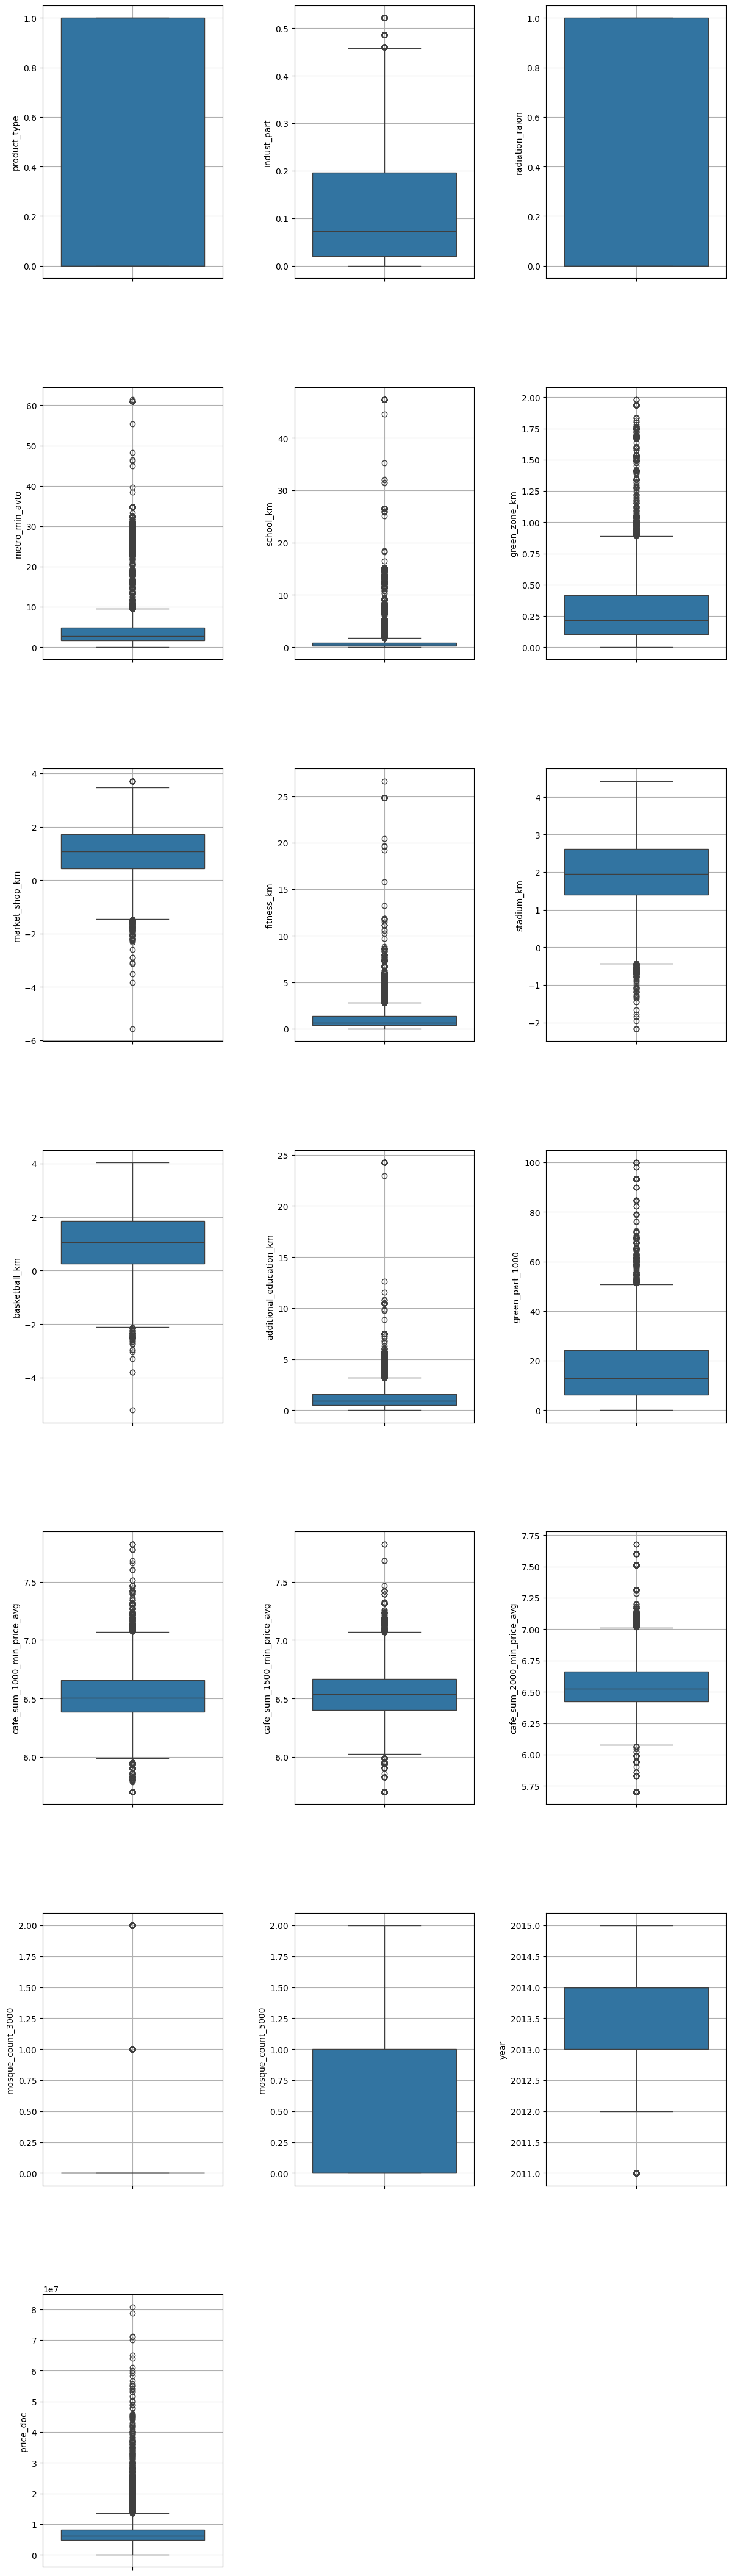

In [ ]:
fig = plt.figure(figsize=(14,15))
for index,col in enumerate(test_data):
    plt.subplot(7,3,index+1)
    sns.boxplot(y=col, data=test_data.dropna())
    plt.grid()
fig.tight_layout(pad=1.0)

plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=2.9,
                    wspace=0.4,
                    hspace=0.4)
plt.show()

In [ ]:
# print(len(test_data[(test_data['full_sq'] > 0) & (test_data['full_sq'] < 100)]))
# test_data = test_data[(test_data['kitch_sq'] < 15)&(test_data['kitch_sq'] >= 0)]
print("full_sq -- ",len(test_data[(test_data['full_sq'] > 0) & (test_data['full_sq'] < 100)])/213.29, len(test_data[~((test_data['full_sq'] > 0) & (test_data['full_sq'] < 100))])/213.29)
print("indust_part -- ",len(test_data[test_data['indust_part'] < .4])/213.29, len(test_data[~(test_data['indust_part'] < .4)])/213.29)
print("metro_min_avto -- ",len(test_data[test_data['metro_min_avto'] < 5])/213.29, len(test_data[~(test_data['metro_min_avto'] < 5)])/213.29)
print("school_km -- ",len(test_data[test_data['school_km'] < .71])/213.29, len(test_data[~(test_data['school_km'] < .71)])/213.29)
print("green_zone_km -- ",len(test_data[test_data['green_zone_km'] < .5])/213.29, len(test_data[~(test_data['green_zone_km'] < .5)])/213.29)
print("market_shop_km -- ",len(test_data[(test_data['market_shop_km'] < 2.5)&(test_data['market_shop_km'] >-1.1)])/213.29, len(test_data[~((test_data['market_shop_km'] < 2.5)&(test_data['market_shop_km'] >-1.1))])/213.29)
print("fitness_km -- ",len(test_data[test_data['fitness_km'] < .5])/213.29, len(test_data[~(test_data['fitness_km'] < .5)])/213.29)

print("stadium_km -- ",len(test_data[test_data['stadium_km']>-0.4])/213.29, len(test_data[~(test_data['stadium_km']>-0.4)])/213.29)
print("basketball_km -- ",len(test_data[test_data['basketball_km']>-2])/213.29, len(test_data[~(test_data['basketball_km']>-2)])/213.29)

print("additional_education_km -- ",len(test_data[test_data['additional_education_km'] < .5])/213.29, len(test_data[~(test_data['additional_education_km'] < .5)])/213.29)
print("green_part_1000 -- ",len(test_data[test_data['green_part_1000'] < 33])/213.29, len(test_data[~(test_data['green_part_1000'] < 33)])/213.29)
print("cafe_sum_1000_min_price_avg -- ",len(test_data[(test_data['cafe_sum_1000_min_price_avg'] < 7)&(test_data['cafe_sum_1000_min_price_avg'] > 6)])/213.29, len(test_data[~((test_data['cafe_sum_1000_min_price_avg'] < 7)&(test_data['cafe_sum_1000_min_price_avg'] > 6))])/213.29)
print("cafe_sum_1500_min_price_avg -- ",len(test_data[(test_data['cafe_sum_1500_min_price_avg'] < 7)&(test_data['cafe_sum_1500_min_price_avg'] > 6)])/213.29, len(test_data[~((test_data['cafe_sum_1500_min_price_avg'] < 7)&(test_data['cafe_sum_1500_min_price_avg'] > 6))])/213.29)
print("cafe_sum_2000_min_price_avg -- ",len(test_data[(test_data['cafe_sum_2000_min_price_avg'] < 7)&(test_data['cafe_sum_2000_min_price_avg'] > 6)])/213.29, len(test_data[~((test_data['cafe_sum_2000_min_price_avg'] < 7)&(test_data['cafe_sum_2000_min_price_avg'] > 6))])/213.29)


print("year -- ",len(test_data[(test_data['year'] >=2012)&(test_data['year'] < 2024)])/213.29, len(test_data[~((test_data['year'] >=2012)&(test_data['year'] < 2024))])/213.29)
print("price_doc -- ",len(test_data[test_data['price_doc'] < np.quantile(test_data.price_doc, q = 0.975)])/213.29, len(test_data[~(test_data['price_doc'] < np.quantile(test_data.price_doc, q = 0.975))])/213.29)



# 'stadium_km','basketball_km','additional_education_km','green_part_1000','cafe_sum_1000_min_price_avg','cafe_sum_1500_min_price_avg','cafe_sum_2000_min_price_avg','mosque_count_3000','mosque_count_5000','year'
# test_data = test_data[test_data['school_km'] < .71]
# test_data = test_data[test_data['green_zone_km'] < .5]
# test_data = test_data[test_data['cemetery_km'] < 5]
# # test_data = test_data[(test_data['mkad_km'] < 4)&(test_data['mkad_km'] > -.5)]
# test_data = test_data[(test_data['market_shop_km'] < 2.5)&(test_data['market_shop_km'] >-1.1)]
# test_data = test_data[test_data['fitness_km'] < .5]
# test_data = test_data[test_data['additional_education_km'] < .5]
# test_data = test_data[test_data['big_church_km'].abs() < 2.5]
# test_data = test_data[test_data['green_part_1000'] < 33]
# test_data = test_data[(test_data['cafe_sum_1000_min_price_avg'] < 7)&(test_data['cafe_sum_1000_min_price_avg'] > 6)]
# test_data = test_data[(test_data['cafe_sum_1500_min_price_avg'] < 7)&(test_data['cafe_sum_1500_min_price_avg'] > 6)]
# test_data = test_data[(test_data['cafe_sum_2000_min_price_avg'] < 7)&(test_data['cafe_sum_2000_min_price_avg'] > 6)]

full_sq --  96.72277181302452 3.2772281869754796
indust_part --  96.25861503117821 3.741384968821792
metro_min_avto --  75.45595199024802 24.544048009751982
school_km --  68.02006657602325 31.979933423976746
green_zone_km --  82.45112288433589 17.54887711566412
market_shop_km --  96.06170003281918 3.938299967180834
fitness_km --  37.52168409208121 62.4783159079188
stadium_km --  99.34830512447841 0.6516948755215903
basketball_km --  99.63430071733322 0.3656992826667917
additional_education_km --  26.442871208214168 73.55712879178583
green_part_1000 --  87.50058605654274 12.499413943457265
cafe_sum_1000_min_price_avg --  91.7436354259459 8.256364574054105
cafe_sum_1500_min_price_avg --  95.08650194570772 4.913498054292278
cafe_sum_2000_min_price_avg --  95.85540812977636 4.144591870223639
year --  97.55731632987951 2.4426836701204935
price_doc --  97.49636644943504 2.5036335505649587


In [ ]:
test_data.price_doc.describe().apply(lambda x: format(x, 'f'))

count       21329.000000
mean      7117599.307516
std       4706342.297460
min        100000.000000
25%       4745995.000000
50%       6255454.000000
75%       8300000.000000
max      80777440.000000
Name: price_doc, dtype: object

##🛠️ Предобработка данных 2.0

Результаты прогона в Linear Regression

* Средняя абсолютная ошибка (MAE): 1608689.11

* Среднеквадратичная ошибка (MSE): 5345250902772.98

* Корень из среднеквадратичной ошибки (RMSE): 2311979.87

* Коэффициент детерминации (R^2): 0.41


In [ ]:
test_data = df[['full_sq','product_type','indust_part','radiation_raion', 'metro_min_avto','school_km','green_zone_km','market_shop_km','fitness_km','stadium_km','basketball_km','additional_education_km','green_part_1000','cafe_sum_1000_min_price_avg','cafe_sum_1500_min_price_avg','cafe_sum_2000_min_price_avg','mosque_count_5000','year', 'price_doc' ]]
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21329 entries, 0 to 21328
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   full_sq                      21329 non-null  int64  
 1   product_type                 21329 non-null  int64  
 2   indust_part                  21329 non-null  float64
 3   radiation_raion              21329 non-null  int64  
 4   metro_min_avto               21329 non-null  float64
 5   school_km                    21329 non-null  float64
 6   green_zone_km                21329 non-null  float64
 7   market_shop_km               21329 non-null  float64
 8   fitness_km                   21329 non-null  float64
 9   stadium_km                   21329 non-null  float64
 10  basketball_km                21329 non-null  float64
 11  additional_education_km      21329 non-null  float64
 12  green_part_1000              21329 non-null  float64
 13  cafe_sum_1000_min_pri

In [ ]:
# Отбрасывание данных 20% выборки

test_data = test_data[(test_data['full_sq'] > 0) & (test_data['full_sq'] < 100)]
test_data = test_data[test_data['indust_part'] < .4]
test_data = test_data[test_data['green_zone_km'] < .5]
test_data = test_data[(test_data['market_shop_km'] < 2.5)&(test_data['market_shop_km'] >-1.1)]

test_data = test_data[test_data['stadium_km']>-0.4]
test_data = test_data[test_data['basketball_km']>-2]
test_data = test_data[test_data['green_part_1000'] < 33]

test_data = test_data[(test_data['cafe_sum_1000_min_price_avg'] < 7)&(test_data['cafe_sum_1000_min_price_avg'] > 6)]
test_data = test_data[(test_data['cafe_sum_1500_min_price_avg'] < 7)&(test_data['cafe_sum_1500_min_price_avg'] > 6)]
test_data = test_data[(test_data['cafe_sum_2000_min_price_avg'] < 7)&(test_data['cafe_sum_2000_min_price_avg'] > 6)]

test_data = test_data[(test_data['year'] >=2012)&(test_data['year'] < 2024)]
test_data = test_data[test_data['price_doc'] < np.quantile(test_data.price_doc, q = 0.975)]

# Приравнивание >80% выбрасов данных к медиане

test_data.loc[~(test_data['metro_min_avto'] < 5),'metro_min_avto'] = test_data.loc[(test_data['metro_min_avto'] < 5),'metro_min_avto'].median()
test_data.loc[~(test_data['school_km'] < .71),'school_km'] = test_data.loc[(test_data['school_km'] < .71),'school_km'].median()
test_data.loc[~(test_data['fitness_km'] < .5),'fitness_km'] = test_data.loc[(test_data['fitness_km'] < .5),'fitness_km'].median()
test_data.loc[~(test_data['additional_education_km'] < .5),'additional_education_km'] = test_data.loc[(test_data['additional_education_km'] < .5),'additional_education_km'].median()


In [ ]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10932 entries, 1 to 21328
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   full_sq                      10932 non-null  int64  
 1   product_type                 10932 non-null  int64  
 2   indust_part                  10932 non-null  float64
 3   radiation_raion              10932 non-null  int64  
 4   metro_min_avto               10932 non-null  float64
 5   school_km                    10932 non-null  float64
 6   green_zone_km                10932 non-null  float64
 7   market_shop_km               10932 non-null  float64
 8   fitness_km                   10932 non-null  float64
 9   stadium_km                   10932 non-null  float64
 10  basketball_km                10932 non-null  float64
 11  additional_education_km      10932 non-null  float64
 12  green_part_1000              10932 non-null  float64
 13  cafe_sum_1000_min_pri

In [ ]:
numeric_train = test_data
correlation = numeric_train.corr()
correlation[['price_doc']].sort_values(['price_doc'], ascending=False)

price_doc
price_doc                 1.000000
full_sq                   0.487712
year                      0.155166
mosque_count_5000         0.098023
radiation_raion           0.084943
additional_education_km   0.084794
cafe_sum_price_avg        0.074378
school_km                 0.062550
green_zone_km             0.017242
indust_part              -0.024407
fitness_km               -0.039418
green_part_1000          -0.068294
metro_min_avto           -0.113090
product_type             -0.154649
market_shop_km           -0.158220
basketball_km            -0.210258
stadium_km               -0.224810

<Axes: >

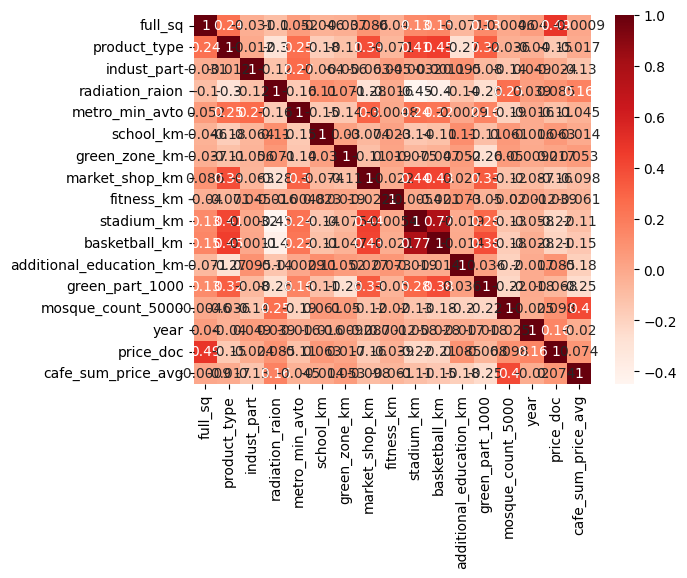

In [ ]:
sns.heatmap(test_data.corr(), annot=True,cmap='Reds')

In [ ]:
#после объединения хуже скор! на 10 000
test_data['cafe_sum_price_avg'] = (test_data['cafe_sum_1000_min_price_avg'] + test_data['cafe_sum_1500_min_price_avg'] + test_data['cafe_sum_2000_min_price_avg'])/3.0


test_data.drop(columns = ['cafe_sum_1000_min_price_avg', 'cafe_sum_1500_min_price_avg','cafe_sum_2000_min_price_avg'], inplace = True)
# test_data.drop(columns = ['cafe_sum_1000_min_price_avg', 'cafe_sum_1500_min_price_avg','cafe_sum_2000_min_price_avg'], inplace = True)

test_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10932 entries, 1 to 21328
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   full_sq                  10932 non-null  int64  
 1   product_type             10932 non-null  int64  
 2   indust_part              10932 non-null  float64
 3   radiation_raion          10932 non-null  int64  
 4   metro_min_avto           10932 non-null  float64
 5   school_km                10932 non-null  float64
 6   green_zone_km            10932 non-null  float64
 7   market_shop_km           10932 non-null  float64
 8   fitness_km               10932 non-null  float64
 9   stadium_km               10932 non-null  float64
 10  basketball_km            10932 non-null  float64
 11  additional_education_km  10932 non-null  float64
 12  green_part_1000          10932 non-null  float64
 13  mosque_count_5000        10932 non-null  int64  
 14  year                     10